In [1]:
import scipy.io
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from scipy.signal import butter, filtfilt,sosfilt,resample,stft, windows
from scipy import sparse  # baseline als smoothing
from scipy.sparse.linalg import spsolve  # baseline als smoothing
from scipy.signal import decimate
from model_tsd_4chan import Discogan
from scipy import signal
import os
import dbread_tsd as db
import argparse
import pandas as pd
from scipy.signal import cheby2
from sklearn.model_selection import train_test_split
import csv
from scipy.signal import savgol_filter
from scipy.sparse import csc_matrix
from scipy.sparse import spdiags
import scipy.sparse.linalg as spla



from scipy.interpolate import interp1d

c:\ProgramData\mambaforge\envs\tamu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\ProgramData\mambaforge\envs\tamu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\ProgramData\mambaforge\envs\tamu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\ProgramData\mambaforge\envs\tamu\lib\site-packages\tensorflow\python\f

In [2]:
# ###################################### xử lý dữ liệu EEG của người 29
# mat_eeg_list_29=[]
# mat_eeg_mrk_list_29=[]
# for i in range (29,30):
#     mat_eeg_29 = scipy.io.loadmat('C:/Users/VU NGOC TAM/Desktop/EEG/subject {:02d}/with occular artifact/cnt.mat'.format(i))
#     mat_eeg_mrk_29 = scipy.io.loadmat('C:/Users/VU NGOC TAM/Desktop/EEG/subject {:02d}/with occular artifact/mrk.mat'.format(i))
#     mat_eeg_list_29.append(mat_eeg_29)
#     mat_eeg_mrk_list_29.append(mat_eeg_mrk_29)

# def get_mi_eeg_29(mat_eeg_list_29):
#    a = []
#    for mat_eeg_1_file in mat_eeg_list_29 :
#         for i in range(0,6,2): 
#             data_mi_eeg_29 = mat_eeg_1_file['cnt'][0][i]['x']
#             a.append(data_mi_eeg_29)
#    return a

# def get_mi_eeg_mrk_29(mat_eeg_mrk_list_29):
#     a = []
#     for mat_eeg_mrk_1_file in mat_eeg_mrk_list_29 :
#         for i in range(0,6,2): 
#             data_mi_eeg_mrk_29 = mat_eeg_mrk_1_file['mrk'][0][i]['time']/5
#             a.append(data_mi_eeg_mrk_29)
#     return a

# def extract_trials_mi_eeg_29(mi_eeg_29, mi_eeg_mrk_29):
#     mi_eeg_left_29 = []
#     mi_eeg_right_29 = []
#     for file in range(0,3):
#         mi_eeg_ = mi_eeg_29[file][0][0]
#         mrk_time_mi_eeg_ = mi_eeg_mrk_29[file][0][0][0].astype('int')
#         # mrk_time_mi_eeg_ = np.insert(mrk_time_mi_eeg_, 0 , 0)
#         for i in range(0,len(mrk_time_mi_eeg_)-1) :
#             if i % 2 == 0 :
#                 mi_eeg_left_29.append(mi_eeg_[mrk_time_mi_eeg_[i] : mrk_time_mi_eeg_[i+1]])
#             else : 
#                 mi_eeg_right_29.append(mi_eeg_[mrk_time_mi_eeg_[i] : mrk_time_mi_eeg_[i+1]])
                
#     return mi_eeg_left_29,mi_eeg_right_29

# mi_eeg_29 = get_mi_eeg_29(mat_eeg_list_29)
# mrk_time_mi_eeg_29 = get_mi_eeg_mrk_29(mat_eeg_mrk_list_29)
# mi_eeg_left_29,mi_eeg_right_29 = extract_trials_mi_eeg_29(mi_eeg_29,mrk_time_mi_eeg_29)


# def butter_filter(cutoff, fs, btype, order=5):
#     nyq = 0.5 * fs
#     normal_cutoff = cutoff / nyq
#     g,h = butter(order, normal_cutoff, btype=btype, analog=False)
#     return g,h

# def butter_lowpass_filter(data, cutoff, fs, order=4):
#     filtered = []
#     for trial in data:
#         g,h = butter_filter(cutoff, fs, btype="low", order=order)
#         # y = lfilter(b, a, data) # causal forward-in-time filtering, adds different amounts of delay at different frequencies
#         filtered.append(
#             filtfilt(g,h,trial,axis=0)
#         )  # zero-phase filtering, which doesn't shift the signal as it filters. only for offline processing
#     return filtered

# eeg_highcut=50
# eeg_channel=[13,14,25,26]
# mi_eeg_filtered_left_29 = butter_lowpass_filter(mi_eeg_left_29, eeg_highcut, 200, order=4)



# def normalize_data_eeg_29(data):

#     # Tính min và max của dữ liệu
#     data_std=np.std(data)
#     data_mean=np.mean(data)
#     data_min = np.min(data)
#     data_max = np.max(data)
#     # Thực hiện chuẩn hóa
#     data_normalized = -1 + 2 * (data - data_min) / (data_max - data_min)
#     # data_normalized=(data-data_mean)/data_std
    
#     return data_normalized

# def normalize_range_eeg_29(data):  # for extract trials > normalise into [-1, 1]
#     normalized = []
#     # a, b = ranging[0], ranging[1]
#     num = np.shape(data)[0]
#     for trial in range(0,30):  # (20, )
#         list=[]
#         for channel in range(0,4):

#             data_ = normalize_data_eeg_29(data[trial][channel])
            
#             list.append(data_)
#         list=np.array(list)
#         normalized.append(list)
#     return (np.array(normalized).reshape(num,4,270,1))

# def pad_or_truncate(data, target_length, method='noise'):
#     """Pad hoặc truncate dữ liệu để có cùng độ dài."""
#     padded_data = []
#     for trial in data:
#         if len(trial) < target_length:
#             if method == 'zero':
#                 # Pad với 0
#                 pad_width = target_length - len(trial)
#                 trial = np.pad(trial, ((0, pad_width), (0, 0)), 'constant')
#             elif method == 'noise':
#                 # Pad với nhiễu Gaussian
#                 pad_width = target_length - len(trial)
#                 noise = np.random.normal(0, 1, (pad_width, trial.shape[1]))
#                 trial = np.vstack((trial, noise))
#             elif method == 'repeat':
#                 # Lặp lại các giá trị cuối cùng
#                 pad_width = target_length - len(trial)
#                 repeat_values = np.tile(trial[-1, :], (pad_width, 1))
#                 trial = np.vstack((trial, repeat_values))
#         else:
#             # Truncate
#             trial = trial[:target_length]
#         padded_data.append(trial)
#     return np.array(padded_data)

# target_length = 5900

# # Pad hoặc truncate dữ liệu với phương pháp 'noise'
# eeg_data_padded = pad_or_truncate(mi_eeg_filtered_left_29, target_length, method='noise')

# desired_time_bins = 270

# # Thử nghiệm các giá trị nperseg và noverlap
# nperseg = 400
# noverlap = 378

# # Extract and process the first trial for all channels
# trial = mi_eeg_filtered_left_29
# stft_results = []

# # Loop through each channel
# def convert_eeg_to_stft(eeg_data, nperseg, noverlap):
#     """Chuyển đổi dữ liệu EEG bằng STFT để có cùng số mẫu với dữ liệu NIRS."""
#     transformed_data = []
#     for trial in eeg_data:
#         trial_data = []
#         for channel in range(trial.shape[1]):
#             f, t, Zxx = stft(trial[:, channel], fs=200, nperseg=nperseg, noverlap=noverlap)
#             # print(f'Shape of f: {f.shape}')
#             # print(f'Shape of t: {t.shape}')
#             # print(f'Shape of Zxx: {Zxx.shape}')
#             trial_data.append(Zxx)
#         transformed_data.append(np.array(trial_data))
#     return np.array(transformed_data), f, t

# eeg_transformed, freqs, times = convert_eeg_to_stft(eeg_data_padded, nperseg, noverlap)
# # Convert list to numpy array for further processing
# stft_results = np.array(stft_results)



# alpha_indices = np.where((freqs >= 8) & (freqs <= 12))[0]

# print("Frequency bins for alpha band (8-12 Hz):")
# for idx in alpha_indices:
#     print(f"Bin {idx + 1}: {freqs[idx].item():.2f} Hz")

# def extract_alpha_band(stft_data, alpha_indices):
#     """Trích xuất các thành phần sóng alpha từ dữ liệu STFT."""
#     alpha_band = stft_data[:, :, alpha_indices, :]
#     return np.abs(alpha_band)

# # Trích xuất sóng alpha từ dữ liệu STFT
# alpha_band_data_29 = extract_alpha_band(eeg_transformed, alpha_indices)
# alpha_power_mean_29 = np.mean(alpha_band_data_29, axis=2)

# print(f'Shape of eeg_transformed_results: {eeg_transformed.shape}')
# print(f'Shape of alpha_results: {alpha_power_mean_29.shape}')

# selected_channels = [25, 26, 27, 28]
# alpha_power_mean_4channel_29= alpha_power_mean_29[:,selected_channels, :]
# print(f'Shape of alpha_results4channel: {alpha_power_mean_4channel_29.shape}')

# eeg_normalize_29=normalize_range_eeg_29(alpha_power_mean_4channel_29)
# print(f'Shape of normalize: {eeg_normalize_29.shape}')

In [3]:
# ###################################### xử lý dữ liệu EEG của người 29
# import mne
# from mne.preprocessing import compute_current_source_density
# mat_eeg_list_29=[]
# mat_eeg_mrk_list_29=[]
# mat_eeg_mnt_list_29=[]
# for i in range (29,30):
#     mat_eeg_29 = scipy.io.loadmat('C:/Users/VU NGOC TAM/Desktop/EEG/subject {:02d}/with occular artifact/cnt.mat'.format(i))
#     mat_eeg_mrk_29 = scipy.io.loadmat('C:/Users/VU NGOC TAM/Desktop/EEG/subject {:02d}/with occular artifact/mrk.mat'.format(i))
#     mat_eeg_mnt_29 = scipy.io.loadmat('C:/Users/VU NGOC TAM/Desktop/EEG/subject {:02d}/with occular artifact/mnt.mat'.format(i))
#     mat_eeg_list_29.append(mat_eeg_29)
#     mat_eeg_mrk_list_29.append(mat_eeg_mrk_29)
#     mat_eeg_mnt_list_29.append(mat_eeg_mnt_29)


# def get_mi_eeg_29(mat_eeg_list_29):
#    a = []
#    for mat_eeg_1_file in mat_eeg_list_29 :
#         for i in range(0,6,2): 
#             data_mi_eeg_29 = mat_eeg_1_file['cnt'][0][i]['x']
#             a.append(data_mi_eeg_29)
#    return a

# def get_mi_eeg_mrk_29(mat_eeg_mrk_list_29):
#     a = []
#     for mat_eeg_mrk_1_file in mat_eeg_mrk_list_29 :
#         for i in range(0,6,2): 
#             data_mi_eeg_mrk_29 = mat_eeg_mrk_1_file['mrk'][0][i]['time']/5
#             a.append(data_mi_eeg_mrk_29)
#     return a

# def extract_trials_mi_eeg_29(mi_eeg_29, mi_eeg_mrk_29):
#     mi_eeg_left_29 = []
#     mi_eeg_right_29 = []
#     for file in range(0,3):
#         mi_eeg_ = mi_eeg_29[file][0][0]
#         mrk_time_mi_eeg_ = mi_eeg_mrk_29[file][0][0][0].astype('int')
#         # mrk_time_mi_eeg_ = np.insert(mrk_time_mi_eeg_, 0 , 0)
#         for i in range(0,len(mrk_time_mi_eeg_)-1) :
#             if i % 2 == 0 :
#                 mi_eeg_left_29.append(mi_eeg_[mrk_time_mi_eeg_[i] : mrk_time_mi_eeg_[i+1]])
#             else : 
#                 mi_eeg_right_29.append(mi_eeg_[mrk_time_mi_eeg_[i] : mrk_time_mi_eeg_[i+1]])
                
#     return mi_eeg_left_29,mi_eeg_right_29

# mi_eeg_29 = get_mi_eeg_29(mat_eeg_list_29)
# mrk_time_mi_eeg_29 = get_mi_eeg_mrk_29(mat_eeg_mrk_list_29)
# mi_eeg_left_29,mi_eeg_right_29 = extract_trials_mi_eeg_29(mi_eeg_29,mrk_time_mi_eeg_29)

# ###########################################################################################################################
# # Chuyển đổi dữ liệu MI thành RawArray
# def create_raw_array(data, sfreq, ch_names):
#     info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
#     raw = mne.io.RawArray(data, info)
#     return raw
# sfreq = 200  # Tần số lấy mẫu
# clab = [ch[0] for ch in mat_eeg_mnt_29['mnt'][0, 0]['clab'][0]]  # Tên kênh từ clab

# # Loại bỏ các kênh không phải là EEG
# eeg_ch_names = [ch for ch in clab if ch not in ['VEOG', 'HEOG']]
# valid_indices = [i for i, ch in enumerate(clab) if ch not in ['VEOG', 'HEOG']]

# # Trích xuất tọa độ từ file mnt.mat và tạo DigMontage
# montage_data = mat_eeg_mnt_29['mnt'][0, 0]['pos_3d']
# montage_data = np.array(montage_data).reshape(3, 32).T
# eeg_montage_data = montage_data[valid_indices]
# ch_pos = {eeg_ch_names[i]: eeg_montage_data[i] for i in range(len(eeg_ch_names))}
# montage = mne.channels.make_dig_montage(ch_pos, coord_frame='head')

# csd_trials_29 = []

# for i, trial in enumerate(mi_eeg_left_29):
#     eeg_ch_data = trial[:, :len(eeg_ch_names)]
#     raw = create_raw_array(eeg_ch_data.T, sfreq, eeg_ch_names)  # Sử dụng tên kênh từ clab
#     raw.set_montage(montage)
    
#     # Chuyển đổi dữ liệu thành CSD
#     csd_29 = compute_current_source_density(raw)
    
#     # Truy cập dữ liệu và in ra shape
#     csd_data_29 = csd_29.get_data()
#     # print(f"Shape of CSD data for trial {i+1}:", csd_data.shape)
#     csd_trials_29.append(csd_data_29)

# ###########################################################################################################################


# def butter_filter(cutoff, fs, btype, order=5):
#     nyq = 0.5 * fs
#     normal_cutoff = cutoff / nyq
#     g,h = butter(order, normal_cutoff, btype=btype, analog=False)
#     return g,h

# def butter_lowpass_filter(data, cutoff, fs, order=4):
#     filtered = []
#     for trial in data:
#         g,h = butter_filter(cutoff, fs, btype="low", order=order)
#         # y = lfilter(b, a, data) # causal forward-in-time filtering, adds different amounts of delay at different frequencies
#         filtered.append(
#             filtfilt(g,h,trial,axis=0)
#         )  # zero-phase filtering, which doesn't shift the signal as it filters. only for offline processing
#     return filtered

# eeg_highcut=50
# eeg_channel=[13,14,25,26]

# # mi_eeg_filtered_left_29 = butter_lowpass_filter(mi_eeg_left_29, eeg_highcut, 200, order=4)
# mi_eeg_filtered_left_29 = butter_lowpass_filter(csd_trials_29, eeg_highcut, 200, order=4)



# def normalize_data_eeg_29(data):
#     # Tính min và max của dữ liệu
#     data_min = np.min(data)
#     data_max = np.max(data)
#     data_std = np.std(data)
#     data_mean = np.mean(data)
    
#     # Kiểm tra trường hợp đặc biệt khi min và max bằng nhau
#     if data_min == data_max:
#         data_normalized = np.zeros_like(data)
#     else:
#         # Thực hiện chuẩn hóa
#         data_normalized = -1 + 2 * (data - data_min) / (data_max - data_min)
#         # data_normalized = (data - data_mean) / data_std  # Sử dụng chuẩn hóa bằng độ lệch chuẩn nếu cần thiết

#     return data_normalized

# def normalize_range_eeg_29(data):  # for extract trials > normalise into [-1, 1]
#     normalized = []
#     for trial in data:
#         trial_normalized = []
#         for channel in range(trial.shape[0]):  # Duyệt qua từng channel
#             data_ = normalize_data_eeg_29(trial[channel, :])
#             trial_normalized.append(data_)
#         normalized.append(np.array(trial_normalized))
#     return np.array(normalized)

# def pad_or_truncate_29(data, target_length, method='noise'):
#     """Pad hoặc truncate dữ liệu để có cùng độ dài."""
#     padded_data = []
#     for trial in data:
#         if trial.shape[1] < target_length:
#             if method == 'zero':
#                 # Pad với 0
#                 pad_width = target_length - trial.shape[1]
#                 trial = np.pad(trial, ((0, 0), (0, pad_width)), 'constant')
#             elif method == 'noise':
#                 # Pad với nhiễu Gaussian
#                 pad_width = target_length - trial.shape[1]
#                 noise = np.random.normal(0, 1, (trial.shape[0], pad_width))
#                 trial = np.hstack((trial, noise))
#             elif method == 'repeat':
#                 # Lặp lại các giá trị cuối cùng
#                 pad_width = target_length - trial.shape[1]
#                 repeat_values = np.tile(trial[:, -1:], (1, pad_width))
#                 trial = np.hstack((trial, repeat_values))
#         else:
#             # Truncate
#             trial = trial[:, :target_length]
#         padded_data.append(trial)
#     return np.array(padded_data)

# target_length = 5900
# eeg_data_padded_29 = pad_or_truncate_29(mi_eeg_filtered_left_29, target_length, method='noise')


# nperseg = 400
# noverlap = 378

# # Extract and process the first trial for all channels
# trial = eeg_data_padded_29
# stft_results = []

# # Loop through each channel
# def convert_eeg_to_stft(eeg_data, nperseg, noverlap):
#     """Chuyển đổi dữ liệu EEG bằng STFT để có cùng số mẫu với dữ liệu NIRS."""
#     transformed_data = []
#     for trial in eeg_data:
#         trial_data = []
#         for channel in range(trial.shape[0]):
#             f, t, Zxx = stft(trial[channel, :], fs=200, nperseg=nperseg, noverlap=noverlap)
#             trial_data.append(Zxx)
#         transformed_data.append(np.array(trial_data))
#     return np.array(transformed_data), f, t


# eeg_transformed, freqs, times = convert_eeg_to_stft(eeg_data_padded_29, nperseg, noverlap)
# # Convert list to numpy array for further processing
# stft_results = np.array(stft_results)


# ###########################################################################################################################

# alpha_indices = np.where((freqs >= 4) & (freqs <= 4))[0]

# print("Frequency bins for alpha band (8-12 Hz):")
# for idx in alpha_indices:
#     print(f"Bin {idx + 1}: {freqs[idx].item():.2f} Hz")

# def extract_alpha_band(stft_data, alpha_indices):
#     """Trích xuất các thành phần sóng alpha từ dữ liệu STFT."""
#     alpha_band = stft_data[:, :, alpha_indices, :]
#     return np.abs(alpha_band)

# # Trích xuất sóng alpha từ dữ liệu STFT
# alpha_band_data = extract_alpha_band(eeg_transformed, alpha_indices)
# alpha_power_mean_29 = np.mean(alpha_band_data, axis=2)

# print(f'Shape of eeg_transformed_results: {eeg_transformed.shape}')
# print(f'Shape of alpha_results: {alpha_power_mean_29.shape}')
# ###########################################################################################################################

# selected_channels = [25, 26, 27, 28]
# alpha_power_mean_4channel_29= alpha_power_mean_29[:,selected_channels, :]
# print(f'Shape of alpha_results4channel: {alpha_power_mean_4channel_29.shape}')

# eeg_normalize_29=normalize_range_eeg_29(alpha_power_mean_4channel_29)
# print(f'Shape of normalize: {eeg_normalize_29.shape}')
# eeg_final_29 = eeg_normalize_29.reshape(eeg_normalize_29.shape[0], eeg_normalize_29.shape[1], eeg_normalize_29.shape[2], 1)


In [4]:
# ###################################### xử lý dữ liệu NIRS của người 29
# mat_nirs_mrk_list_29=[]
# mat_nirs_list_MA_29=[]
# mat_nirs_list_MI_29=[]
# for i in range(29,30):
     
#      mat_nirs_mrk_29= scipy.io.loadmat('C:/Users/VU NGOC TAM/Desktop/NIRS/subject {:02d}/mrk.mat'.format(i))
#      for m in range(1,7):
#         mat_nirs_29= pd.read_csv('C:/Users/VU NGOC TAM/Desktop/processed Data/subject_{:02d}/{:d}.csv'.format(i,m),header=0)
#         if m % 2==0:
#             mat_nirs_list_MA_29.append(mat_nirs_29)
#         else:
#             mat_nirs_list_MI_29.append(mat_nirs_29)
#      mat_nirs_mrk_list_29.append(mat_nirs_mrk_29)

# def get_mi_nirs_mrk_29(mat_nirs_mrk_list_29):
#    c = []
#    for mat_nirs_1_file in mat_nirs_mrk_list_29 :
#         for i in range(0,6,2): 
#             data_mi_nirs_mrk = mat_nirs_1_file['mrk'][0][i]['time']/100
#             c.append(data_mi_nirs_mrk)
#    return c


# def extract_trials_mi_nirs_29(mat_nirs_list_MI_29, mrk_time_mi_nirs_29):
#     mi_nirs_left_29 = []
#     mi_nirs_right_29 = []
#     for file in range(0,3):
#         mi_nirs_ = mat_nirs_list_MI_29[file]
#         mrk_time_mi_nirs_ = mrk_time_mi_nirs_29[file][0][0][0].astype('int')
#         # mrk_time_mi_nirs_ = np.insert(mrk_time_mi_nirs_, 0 , 0)
#         for i in range(0,len(mrk_time_mi_nirs_)-1) :
#             if i % 2 == 0 :
#                 mi_nirs_left_29.append(mi_nirs_[mrk_time_mi_nirs_[i] : mrk_time_mi_nirs_[i+1]])
#             else : 
#                 mi_nirs_right_29.append(mi_nirs_[mrk_time_mi_nirs_[i] : mrk_time_mi_nirs_[i+1]])
    
#     return mi_nirs_left_29,mi_nirs_right_29

    
# mrk_time_mi_nirs_29 = get_mi_nirs_mrk_29(mat_nirs_mrk_list_29)
# mi_nirs_left_29,mi_nirs_right_29 = extract_trials_mi_nirs_29(mat_nirs_list_MI_29,mrk_time_mi_nirs_29)

# # def apply_baseline_correction_and_normalize(data):
# #     corrected_and_normalized_trials = []
# #     num = np.shape(data)[0]

# #     for trial in data:
# #         # Calculate the baseline average and standard deviation for the first 3 seconds (30 data points)
# #         baseline_mean = np.mean(trial[:30], axis=0)
# #         baseline_std = np.std(trial[:30], axis=0)
# #         # Subtract this average from the entire trial data and divide by the standard deviation
# #         normalized_trial = (trial - baseline_mean) /baseline_std
# #         corrected_and_normalized_trials.append(np.array(normalized_trial).T)
# #     return np.reshape(np.array(corrected_and_normalized_trials),(num,4,270,1))

# def butter_bandpass(lowcut_freq, highcut_freq, fs, order=4):
#     nyquist = 0.5 * fs
#     low = lowcut_freq / nyquist
#     high = highcut_freq / nyquist
#     g,h= butter(order, [low, high], btype='bandpass', analog=False)
#     return g,h


# def butter_bandpass_filter(data, lowcut_freq,highcut_freq, fs, order=4):
#     filtered_nirs = []
#     for trial in data:
#         g,h= butter_bandpass(lowcut_freq, highcut_freq, fs, order=order)
#         filtered_nirs.append(filtfilt(g,h,trial,axis=0))  
#     return filtered_nirs

# def baseline_als_nirs_29(y, lam = 10e5, p = 0.01, niter=10):
#     L = len(y)
#     D = sparse.diags([1,-2,1],[0,-1,-2], shape=(L,L-2))
#     w = np.ones(L)
#     for i in range(niter):
#         W = sparse.spdiags(w, 0, L, L)
#         W.setdiag(w)
#         Z = W + lam * D.dot(D.transpose())
#         z = spla.spsolve(Z, w*y)
#         w = p * (y > z) + (1-p) * (y < z)
#     return z
# # def als(data, lam, p, niter=10):  # lambda for smoothness and p for asymmetry
# #     baseline_corrected = []
# #     for y in data:  # (20, )
# #         L = len(y)
# #         D = sparse.diags([1, -2, 1], [0, -1, -2], shape=(L, L - 2))
# #         D = lam * D.dot(
# #             D.transpose()
# #         )  # Precompute this term since it does not depend on `w`
# #         w = np.ones(L)
# #         W = sparse.spdiags(w, 0, L, L)
# #         for i in range(niter):
# #             W.setdiag(w)  # Do not create a new matrix, just update diagonal values
# #             Z = W + D
# #             z = spsolve(Z, w * y)
# #             w = p * (y > z) + (1 - p) * (y < z)
# #         baseline_corrected.append(z)
# #     return baseline_corrected
# def baselin_correction_nirs_29(data):
#     nirs_baseline_correction=[]
#     num = np.shape(data)[0]
#     for trial in range(0,30):
        
#         for channel in range(0,4):
#             nirs_baseline = baseline_als_nirs_29(data[trial][:,channel], lam, p)
            
#             nirs_baseline_correction.append(nirs_baseline)
            
#     return (np.array(nirs_baseline_correction).reshape(num,270,4,1)) 
# # def baselin_correction_nirs_29(data):
# #     nirs_baseline_correction=[]
# #     num = np.shape(data)[0]
# #     for i in data:
# #         nirs_baseline = als(i, lam, p)
# #         nirs_baseline_correction.append(nirs_baseline)
# #     return (np.array(nirs_baseline_correction).reshape(num,4, 270,1)) 

# def normalize_data_nirs_29(data):

#     # Tính min và max của dữ liệu
#     data_min = np.min(data)
#     data_max = np.max(data)

#     # Thực hiện chuẩn hóa
#     data_normalized = -1 + 2 * (data - data_min) / (data_max - data_min)

#     return data_normalized


# def normalize_range_nirs_29(data, ranging):  # for extract trials > normalise into [-1, 1]
#     normalized = []
#     # a, b = ranging[0], ranging[1]
#     num = np.shape(data)[0]
#     for trial in range(0,30):  # (20, )
#         list=[]
#         for channel in range(0,4):
#             data_ = normalize_data_nirs_29(data[trial][:,channel])
#             list.append(data_)
#         list=np.array(list)
#         normalized.append(list)

#     return (np.array(normalized).reshape(num,4,270,1))

# # def normalize_range_nirs_29(data, ranging):  # for extract trials > normalise into [-1, 1]
# #     normalized = []
# #     a, b = ranging[0], ranging[1]
# #     num = np.shape(data)[0]
# #     for channel in data:  # (20, )
# #         for trial in channel:
# #             min_value = min(trial)
# #             max_value = max(trial)
# #             normalized.append(
# #                 (b - a) * ((trial - min_value) / (max_value - min_value)) + a
# #             )
# #     return (np.array(normalized).reshape(num,4, 270,1))

# lowcut_freq=0.01
# highcut_freq=0.5
# mi_nirs_filtered_left_29 = butter_bandpass_filter(mi_nirs_left_29,lowcut_freq,highcut_freq,10,order=5)
# nirs_channel_high = [27,35,29,33] 
# # nirs_channel_high = [50]  
# nirs_data_29_new_last=[]
# for i in range(0,30):
#     nirs_data_29_new_last.append(np.array(mi_nirs_filtered_left_29[i])[:270,nirs_channel_high])

# lam = 10 ^ 5  # 10^2 ≤ λ ≤ 10^9
# p = 0.01
# nirs_ranging=[-1,1]
# # nirs_baseline_29=baselin_correction_nirs_29(nirs_data_29_new_last)
# nirs_normaize_29=normalize_range_nirs_29(nirs_data_29_new_last,nirs_ranging)

# from scipy.stats import skew, kurtosis

# def extract_windowed_features(data, window_size, step_size, feature_type='mean'):
#     num_trials, n_channels, n_samples, _ = data.shape
#     # Output shape (num_trials, n_channels, n_samples, 1)
#     features = np.zeros((num_trials, n_channels, n_samples, 1))  # 1 chiều cho đặc trưng được chọn
    
#     for trial in range(num_trials):
#         trial_data = data[trial, :, :, 0].T  # Chuyển đổi thành shape (270 samples, 4 channels)
        
#         for start in range(0, n_samples - window_size + 1, step_size):
#             end = start + window_size
#             if end > n_samples:
#                 break  # Nếu cửa sổ vượt quá số mẫu, dừng lại
            
#             for channel in range(n_channels):
#                 window = trial_data[start:end, channel]
#                 if feature_type == 'mean':
#                     feature = window.mean()
#                 elif feature_type == 'std':
#                     feature = window.std()
#                 elif feature_type == 'skew':
#                     feature = skew(window)
#                 elif feature_type == 'kurt':
#                     feature = kurtosis(window)
#                 else:
#                     raise ValueError("Invalid feature type. Choose from 'mean', 'std', 'skew', 'kurt'.")
                
#                 features[trial, channel, start:end, 0] = feature
    
#     return features

# # Định nghĩa kích thước cửa sổ và bước nhảy
# window_size = 30  # Ví dụ: 30 mẫu
# step_size = 1     # Ví dụ: dịch chuyển cửa sổ mỗi 1 mẫu

# # Trích xuất các đặc trưng từ dữ liệu đã chuẩn hóa (ví dụ, chỉ sử dụng đặc trưng mean)
# selected_feature = 'mean'  # Hoặc 'std', 'skew', 'kurt'
# features_29 = extract_windowed_features(nirs_normaize_29, window_size, step_size, feature_type=selected_feature)

In [5]:
# ###################################### xử lý dữ liệu EEG của 28 người 
# mat_eeg_list=[]
# mat_eeg_mrk_list=[]
# mat_eeg_mnt_list=[]

# for i in range(1,29):
#     mat_eeg = scipy.io.loadmat('C:/Users/VU NGOC TAM/Desktop/EEG/subject {:02d}/with occular artifact/cnt.mat'.format(i))
#     mat_eeg_mrk = scipy.io.loadmat('C:/Users/VU NGOC TAM/Desktop/EEG/subject {:02d}/with occular artifact/mrk.mat'.format(i))
#     mat_eeg_mnt = scipy.io.loadmat('C:/Users/VU NGOC TAM/Desktop/EEG/subject {:02d}/with occular artifact/mnt.mat'.format(i))
#     mat_eeg_list.append(mat_eeg)
#     mat_eeg_mrk_list.append(mat_eeg_mrk)
#     mat_eeg_mnt_list.append(mat_eeg_mnt)
    

# def get_mi_eeg(mat_eeg_list):
#    a = []
#    for mat_eeg_1_file in mat_eeg_list :
#         for i in range(0,6,2): 
#             data_mi_eeg = mat_eeg_1_file['cnt'][0][i]['x']
#             a.append(data_mi_eeg)
#    return a

# def get_mi_eeg_mrk(mat_eeg_mrk_list):
#     a = []
#     for mat_eeg_mrk_1_file in mat_eeg_mrk_list :
#         for i in range(0,6,2): 
#             data_mi_eeg_mrk = mat_eeg_mrk_1_file['mrk'][0][i]['time']/5
#             a.append(data_mi_eeg_mrk)
#     return a

# def extract_trials_mi_eeg(mi_eeg, mrk_time_mi_eeg):
#     mi_eeg_left = []
#     mi_eeg_right = []
#     for file in range(0,84):
#         mi_eeg_ = mi_eeg[file][0][0]
#         mrk_time_mi_eeg_ = mrk_time_mi_eeg[file][0][0][0].astype('int')
#         # mrk_time_mi_eeg_ = np.insert(mrk_time_mi_eeg_, 0 , 0)
#         for i in range(0,len(mrk_time_mi_eeg_)-1) :
#             if i % 2 == 0 :
#                 mi_eeg_left.append(mi_eeg_[mrk_time_mi_eeg_[i] : mrk_time_mi_eeg_[i+1]])
#             else : 
#                 mi_eeg_right.append(mi_eeg_[mrk_time_mi_eeg_[i] : mrk_time_mi_eeg_[i+1]])
                
#     return mi_eeg_left,mi_eeg_right

# mi_eeg = get_mi_eeg(mat_eeg_list)
# mrk_time_mi_eeg = get_mi_eeg_mrk(mat_eeg_mrk_list)
# mi_eeg_left,mi_eeg_right = extract_trials_mi_eeg(mi_eeg,mrk_time_mi_eeg) 

# ###########################################################################################################################
# # Chuyển đổi dữ liệu MI thành RawArray
# def create_raw_array(data, sfreq, ch_names):
#     info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
#     raw = mne.io.RawArray(data, info)
#     return raw
# sfreq = 200  # Tần số lấy mẫu
# clab = [ch[0] for ch in mat_eeg_mnt['mnt'][0, 0]['clab'][0]]  # Tên kênh từ clab

# # Loại bỏ các kênh không phải là EEG
# eeg_ch_names = [ch for ch in clab if ch not in ['VEOG', 'HEOG']]
# valid_indices = [i for i, ch in enumerate(clab) if ch not in ['VEOG', 'HEOG']]

# # Trích xuất tọa độ từ file mnt.mat và tạo DigMontage
# montage_data = mat_eeg_mnt['mnt'][0, 0]['pos_3d']
# montage_data = np.array(montage_data).reshape(3, 32).T
# eeg_montage_data = montage_data[valid_indices]
# ch_pos = {eeg_ch_names[i]: eeg_montage_data[i] for i in range(len(eeg_ch_names))}
# montage = mne.channels.make_dig_montage(ch_pos, coord_frame='head')

# csd_trials = []

# for i, trial in enumerate(mi_eeg_left):
#     eeg_ch_data = trial[:, :len(eeg_ch_names)]
#     raw = create_raw_array(eeg_ch_data.T, sfreq, eeg_ch_names)  # Sử dụng tên kênh từ clab
#     raw.set_montage(montage)
    
#     # Chuyển đổi dữ liệu thành CSD
#     csd = compute_current_source_density(raw)
    
#     # Truy cập dữ liệu và in ra shape
#     csd_data = csd.get_data()
#     # print(f"Shape of CSD data for trial {i+1}:", csd_data.shape)
#     csd_trials.append(csd_data)

# ###########################################################################################################################

# def butter_filter(cutoff, fs, btype, order=5):
#     nyq = 0.5 * fs
#     normal_cutoff = cutoff / nyq
#     g,h = butter(order, normal_cutoff, btype=btype, analog=False)
#     return g,h

# def butter_lowpass_filter(data, cutoff, fs, order=4):
#     filtered = []
#     for trial in data:
#         g,h = butter_filter(cutoff, fs, btype="low", order=order)
#         # y = lfilter(b, a, data) # causal forward-in-time filtering, adds different amounts of delay at different frequencies
#         filtered.append(
#             filtfilt(g,h,trial,axis=0)
#         )  # zero-phase filtering, which doesn't shift the signal as it filters. only for offline processing
#     return filtered

# eeg_highcut=50
# mi_eeg_filtered_left = butter_lowpass_filter(csd_trials, eeg_highcut, 200, order=4)

# def pad_or_truncate(data, target_length, method='noise'):
#     """Pad hoặc truncate dữ liệu để có cùng độ dài."""
#     padded_data = []
#     for trial in data:
#         if trial.shape[1] < target_length:
#             if method == 'zero':
#                 # Pad với 0
#                 pad_width = target_length - trial.shape[1]
#                 trial = np.pad(trial, ((0, 0), (0, pad_width)), 'constant')
#             elif method == 'noise':
#                 # Pad với nhiễu Gaussian
#                 pad_width = target_length - trial.shape[1]
#                 noise = np.random.normal(0, 1, (trial.shape[0], pad_width))
#                 trial = np.hstack((trial, noise))
#             elif method == 'repeat':
#                 # Lặp lại các giá trị cuối cùng
#                 pad_width = target_length - trial.shape[1]
#                 repeat_values = np.tile(trial[:, -1:], (1, pad_width))
#                 trial = np.hstack((trial, repeat_values))
#         else:
#             # Truncate
#             trial = trial[:, :target_length]
#         padded_data.append(trial)
#     return np.array(padded_data)

# target_length = 5900
# eeg_data_padded = pad_or_truncate(mi_eeg_filtered_left, target_length, method='noise')

# def normalize_data_eeg(data):
#     # Tính min và max của dữ liệu
#     data_min = np.min(data)
#     data_max = np.max(data)
#     data_std = np.std(data)
#     data_mean = np.mean(data)
    
#     # Kiểm tra trường hợp đặc biệt khi min và max bằng nhau
#     if data_min == data_max:
#         data_normalized = np.zeros_like(data)
#     else:
#         # Thực hiện chuẩn hóa
#         data_normalized = -1 + 2 * (data - data_min) / (data_max - data_min)
#         # data_normalized = (data - data_mean) / data_std  # Sử dụng chuẩn hóa bằng độ lệch chuẩn nếu cần thiết

#     return data_normalized

# def normalize_range_eeg(data):  # for extract trials > normalise into [-1, 1]
#     normalized = []
#     for trial in data:
#         trial_normalized = []
#         for channel in range(trial.shape[0]):  # Duyệt qua từng channel
#             data_ = normalize_data_eeg(trial[channel, :])
#             trial_normalized.append(data_)
#         normalized.append(np.array(trial_normalized))
#     return np.array(normalized)





# # Thử nghiệm các giá trị nperseg và noverlap
# nperseg = 400
# noverlap = 378

# # Extract and process the first trial for all channels
# trial = eeg_data_padded
# stft_results = []

# # Loop through each channel
# def convert_eeg_to_stft(eeg_data, nperseg, noverlap):
#     """Chuyển đổi dữ liệu EEG bằng STFT để có cùng số mẫu với dữ liệu NIRS."""
#     transformed_data = []
#     for trial in eeg_data:
#         trial_data = []
#         for channel in range(trial.shape[0]):
#             f, t, Zxx = stft(trial[channel, :], fs=200, nperseg=nperseg, noverlap=noverlap)
#             trial_data.append(Zxx)
#         transformed_data.append(np.array(trial_data))
#     return np.array(transformed_data), f, t


# eeg_transformed, freqs, times = convert_eeg_to_stft(eeg_data_padded, nperseg, noverlap)
# # Convert list to numpy array for further processing
# stft_results = np.array(stft_results)



# alpha_indices = np.where((freqs >= 4) & (freqs <= 7))[0]

# print("Frequency bins for alpha band (8-12 Hz):")
# for idx in alpha_indices:
#     print(f"Bin {idx + 1}: {freqs[idx].item():.2f} Hz")

# def extract_alpha_band(stft_data, alpha_indices):
#     """Trích xuất các thành phần sóng alpha từ dữ liệu STFT."""
#     alpha_band = stft_data[:, :, alpha_indices, :]
#     return np.abs(alpha_band)

# # Trích xuất sóng alpha từ dữ liệu STFT
# alpha_band_data = extract_alpha_band(eeg_transformed, alpha_indices)
# alpha_power_mean = np.mean(alpha_band_data, axis=2)

# print(f'Shape of eeg_transformed_results: {eeg_transformed.shape}')
# print(f'Shape of alpha_results: {alpha_power_mean.shape}')

# selected_channels = [25, 26, 27, 28]
# alpha_power_mean_4channel= alpha_power_mean[:,selected_channels, :]
# print(f'Shape of alpha_results4channel: {alpha_power_mean_4channel.shape}')

# eeg_normalize=normalize_range_eeg(alpha_power_mean_4channel)
# print(f'Shape of normalize: {eeg_normalize.shape}')
# eeg_final = eeg_normalize.reshape(eeg_normalize.shape[0], eeg_normalize.shape[1], eeg_normalize.shape[2], 1)


In [6]:
# ###################################### xử lý dữ liệu EEG của 28 người 
# mat_eeg_list=[]
# mat_eeg_mrk_list=[]
# for i in range(1,28):
#     mat_eeg = scipy.io.loadmat('C:/Users/VU NGOC TAM/Desktop/EEG/subject {:02d}/with occular artifact/cnt.mat'.format(i))
#     mat_eeg_mrk = scipy.io.loadmat('C:/Users/VU NGOC TAM/Desktop/EEG/subject {:02d}/with occular artifact/mrk.mat'.format(i))
#     mat_eeg_list.append(mat_eeg)
#     mat_eeg_mrk_list.append(mat_eeg_mrk)

# def get_mi_eeg(mat_eeg_list):
#    a = []
#    for mat_eeg_1_file in mat_eeg_list :
#         for i in range(0,6,2): 
#             data_mi_eeg = mat_eeg_1_file['cnt'][0][i]['x']
#             a.append(data_mi_eeg)
#    return a

# def get_mi_eeg_mrk(mat_eeg_mrk_list):
#     a = []
#     for mat_eeg_mrk_1_file in mat_eeg_mrk_list :
#         for i in range(0,6,2): 
#             data_mi_eeg_mrk = mat_eeg_mrk_1_file['mrk'][0][i]['time']/5
#             a.append(data_mi_eeg_mrk)
#     return a

# def extract_trials_mi_eeg(mi_eeg, mrk_time_mi_eeg):
#     mi_eeg_left = []
#     mi_eeg_right = []
#     for file in range(0,81):
#         mi_eeg_ = mi_eeg[file][0][0]
#         mrk_time_mi_eeg_ = mrk_time_mi_eeg[file][0][0][0].astype('int')
#         # mrk_time_mi_eeg_ = np.insert(mrk_time_mi_eeg_, 0 , 0)
#         for i in range(0,len(mrk_time_mi_eeg_)-1) :
#             if i % 2 == 0 :
#                 mi_eeg_left.append(mi_eeg_[mrk_time_mi_eeg_[i] : mrk_time_mi_eeg_[i+1]])
#             else : 
#                 mi_eeg_right.append(mi_eeg_[mrk_time_mi_eeg_[i] : mrk_time_mi_eeg_[i+1]])
                
#     return mi_eeg_left,mi_eeg_right

# mi_eeg = get_mi_eeg(mat_eeg_list)
# mrk_time_mi_eeg = get_mi_eeg_mrk(mat_eeg_mrk_list)
# mi_eeg_left,mi_eeg_right = extract_trials_mi_eeg(mi_eeg,mrk_time_mi_eeg) 

# def butter_filter(cutoff, fs, btype, order=5):
#     nyq = 0.5 * fs
#     normal_cutoff = cutoff / nyq
#     g,h = butter(order, normal_cutoff, btype=btype, analog=False)
#     return g,h

# def butter_lowpass_filter(data, cutoff, fs, order=4):
#     filtered = []
#     for trial in data:
#         g,h = butter_filter(cutoff, fs, btype="low", order=order)
#         # y = lfilter(b, a, data) # causal forward-in-time filtering, adds different amounts of delay at different frequencies
#         filtered.append(
#             filtfilt(g,h,trial,axis=0)
#         )  # zero-phase filtering, which doesn't shift the signal as it filters. only for offline processing
#     return filtered

# eeg_highcut=50
# mi_eeg_filtered_left = butter_lowpass_filter(mi_eeg_left, eeg_highcut, 200, order=4)


# def normalize_data_eeg(data):

#     # Tính min và max của dữ liệu
#     data_min = np.min(data)
#     data_max = np.max(data)
#     data_std=np.std(data)
#     data_mean=np.mean(data)
#     # Thực hiện chuẩn hóa
#     data_normalized = -1 + 2 * (data - data_min) / (data_max - data_min)
#     # data_normalized=(data-data_mean)/data_std
    

#     return data_normalized
# def normalize_range_eeg(data):  # for extract trials > normalise into [-1, 1]
#     normalized = []
#     # a, b = ranging[0], ranging[1]
#     num = np.shape(data)[0]
#     for trial in range(0,810):  # (20, )
#         list=[]
#         for channel in range(0,4):
#             # print(np.shape(data[trial][channel]))
#             data_ = normalize_data_eeg(data[trial][channel])
            
#             list.append(data_)
#         list=np.array(list)
#         normalized.append(list)
#     return (np.array(normalized).reshape(num,4,270,1))

# def pad_or_truncate(data, target_length, method='noise'):
#     """Pad hoặc truncate dữ liệu để có cùng độ dài."""
#     padded_data = []
#     for trial in data:
#         if len(trial) < target_length:
#             if method == 'zero':
#                 # Pad với 0
#                 pad_width = target_length - len(trial)
#                 trial = np.pad(trial, ((0, pad_width), (0, 0)), 'constant')
#             elif method == 'noise':
#                 # Pad với nhiễu Gaussian
#                 pad_width = target_length - len(trial)
#                 noise = np.random.normal(0, 1, (pad_width, trial.shape[1]))
#                 trial = np.vstack((trial, noise))
#             elif method == 'repeat':
#                 # Lặp lại các giá trị cuối cùng
#                 pad_width = target_length - len(trial)
#                 repeat_values = np.tile(trial[-1, :], (pad_width, 1))
#                 trial = np.vstack((trial, repeat_values))
#         else:
#             # Truncate
#             trial = trial[:target_length]
#         padded_data.append(trial)
#     return np.array(padded_data)

# target_length = 5900

# # Pad hoặc truncate dữ liệu với phương pháp 'noise'
# eeg_data_padded = pad_or_truncate(mi_eeg_filtered_left, target_length, method='noise')

# desired_time_bins = 270

# # Thử nghiệm các giá trị nperseg và noverlap
# nperseg = 400
# noverlap = 378

# # Extract and process the first trial for all channels
# trial = mi_eeg_filtered_left
# stft_results = []

# # Loop through each channel
# def convert_eeg_to_stft(eeg_data, nperseg, noverlap):
#     """Chuyển đổi dữ liệu EEG bằng STFT để có cùng số mẫu với dữ liệu NIRS."""
#     transformed_data = []
#     for trial in eeg_data:
#         trial_data = []
#         for channel in range(trial.shape[1]):
#             f, t, Zxx = stft(trial[:, channel], fs=200, nperseg=nperseg, noverlap=noverlap)
#             # print(f'Shape of f: {f.shape}')
#             # print(f'Shape of t: {t.shape}')
#             # print(f'Shape of Zxx: {Zxx.shape}')
#             trial_data.append(Zxx)
#         transformed_data.append(np.array(trial_data))
#     return np.array(transformed_data), f, t

# eeg_transformed, freqs, times = convert_eeg_to_stft(eeg_data_padded, nperseg, noverlap)
# # Convert list to numpy array for further processing
# stft_results = np.array(stft_results)



# alpha_indices = np.where((freqs >= 8) & (freqs <= 12))[0]

# print("Frequency bins for alpha band (8-12 Hz):")
# for idx in alpha_indices:
#     print(f"Bin {idx + 1}: {freqs[idx].item():.2f} Hz")

# def extract_alpha_band(stft_data, alpha_indices):
#     """Trích xuất các thành phần sóng alpha từ dữ liệu STFT."""
#     alpha_band = stft_data[:, :, alpha_indices, :]
#     return np.abs(alpha_band)

# # Trích xuất sóng alpha từ dữ liệu STFT
# alpha_band_data = extract_alpha_band(eeg_transformed, alpha_indices)
# alpha_power_mean = np.mean(alpha_band_data, axis=2)

# print(f'Shape of eeg_transformed_results: {eeg_transformed.shape}')
# print(f'Shape of alpha_results: {alpha_power_mean.shape}')

# selected_channels = [25, 26, 27, 28]
# alpha_power_mean_4channel= alpha_power_mean[:,selected_channels, :]
# print(f'Shape of alpha_results4channel: {alpha_power_mean_4channel.shape}')

# eeg_normalize=normalize_range_eeg(alpha_power_mean_4channel)
# print(f'Shape of normalize: {eeg_normalize.shape}')


In [7]:
# ###################################### xử lý dữ liệu NIrs của 28 người 
# mat_nirs_list_MA=[]
# mat_nirs_list_MI=[]
# mat_nirs_mrk_list=[]
# for i in range(1,29):
#     mat_nirs_mrk= scipy.io.loadmat('C:/Users/VU NGOC TAM/Desktop/NIRS/subject {:02d}/mrk.mat'.format(i))
#     for m in range(1,7):
#         mat_nirs= pd.read_csv('C:/Users/VU NGOC TAM/Desktop/processed Data/subject_{:02d}/{:d}.csv'.format(i,m))
#         if m % 2==0:
#             mat_nirs_list_MA.append(mat_nirs)
#         else:
#             mat_nirs_list_MI.append(mat_nirs)
#     mat_nirs_mrk_list.append(mat_nirs_mrk)

# def get_mi_nirs_mrk(mat_nirs_mrk_list):
#    c = []
#    for mat_nirs_1_file in mat_nirs_mrk_list :
#         for i in range(0,6,2): 
#             data_mi_nirs_mrk = mat_nirs_1_file['mrk'][0][i]['time']/100
#             c.append(data_mi_nirs_mrk)
#    return c



# def extract_trials_mi_nirs(mat_nirs_list_MI, mrk_time_mi_nirs):
#     mi_nirs_left = []
#     mi_nirs_right = []
#     for file in range(0,84):
#         mi_nirs_ = mat_nirs_list_MI[file]
#         mrk_time_mi_nirs_ = mrk_time_mi_nirs[file][0][0][0].astype('int')
        
#         for i in range(0,len(mrk_time_mi_nirs_)-1) :
#             if i % 2 == 0 :
#                 mi_nirs_left.append(mi_nirs_[mrk_time_mi_nirs_[i] : mrk_time_mi_nirs_[i+1]])
#             else : 
#                 mi_nirs_right.append(mi_nirs_[mrk_time_mi_nirs_[i]: mrk_time_mi_nirs_[i+1]])
    
#     return mi_nirs_left,mi_nirs_right

# mrk_time_mi_nirs = get_mi_nirs_mrk(mat_nirs_mrk_list)
# mi_nirs_left,mi_nirs_right = extract_trials_mi_nirs(mat_nirs_list_MI,mrk_time_mi_nirs)

# # def apply_baseline_correction_and_normalize(data):
# #     corrected_and_normalized_trials = []
# #     num = np.shape(data)[0]

# #     for trial in data:
# #         # Calculate the baseline average and standard deviation for the first 3 seconds (30 data points)
# #         baseline_mean = np.mean(trial[:30], axis=0)
# #         baseline_std = np.std(trial[:30], axis=0)
# #         # Subtract this average from the entire trial data and divide by the standard deviation
# #         normalized_trial = (trial - baseline_mean) / baseline_std
# #         corrected_and_normalized_trials.append(np.array(normalized_trial).T)
# #     return np.reshape(np.array(corrected_and_normalized_trials),(num,4,270,1))

# def butter_bandpass(lowcut_freq, highcut_freq, fs, order=4):
#     nyquist = 0.5 * fs
#     low = lowcut_freq / nyquist
#     high = highcut_freq / nyquist
#     g,h= butter(order, [low, high], btype='bandpass', analog=False)
#     return g,h


# def butter_bandpass_filter(data, lowcut_freq,highcut_freq, fs, order=4):
#     filtered_nirs = []
#     for trial in data:
#         g,h= butter_bandpass(lowcut_freq, highcut_freq, fs, order=order)
#         filtered_nirs.append(filtfilt(g,h,trial,axis=0))  
#     return filtered_nirs

# def baseline_als_nirs(y, lam = 10e5, p = 0.01, niter=10):
#     L = len(y)
#     D = sparse.diags([1,-2,1],[0,-1,-2], shape=(L,L-2))
#     w = np.ones(L)
#     for i in range(niter):
#         W = sparse.spdiags(w, 0, L, L)
#         W.setdiag(w)
#         Z = W + lam * D.dot(D.transpose())
#         z = spla.spsolve(Z, w*y)
#         w = p * (y > z) + (1-p) * (y < z)
#     return z

# def baselin_correction_nirs(data):
#     nirs_baseline_correction=[]
#     num = np.shape(data)[0]
#     for trial in range(0,840):
        
#         for channel in range(0,4):
#             nirs_baseline = baseline_als_nirs(data[trial][:,channel], lam, p)
            
#             nirs_baseline_correction.append(nirs_baseline)
            
#     return (np.array(nirs_baseline_correction).reshape(num,270,4,1)) 
# # def baselin_correction_nirs(data):
# #     nirs_baseline_correction=[]
# #     num = np.shape(data)[0]
# #     for i in data:
# #         nirs_baseline = als(i, lam, p)
# #         nirs_baseline_correction.append(nirs_baseline)
# #     return (np.array(nirs_baseline_correction).reshape(num,4, 270,1)) 

# def normalize_data_nirs(data):

#     # Tính min và max của dữ liệu
#     data_min = np.min(data)
#     data_max = np.max(data)

#     # Thực hiện chuẩn hóa
#     data_normalized = -1 + 2 * (data - data_min) / (data_max - data_min)

#     return data_normalized


# def normalize_range_nirs(data, ranging):  # for extract trials > normalise into [-1, 1]
#     normalized = []
#     # a, b = ranging[0], ranging[1]
#     num = np.shape(data)[0]
#     for trial in range(0,840):  # (20, )
#         list=[]
#         for channel in range(0,4):
#             data_ = normalize_data_nirs(data[trial][:,channel])
#             list.append(data_)
#         list=np.array(list)
#         normalized.append(list)

#     return (np.array(normalized).reshape(num,4,270,1))



# lowcut_freq=0.01
# highcut_freq=0.5
# mi_nirs_filtered_left = butter_bandpass_filter(mi_nirs_left,lowcut_freq,highcut_freq,10,order=5)

# nirs_channel_high = [27,35,29,33] 
# # nirs_channel_high = [50]  
# nirs_data_new_last=[]
# for i in range(0,840):
#     nirs_data_new_last.append(np.array(mi_nirs_filtered_left[i])[:270,nirs_channel_high])

# lam = 10 ^ 5  # 10^2 ≤ λ ≤ 10^9
# p = 0.01
# nirs_ranging=[-1,1]
# # nirs_baseline=baselin_correction_nirs(nirs_data_new_last)
# nirs_normaize=normalize_range_nirs(nirs_data_new_last,nirs_ranging)


# from scipy.stats import skew, kurtosis

# def extract_windowed_features(data, window_size, step_size, feature_type='mean'):
#     num_trials, n_channels, n_samples, _ = data.shape
#     # Output shape (num_trials, n_channels, n_samples, 1)
#     features = np.zeros((num_trials, n_channels, n_samples, 1))  # 1 chiều cho đặc trưng được chọn
    
#     for trial in range(num_trials):
#         trial_data = data[trial, :, :, 0].T  # Chuyển đổi thành shape (270 samples, 4 channels)
        
#         for start in range(0, n_samples - window_size + 1, step_size):
#             end = start + window_size
#             if end > n_samples:
#                 break  # Nếu cửa sổ vượt quá số mẫu, dừng lại
            
#             for channel in range(n_channels):
#                 window = trial_data[start:end, channel]
#                 if feature_type == 'mean':
#                     feature = window.mean()
#                 elif feature_type == 'std':
#                     feature = window.std()
#                 elif feature_type == 'skew':
#                     feature = skew(window)
#                 elif feature_type == 'kurt':
#                     feature = kurtosis(window)
#                 else:
#                     raise ValueError("Invalid feature type. Choose from 'mean', 'std', 'skew', 'kurt'.")
                
#                 features[trial, channel, start:end, 0] = feature
    
#     return features

# # Định nghĩa kích thước cửa sổ và bước nhảy
# window_size = 30  # Ví dụ: 30 mẫu
# step_size = 1     # Ví dụ: dịch chuyển cửa sổ mỗi 1 mẫu

# # Trích xuất các đặc trưng từ dữ liệu đã chuẩn hóa (ví dụ, chỉ sử dụng đặc trưng mean)
# selected_feature = 'mean'  # Hoặc 'std', 'skew', 'kurt'
# features = extract_windowed_features(nirs_normaize, window_size, step_size, feature_type=selected_feature)

In [8]:
###################################### xử lý dữ liệu EEG của 28 người 
mat_eeg_list=[]
mat_eeg_mrk_list=[]
for i in range(1,30):
    mat_eeg = scipy.io.loadmat('C:/Users/VU NGOC TAM/Desktop/EEG/subject {:02d}/with occular artifact/cnt.mat'.format(i))
    mat_eeg_mrk = scipy.io.loadmat('C:/Users/VU NGOC TAM/Desktop/EEG/subject {:02d}/with occular artifact/mrk.mat'.format(i))
    mat_eeg_list.append(mat_eeg)
    mat_eeg_mrk_list.append(mat_eeg_mrk)

def get_mi_eeg(mat_eeg_list):
   a = []
   for mat_eeg_1_file in mat_eeg_list :
        for i in range(0,6,2): 
            data_mi_eeg = mat_eeg_1_file['cnt'][0][i]['x']
            a.append(data_mi_eeg)
   return a

def get_mi_eeg_mrk(mat_eeg_mrk_list):
    a = []
    for mat_eeg_mrk_1_file in mat_eeg_mrk_list :
        for i in range(0,6,2): 
            data_mi_eeg_mrk = mat_eeg_mrk_1_file['mrk'][0][i]['time']/5
            a.append(data_mi_eeg_mrk)
    return a

def extract_trials_mi_eeg(mi_eeg, mrk_time_mi_eeg):
    mi_eeg_left = []
    mi_eeg_right = []
    for file in range(0,87):
        mi_eeg_ = mi_eeg[file][0][0]
        mrk_time_mi_eeg_ = mrk_time_mi_eeg[file][0][0][0].astype('int')
        # mrk_time_mi_eeg_ = np.insert(mrk_time_mi_eeg_, 0 , 0)
        for i in range(0,len(mrk_time_mi_eeg_)-1) :
            if i % 2 == 0 :
                mi_eeg_left.append(mi_eeg_[mrk_time_mi_eeg_[i]-20 : mrk_time_mi_eeg_[i+1]])
            else : 
                mi_eeg_right.append(mi_eeg_[mrk_time_mi_eeg_[i]-20 : mrk_time_mi_eeg_[i+1]])
                
    return mi_eeg_left,mi_eeg_right

mi_eeg = get_mi_eeg(mat_eeg_list)
mrk_time_mi_eeg = get_mi_eeg_mrk(mat_eeg_mrk_list)
mi_eeg_left,mi_eeg_right = extract_trials_mi_eeg(mi_eeg,mrk_time_mi_eeg) 




def normalize_data_eeg(data):

    # Tính min và max của dữ liệu
    data_min = np.min(data)
    data_max = np.max(data)
    data_std=np.std(data)
    data_mean=np.mean(data)
    # Thực hiện chuẩn hóa
    data_normalized = -1 + 2 * (data - data_min) / (data_max - data_min)
    # data_normalized=(data-data_mean)/data_std
    

    return data_normalized
def normalize_range_eeg(data):  # for extract trials > normalise into [-1, 1]
    normalized = []
    # a, b = ranging[0], ranging[1]
    num = np.shape(data)[0]
    for trial in range(0,870):  # (20, )
        list=[]
        for channel in range(0,4):
            # print(np.shape(data[trial][channel]))
            data_ = normalize_data_eeg(data[trial][channel])
            
            list.append(data_)
        list=np.array(list)
        normalized.append(list)
    return (np.array(normalized).reshape(num,4,270,1))

def baseline_als_eeg(y, lam = 10e5, p = 0.01, niter=10):
    L = len(y)
    D = csc_matrix(np.diff(np.eye(L), 2))
    w = np.ones(L)
    for i in range(niter):
        W = spdiags(w, 0, L, L)
        Z = W + lam * D.dot(D.transpose())
        z = spla.spsolve(Z, w*y)
        w = p * (y > z) + (1-p) * (y < z)
    return z

def baselin_correction_eeg(data):
    eeg_baseline_correction=[]
    num = np.shape(data)[0]
    for trial in range(0,870):
        for channel in range(0,4):
            eeg_baseline = baseline_als_eeg(data[trial][channel], lam, p)
            eeg_baseline_correction.append(eeg_baseline)
    return (np.array(eeg_baseline_correction).reshape(num,4, 270,1))

lam = 10 ^ 5  # 10^2 ≤ λ ≤ 10^9
p = 0.01 

def resample_trial(trial, target_length=5900):
    n_samples, n_channels = trial.shape
    x_old = np.linspace(0, 1, n_samples)  # Tạo không gian thời gian cũ
    x_new = np.linspace(0, 1, target_length)  # Tạo không gian thời gian mới với target_length

    # Nội suy cho từng kênh (32 channel) riêng biệt
    trial_interpolated = np.zeros((target_length, n_channels))
    for ch in range(n_channels):
        f = interp1d(x_old, trial[:, ch], kind='linear', fill_value="extrapolate")
        trial_interpolated[:, ch] = f(x_new)

    return trial_interpolated

def resample_all_trials(data, target_length=5900):
    return [resample_trial(trial, target_length) for trial in data]

min_samples = min([trial.shape[0] for trial in mi_eeg_left])

# Cắt các trials có số sample lớn hơn về bằng số sample nhỏ nhất
eeg_trimmed = [trial[:min_samples, :] for trial in mi_eeg_left]

# Ví dụ dữ liệu với shape (30 trial,)
# data = [np.random.randn(n_samples, 32) for n_samples in np.random.randint(500, 1000, size=30)]

# Đặt target_length = 5900
target_length = 5900

# Áp dụng nội suy cho tất cả các trial để đưa về số mẫu bằng với target_length
resampled_data = resample_all_trials(mi_eeg_left, target_length=target_length)

def butter_filter(cutoff, fs, btype, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    g,h = butter(order, normal_cutoff, btype=btype, analog=False)
    return g,h

def butter_lowpass_filter(data, cutoff, fs, order=4):
    filtered = []
    for trial in data:
        g,h = butter_filter(cutoff, fs, btype="low", order=order)
        # y = lfilter(b, a, data) # causal forward-in-time filtering, adds different amounts of delay at different frequencies
        filtered.append(
            filtfilt(g,h,trial,axis=0)
        )  # zero-phase filtering, which doesn't shift the signal as it filters. only for offline processing
    return filtered



eeg_highcut=50
mi_eeg_filtered_left = butter_lowpass_filter(resampled_data, eeg_highcut, 200, order=4)
# mi_eeg_filtered_left = butter_bandpass_filter(resampled_data,0.5,50,200,order=5)
# Thử nghiệm các giá trị nperseg và noverlap
nperseg = 400
noverlap = 378

# Extract and process the first trial for all channels
trial = mi_eeg_left
stft_results = []

# Loop through each channel
def convert_eeg_to_stft(eeg_data, nperseg, noverlap):
    """Chuyển đổi dữ liệu EEG bằng STFT để có cùng số mẫu với dữ liệu NIRS."""
    transformed_data = []
    for trial in eeg_data:
        trial_data = []
        for channel in range(trial.shape[1]):
            f, t, Zxx = stft(trial[:, channel], fs=200, nperseg=nperseg, noverlap=noverlap)
            # print(f'Shape of f: {f.shape}')
            # print(f'Shape of t: {t.shape}')
            # print(f'Shape of Zxx: {Zxx.shape}')
            trial_data.append(Zxx)
        transformed_data.append(np.array(trial_data))
    return np.array(transformed_data), f, t

eeg_transformed, freqs, times = convert_eeg_to_stft(mi_eeg_filtered_left, nperseg, noverlap)
# Convert list to numpy array for further processing
stft_results = np.array(stft_results)



alpha_indices = np.where((freqs >= 8) & (freqs <= 12))[0]

print("Frequency bins for alpha band (8-12 Hz):")
for idx in alpha_indices:
    print(f"Bin {idx + 1}: {freqs[idx].item():.2f} Hz")

def extract_alpha_band(stft_data, alpha_indices):
    """Trích xuất các thành phần sóng alpha từ dữ liệu STFT."""
    alpha_band = stft_data[:, :, alpha_indices, :]
    return np.abs(alpha_band)

# Trích xuất sóng alpha từ dữ liệu STFT
alpha_band_data = extract_alpha_band(eeg_transformed, alpha_indices)
alpha_power_mean = np.mean(alpha_band_data, axis=2)

print(f'Shape of eeg_transformed_results: {eeg_transformed.shape}')
print(f'Shape of alpha_results: {alpha_power_mean.shape}')

selected_channels = [25,26, 27, 24]
alpha_power_mean_4channel= alpha_power_mean[:,selected_channels,:270]
print(f'Shape of alpha_results4channel: {alpha_power_mean_4channel.shape}')

eeg_normalize=normalize_range_eeg(alpha_power_mean_4channel)
print(f'Shape of normalize: {eeg_normalize.shape}')


Frequency bins for alpha band (8-12 Hz):
Bin 17: 8.00 Hz
Bin 18: 8.50 Hz
Bin 19: 9.00 Hz
Bin 20: 9.50 Hz
Bin 21: 10.00 Hz
Bin 22: 10.50 Hz
Bin 23: 11.00 Hz
Bin 24: 11.50 Hz
Bin 25: 12.00 Hz
Shape of eeg_transformed_results: (870, 32, 201, 270)
Shape of alpha_results: (870, 32, 270)
Shape of alpha_results4channel: (870, 4, 270)
Shape of normalize: (870, 4, 270, 1)


In [9]:
# ###################################### xử lý dữ liệu EEG của 28 người 
# mat_eeg_list=[]
# mat_eeg_mrk_list=[]
# mat_eeg_mnt_list=[]

# for i in range(1,30):
#     mat_eeg = scipy.io.loadmat('C:/Users/VU NGOC TAM/Desktop/EEG/subject {:02d}/with occular artifact/cnt.mat'.format(i))
#     mat_eeg_mrk = scipy.io.loadmat('C:/Users/VU NGOC TAM/Desktop/EEG/subject {:02d}/with occular artifact/mrk.mat'.format(i))
#     mat_eeg_mnt = scipy.io.loadmat('C:/Users/VU NGOC TAM/Desktop/EEG/subject {:02d}/with occular artifact/mnt.mat'.format(i))
#     mat_eeg_list.append(mat_eeg)
#     mat_eeg_mrk_list.append(mat_eeg_mrk)
#     mat_eeg_mnt_list.append(mat_eeg_mnt)
    

# def get_mi_eeg(mat_eeg_list):
#    a = []
#    for mat_eeg_1_file in mat_eeg_list :
#         for i in range(0,6,2): 
#             data_mi_eeg = mat_eeg_1_file['cnt'][0][i]['x']
#             a.append(data_mi_eeg)
#    return a

# def get_mi_eeg_mrk(mat_eeg_mrk_list):
#     a = []
#     for mat_eeg_mrk_1_file in mat_eeg_mrk_list :
#         for i in range(0,6,2): 
#             data_mi_eeg_mrk = mat_eeg_mrk_1_file['mrk'][0][i]['time']/5
#             a.append(data_mi_eeg_mrk)
#     return a

# def extract_trials_mi_eeg(mi_eeg, mrk_time_mi_eeg):
#     mi_eeg_left = []
#     mi_eeg_right = []
#     for file in range(0,87):
#         mi_eeg_ = mi_eeg[file][0][0]
#         mrk_time_mi_eeg_ = mrk_time_mi_eeg[file][0][0][0].astype('int')
#         # mrk_time_mi_eeg_ = np.insert(mrk_time_mi_eeg_, 0 , 0)
#         for i in range(0,len(mrk_time_mi_eeg_)-1) :
#             if i % 2 == 0 :
#                 mi_eeg_left.append(mi_eeg_[mrk_time_mi_eeg_[i] : mrk_time_mi_eeg_[i+1]])
#             else : 
#                 mi_eeg_right.append(mi_eeg_[mrk_time_mi_eeg_[i] : mrk_time_mi_eeg_[i+1]])
                
#     return mi_eeg_left,mi_eeg_right

# mi_eeg = get_mi_eeg(mat_eeg_list)
# mrk_time_mi_eeg = get_mi_eeg_mrk(mat_eeg_mrk_list)
# mi_eeg_left,mi_eeg_right = extract_trials_mi_eeg(mi_eeg,mrk_time_mi_eeg) 

# ###########################################################################################################################
# # Chuyển đổi dữ liệu MI thành RawArray
# # def create_raw_array(data, sfreq, ch_names):
# #     info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
# #     raw = mne.io.RawArray(data, info)
# #     return raw
# # sfreq = 200  # Tần số lấy mẫu
# # clab = [ch[0] for ch in mat_eeg_mnt['mnt'][0, 0]['clab'][0]]  # Tên kênh từ clab

# # # Loại bỏ các kênh không phải là EEG
# # eeg_ch_names = [ch for ch in clab if ch not in ['VEOG', 'HEOG']]
# # valid_indices = [i for i, ch in enumerate(clab) if ch not in ['VEOG', 'HEOG']]

# # # Trích xuất tọa độ từ file mnt.mat và tạo DigMontage
# # montage_data = mat_eeg_mnt['mnt'][0, 0]['pos_3d']
# # montage_data = np.array(montage_data).reshape(3, 32).T
# # eeg_montage_data = montage_data[valid_indices]
# # ch_pos = {eeg_ch_names[i]: eeg_montage_data[i] for i in range(len(eeg_ch_names))}
# # montage = mne.channels.make_dig_montage(ch_pos, coord_frame='head')

# # csd_trials = []

# # for i, trial in enumerate(mi_eeg_left):
# #     eeg_ch_data = trial[:, :len(eeg_ch_names)]
# #     raw = create_raw_array(eeg_ch_data.T, sfreq, eeg_ch_names)  # Sử dụng tên kênh từ clab
# #     raw.set_montage(montage)
    
# #     # Chuyển đổi dữ liệu thành CSD
# #     csd = compute_current_source_density(raw, sphere='auto', lambda2=1e-5, stiffness=4, n_legendre_terms=50)
    
# #     # Truy cập dữ liệu và in ra shape
# #     csd_data = csd.get_data()
# #     # print(f"Shape of CSD data for trial {i+1}:", csd_data.shape)
# #     csd_trials.append(csd_data)

# ###########################################################################################################################

# def butter_filter(cutoff, fs, btype, order=5):
#     nyq = 0.5 * fs
#     normal_cutoff = cutoff / nyq
#     g,h = butter(order, normal_cutoff, btype=btype, analog=False)
#     return g,h

# def butter_lowpass_filter(data, cutoff, fs, order=4):
#     filtered = []
#     for trial in data:
#         g,h = butter_filter(cutoff, fs, btype="low", order=order)
#         # y = lfilter(b, a, data) # causal forward-in-time filtering, adds different amounts of delay at different frequencies
#         filtered.append(
#             filtfilt(g,h,trial,axis=0)
#         )  # zero-phase filtering, which doesn't shift the signal as it filters. only for offline processing
#     return filtered

# eeg_highcut=50
# # mi_eeg_filtered_left = butter_lowpass_filter(csd_trials, eeg_highcut, 200, order=4)

# def pad_or_truncate(data, target_length, method='noise'):
#     """Pad hoặc truncate dữ liệu để có cùng độ dài."""
#     padded_data = []
#     for trial in data:
#         if trial.shape[1] < target_length:
#             if method == 'zero':
#                 # Pad với 0
#                 pad_width = target_length - trial.shape[1]
#                 trial = np.pad(trial, ((0, 0), (0, pad_width)), 'constant')
#             elif method == 'noise':
#                 # Pad với nhiễu Gaussian
#                 pad_width = target_length - trial.shape[1]
#                 noise = np.random.normal(0, 1, (trial.shape[0], pad_width))
#                 trial = np.hstack((trial, noise))
#             elif method == 'repeat':
#                 # Lặp lại các giá trị cuối cùng
#                 pad_width = target_length - trial.shape[1]
#                 repeat_values = np.tile(trial[:, -1:], (1, pad_width))
#                 trial = np.hstack((trial, repeat_values))
#         else:
#             # Truncate
#             trial = trial[:, :target_length]
#         padded_data.append(trial)
#     return np.array(padded_data)

# target_length = 5900
# eeg_data_padded = pad_or_truncate(mi_eeg_left, target_length, method='noise')

# def normalize_data_eeg(data):
#     # Tính min và max của dữ liệu
#     data_min = np.min(data)
#     data_max = np.max(data)
#     data_std = np.std(data)
#     data_mean = np.mean(data)
    
#     # Kiểm tra trường hợp đặc biệt khi min và max bằng nhau
#     if data_min == data_max:
#         data_normalized = np.zeros_like(data)
#     else:
#         # Thực hiện chuẩn hóa
#         data_normalized = -1 + 2 * (data - data_min) / (data_max - data_min)
#         # data_normalized = (data - data_mean) / data_std  # Sử dụng chuẩn hóa bằng độ lệch chuẩn nếu cần thiết

#     return data_normalized

# def normalize_range_eeg(data):  # for extract trials > normalise into [-1, 1]
#     normalized = []
#     for trial in data:
#         trial_normalized = []
#         for channel in range(trial.shape[0]):  # Duyệt qua từng channel
#             data_ = normalize_data_eeg(trial[channel, :])
#             trial_normalized.append(data_)
#         normalized.append(np.array(trial_normalized))
#     return np.array(normalized)





# # Thử nghiệm các giá trị nperseg và noverlap
# nperseg = 400
# noverlap = 378

# # Extract and process the first trial for all channels
# trial = eeg_data_padded
# stft_results = []

# # Loop through each channel
# def convert_eeg_to_stft(eeg_data, nperseg, noverlap):
#     """Chuyển đổi dữ liệu EEG bằng STFT để có cùng số mẫu với dữ liệu NIRS."""
#     transformed_data = []
#     for trial in eeg_data:
#         trial_data = []
#         for channel in range(trial.shape[0]):
#             f, t, Zxx = stft(trial[channel, :], fs=200, nperseg=nperseg, noverlap=noverlap)
#             trial_data.append(Zxx)
#         transformed_data.append(np.array(trial_data))
#     return np.array(transformed_data), f, t


# eeg_transformed, freqs, times = convert_eeg_to_stft(eeg_data_padded, nperseg, noverlap)
# # Convert list to numpy array for further processing
# stft_results = np.array(stft_results)



# alpha_indices = np.where((freqs >= 4) & (freqs <= 7))[0]

# print("Frequency bins for alpha band (8-12 Hz):")
# for idx in alpha_indices:
#     print(f"Bin {idx + 1}: {freqs[idx].item():.2f} Hz")

# def extract_alpha_band(stft_data, alpha_indices):
#     """Trích xuất các thành phần sóng alpha từ dữ liệu STFT."""
#     alpha_band = stft_data[:, :, alpha_indices, :]
#     return np.abs(alpha_band)

# # Trích xuất sóng alpha từ dữ liệu STFT
# alpha_band_data = extract_alpha_band(eeg_transformed, alpha_indices)
# alpha_power_mean = np.mean(alpha_band_data, axis=2)

# print(f'Shape of eeg_transformed_results: {eeg_transformed.shape}')
# print(f'Shape of alpha_results: {alpha_power_mean.shape}')

# selected_channels = [25, 26, 27, 28]
# alpha_power_mean_4channel= alpha_power_mean[:,selected_channels, :]
# print(f'Shape of alpha_results4channel: {alpha_power_mean_4channel.shape}')

# eeg_normalize=normalize_range_eeg(alpha_power_mean_4channel)
# print(f'Shape of normalize: {eeg_normalize.shape}')
# eeg_normalize = eeg_normalize.reshape(eeg_normalize.shape[0], eeg_normalize.shape[1], eeg_normalize.shape[2], 1)


In [10]:
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
###################################### xử lý dữ liệu NIrs của 28 người 
mat_nirs_list_MA=[]
mat_nirs_list_MI=[]
mat_nirs_mrk_list=[]
for i in range(1,30):
    mat_nirs_mrk= scipy.io.loadmat('C:/Users/VU NGOC TAM/Desktop/NIRS/subject {:02d}/mrk.mat'.format(i))
    for m in range(1,7):
        mat_nirs= pd.read_csv('C:/Users/VU NGOC TAM/Desktop/processed Data/subject_{:02d}/{:d}.csv'.format(i,m))
        if m % 2==0:
            mat_nirs_list_MA.append(mat_nirs)
        else:
            mat_nirs_list_MI.append(mat_nirs)
    mat_nirs_mrk_list.append(mat_nirs_mrk)

def get_mi_nirs_mrk(mat_nirs_mrk_list):
   c = []
   for mat_nirs_1_file in mat_nirs_mrk_list :
        for i in range(0,6,2): 
            data_mi_nirs_mrk = mat_nirs_1_file['mrk'][0][i]['time']/100
            c.append(data_mi_nirs_mrk)
   return c



def extract_trials_mi_nirs(mat_nirs_list_MI, mrk_time_mi_nirs):
    mi_nirs_left = []
    mi_nirs_right = []
    for file in range(0,87):
        mi_nirs_ = mat_nirs_list_MI[file]
        mrk_time_mi_nirs_ = mrk_time_mi_nirs[file][0][0][0].astype('int')
        
        for i in range(0,len(mrk_time_mi_nirs_)-1) :
            if i % 2 == 0 :
                mi_nirs_left.append(mi_nirs_[mrk_time_mi_nirs_[i]-20 : mrk_time_mi_nirs_[i+1]])
            else : 
                mi_nirs_right.append(mi_nirs_[mrk_time_mi_nirs_[i]-20: mrk_time_mi_nirs_[i+1]])
    
    return mi_nirs_left,mi_nirs_right

mrk_time_mi_nirs = get_mi_nirs_mrk(mat_nirs_mrk_list)
mi_nirs_left,mi_nirs_right = extract_trials_mi_nirs(mat_nirs_list_MI,mrk_time_mi_nirs)


def butter_bandpass(lowcut_freq, highcut_freq, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut_freq / nyquist
    high = highcut_freq / nyquist
    g,h= butter(order, [low, high], btype='bandpass', analog=False)
    return g,h


def butter_bandpass_filter(data, lowcut_freq,highcut_freq, fs, order=4):
    filtered_nirs = []
    for trial in data:
        g,h= butter_bandpass(lowcut_freq, highcut_freq, fs, order=order)
        filtered_nirs.append(filtfilt(g,h,trial,axis=0))  
    return filtered_nirs

 

def normalize_data_nirs(data):

    # Tính min và max của dữ liệu
    data_min = np.min(data)
    data_max = np.max(data)

    # Thực hiện chuẩn hóa
    data_normalized = -1 + 2 * (data - data_min) / (data_max - data_min)

    return data_normalized


def normalize_range_nirs(data, ranging):  # for extract trials > normalise into [-1, 1]
    normalized = []
    # a, b = ranging[0], ranging[1]
    num = np.shape(data)[0]
    for trial in range(0,870):  # (20, )
        list=[]
        for channel in range(0,4):
            data_ = normalize_data_nirs(data[trial][:,channel])
            list.append(data_)
        list=np.array(list)
        normalized.append(list)

    return (np.array(normalized).reshape(num,4,270,1))


def apply_pca(data, n_components=2):
    pca = PCA(n_components=n_components)
    pca_data = []
    for trial in data:
        pca_result = pca.fit_transform(trial)
        pca_data.append(pca_result)
    return np.array(pca_data)

# Hàm lọc Savitzky-Golay
def apply_savgol_filter(data, window_length=5, polyorder=2):
    filtered_data = []
    for trial in data:
        filtered_trial = savgol_filter(trial, window_length=window_length, polyorder=polyorder, axis=0)
        filtered_data.append(filtered_trial)
    return np.array(filtered_data)
lowcut_freq=0.01
highcut_freq=0.5
mi_nirs_filtered_left = butter_bandpass_filter(mi_nirs_left,lowcut_freq,highcut_freq,10,order=5)

nirs_channel_high = [27,35,29,33] 
# nirs_channel_high = [50]  
nirs_data_new_last=[]
for i in range(0,870):
    nirs_data_new_last.append(np.array(mi_nirs_filtered_left[i])[:270,nirs_channel_high])

lam = 10 ^ 5  # 10^2 ≤ λ ≤ 10^9
p = 0.01
nirs_ranging=[-1,1]
# nirs_baseline=baselin_correction_nirs(nirs_data_new_last)
# nirs_data_new_last = np.array(nirs_data_new_last)
# nirs_pca = apply_pca(nirs_data_new_last, n_components=4)
# # Áp dụng lọc Savitzky-Golay
# nirs_filtered_savgol = apply_savgol_filter(nirs_pca, window_length=5, polyorder=2)


nirs_normalized=normalize_range_nirs(nirs_data_new_last,nirs_ranging)


# from scipy.stats import skew, kurtosis

# def extract_windowed_features(data, window_size, step_size, feature_type='mean'):
#     num_trials, n_channels, n_samples, _ = data.shape
#     # Output shape (num_trials, n_channels, n_samples, 1)
#     features = np.zeros((num_trials, n_channels, n_samples, 1))  # 1 chiều cho đặc trưng được chọn
    
#     for trial in range(num_trials):
#         trial_data = data[trial, :, :, 0].T  # Chuyển đổi thành shape (270 samples, 4 channels)
        
#         for start in range(0, n_samples - window_size + 1, step_size):
#             end = start + window_size
#             if end > n_samples:
#                 break  # Nếu cửa sổ vượt quá số mẫu, dừng lại
            
#             for channel in range(n_channels):
#                 window = trial_data[start:end, channel]
#                 if feature_type == 'mean':
#                     feature = window.mean()
#                 elif feature_type == 'std':
#                     feature = window.std()
#                 elif feature_type == 'skew':
#                     feature = skew(window)
#                 elif feature_type == 'kurt':
#                     feature = kurtosis(window)
#                 else:
#                     raise ValueError("Invalid feature type. Choose from 'mean', 'std', 'skew', 'kurt'.")
                
#                 features[trial, channel, start:end, 0] = feature
    
#     return features

# # Định nghĩa kích thước cửa sổ và bước nhảy
# window_size = 30  # Ví dụ: 30 mẫu
# step_size = 1     # Ví dụ: dịch chuyển cửa sổ mỗi 1 mẫu

# # Trích xuất các đặc trưng từ dữ liệu đã chuẩn hóa (ví dụ, chỉ sử dụng đặc trưng mean)
# selected_feature = 'mean'  # Hoặc 'std', 'skew', 'kurt'
# features = extract_windowed_features(nirs_normaize, window_size, step_size, feature_type=selected_feature)

In [11]:
parser = argparse.ArgumentParser(description='Easy Implementation of DiscoGAN')

# parameters
parser.add_argument('--out_dir', type=str, default='./output_final_4ch')
parser.add_argument('--epochs', type=int, default=601)
parser.add_argument('--batch_size', type=int, default=64)


def correlation(x, y):
    corr_coef = []
    for img_x, img_y in zip(x, y):
        corr_coef.append(np.corrcoef(img_x.flat, img_y.flat)[0, 1])
    return corr_coef

def mse_loss(x, y):
    mse_vals = []
    for img_x, img_y in zip(x, y):
        # Chuyển img_x.flat và img_y.flat thành mảng NumPy bằng np.asarray
        img_x_flat = np.asarray(img_x).flatten()
        img_y_flat = np.asarray(img_y).flatten()
        mse_vals.append(np.mean((img_x_flat - img_y_flat) ** 2))
    return mse_vals


def mae_loss(x, y):
    mae_vals = []
    for img_x, img_y in zip(x, y):
        # Chuyển img_x.flat và img_y.flat thành mảng NumPy bằng np.asarray
        img_x_flat = np.asarray(img_x).flatten()
        img_y_flat = np.asarray(img_y).flatten()
        mae_vals.append(np.mean(np.abs(img_x_flat - img_y_flat)))
    return mae_vals


def cosine_similarity_loss(x, y):
    cos_vals = []
    for img_x, img_y in zip(x, y):
        # Chuyển img_x.flat và img_y.flat thành mảng NumPy bằng np.asarray
        img_x_flat = np.asarray(img_x).flatten()
        img_y_flat = np.asarray(img_y).flatten()
        
        # Tính toán cosine similarity
        dot_product = np.sum(img_x_flat * img_y_flat)  # tích vô hướng
        norm_x = np.linalg.norm(img_x_flat)  # chuẩn của img_x
        norm_y = np.linalg.norm(img_y_flat)  # chuẩn của img_y
        
        cos_vals.append(dot_product / (norm_x * norm_y))  # cosine similarity
    return cos_vals



from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

def dtw_loss(x, y):
    dtw_vals = []
    for img_x, img_y in zip(x, y):
        dist, _ = fastdtw(img_x.flat, img_y.flat, dist=euclidean)  # tính khoảng cách DTW với fastdtw
        dtw_vals.append(dist)
    return dtw_vals



def write_csv(data, file_name, path):
    with open(path + '/' + file_name + '.csv', 'w', newline='') as output_file:
        out = csv.writer(output_file, dialect='excel')
        out.writerows(map(lambda x: [x], data))
        output_file.close()




In [12]:
# def plot_eeg_2(db_for_vis_C_, generated_samples_ABA_,db_for_vis_D_,generated_samples_BAB_,save_dir='plots'):
#     fig, axs = plt.subplots(4, 2, figsize=(30, 22))
#     save_dir="C:/Users/VU NGOC TAM/Downloads/gan1/2 times/05092024"
#     plt.style.use('seaborn-white')
#     for i in range(4):
#         axs[i][0].plot(db_for_vis_C_[i, :], label='truth'.format(i + 1))
#         axs[i][0].plot(generated_samples_ABA_[i, :], label='generated'.format(i + 1))
#         # axs[i][0].legend()
#         axs[i][0].set_title('EEG and EEG->NIRS->EEG (channel {} )'.format(i + 1),size=23)
#         # axs[i][0].set_ylim(-0.7, 0.1)

#         axs[i][1].plot(db_for_vis_D_[i, :], label='truth'.format(i + 1))
#         axs[i][1].plot(generated_samples_BAB_[i, :], label='generated'.format(i + 1))
#         # axs[i][1].legend()
#         axs[i][1].set_title('NIRS and NIRS->EEG->NIRS (channel {} )'.format(i + 1),size=23)
#         # axs[i][1].set_ylim(-0.7, 0.4)
#     # Display the plot
#     # axs.set_xlabel('Time samples', fontsize=20.0)
#     axs[3][0].set_xlabel('Time samples', fontsize=23.0)
#     axs[3][1].set_xlabel('Time samples', fontsize=23.0)
#     legend_labels = ['ground truth', 'generated']
#     for ax_row in axs:
#         for ax in ax_row:
#             ax.tick_params(axis='x', labelsize=23)
#             ax.tick_params(axis='y', labelsize=23)
#     plt.tight_layout()
#     plt.legend(legend_labels,  loc='center', fontsize=16, borderaxespad=0.01, bbox_to_anchor=(0.5125, 0.49),shadow=True,bbox_transform=plt.gcf().transFigure)
#     if not os.path.exists(save_dir):
#         os.makedirs(save_dir)
#     filename = f"{save_dir}/plot_epoch_{epoch}.png"
#     plt.savefig(filename,bbox_inches='tight', pad_inches=0)
#     plt.close(fig)
    
#     return filename

# def plot_eeg_2(trial_index,db_for_vis_C, generated_samples_ABA,db_for_vis_D,generated_samples_BAB,save_dir='plots'):
#     db_for_vis_C_trial = db_for_vis_C[trial_index]
#     generated_samples_ABA_trial = generated_samples_ABA[trial_index]
#     db_for_vis_D_trial = db_for_vis_D[trial_index]
#     generated_samples_BAB_trial = generated_samples_BAB[trial_index]

#     fig, axs = plt.subplots(4, 2, figsize=(30, 22))
#     save_dir="C:/Users/VU NGOC TAM/Downloads/gan1/2 times/05092024"
#     plt.style.use('seaborn-white')
    
#     for i in range(4):
#         axs[i][0].plot(db_for_vis_C_trial[i, :], label='truth'.format(i + 1))
#         axs[i][0].plot(generated_samples_ABA_trial[i, :], label='generated'.format(i + 1))
#         # axs[i][0].legend()
#         axs[i][0].set_title('EEG and EEG->NIRS->EEG (channel {} )'.format(i + 1),size=23)
#         # axs[i][0].set_ylim(-0.7, 0.1)

#         axs[i][1].plot(db_for_vis_D_trial[i, :], label='truth'.format(i + 1))
#         axs[i][1].plot(generated_samples_BAB_trial[i, :], label='generated'.format(i + 1))
#         # axs[i][1].legend()
#         axs[i][1].set_title('NIRS and NIRS->EEG->NIRS (channel {} )'.format(i + 1),size=23)
#         # axs[i][1].set_ylim(-0.7, 0.4)
#     # Display the plot
#     # axs.set_xlabel('Time samples', fontsize=20.0)
#     axs[3][0].set_xlabel('Time samples', fontsize=23.0)
#     axs[3][1].set_xlabel('Time samples', fontsize=23.0)
#     legend_labels = ['ground truth', 'generated']
#     for ax_row in axs:
#         for ax in ax_row:
#             ax.tick_params(axis='x', labelsize=23)
#             ax.tick_params(axis='y', labelsize=23)
#     plt.tight_layout()
#     plt.legend(legend_labels,  loc='center', fontsize=16, borderaxespad=0.01, bbox_to_anchor=(0.5125, 0.49),shadow=True,bbox_transform=plt.gcf().transFigure)
#     if not os.path.exists(save_dir):
#         os.makedirs(save_dir)
#     filename = f"{save_dir}/plot_epoch_{epoch}.png"
#     plt.savefig(filename,bbox_inches='tight', pad_inches=0)
#     plt.close(fig)
    
#     return filename

In [13]:
def plot_eeg_1(db_for_vis_C_, generated_samples_BA_,db_for_vis_D_,generated_samples_AB_,save_dir='plots'):
    num_trials = db_for_vis_C_.shape[0]
    fig, axs = plt.subplots(4, 2, figsize=(30, 22))
    save_dir="C:/Users/VU NGOC TAM/Downloads/gan1/1 times/17092024"
    plt.style.use('seaborn-white')
    for i in range(4):
        axs[i][0].plot(db_for_vis_C_[i, :], label='truth'.format(i + 1))
        axs[i][0].plot(generated_samples_BA_[i, :], label='generated'.format(i + 1))
        # axs[i][0].legend()
        axs[i][0].set_title('EEG and NIRS->EEG (channel {} )'.format(i + 1),size=23)
        # axs[i][0].set_ylim(-1, 1)

        axs[i][1].plot(db_for_vis_D_[i, :], label='truth'.format(i + 1))
        axs[i][1].plot(generated_samples_AB_[i, :], label='generated'.format(i + 1))
        # axs[i][1].legend()
        axs[i][1].set_title('NIRS and EEG->NIRS (channel {} )'.format(i + 1),size=23)
        # axs[i][1].set_ylim(-1, 1)
    # Display the plot
    # axs.set_xlabel('Time samples', fontsize=20.0)
    axs[3][0].set_xlabel('Time samples', fontsize=23.0)
    axs[3][1].set_xlabel('Time samples', fontsize=23.0)
    legend_labels = ['ground truth', 'generated']
    for ax_row in axs:
        for ax in ax_row:
            ax.tick_params(axis='x', labelsize=23)
            ax.tick_params(axis='y', labelsize=23)
    plt.tight_layout()
    plt.legend(legend_labels,  loc='center', fontsize=16, borderaxespad=0.01, bbox_to_anchor=(0.5125, 0.49),shadow=True,bbox_transform=plt.gcf().transFigure)
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    filename = f"{save_dir}/plot_epoch_{epoch}.png"
    plt.savefig(filename,bbox_inches='tight', pad_inches=0)
    plt.close(fig)
    
    return filename

In [14]:
# def plot_eeg_1(trial_index,db_for_vis_C, generated_samples_BA,db_for_vis_D,generated_samples_AB,save_dir='plots'):
#     db_for_vis_C_trial = db_for_vis_C[trial_index]
#     generated_samples_BA_trial = generated_samples_BA[trial_index]
#     db_for_vis_D_trial = db_for_vis_D[trial_index]
#     generated_samples_AB_trial = generated_samples_AB[trial_index]

#     fig, axs = plt.subplots(4, 2, figsize=(30, 22))
#     save_dir="C:/Users/VU NGOC TAM/Downloads/gan1/1 times/05092024"
#     plt.style.use('seaborn-white')
#     for i in range(4):
#         axs[i][0].plot(db_for_vis_C_trial[i, :], label='truth'.format(i + 1))
#         axs[i][0].plot(generated_samples_BA_trial[i, :], label='generated'.format(i + 1))
#         # axs[i][0].legend()
#         axs[i][0].set_title('EEG and NIRS->EEG (channel {} )'.format(i + 1),size=23)
#         # axs[i][0].set_ylim(-1, 1)

#         axs[i][1].plot(db_for_vis_D_trial[i, :], label='truth'.format(i + 1))
#         axs[i][1].plot(generated_samples_AB_trial[i, :], label='generated'.format(i + 1))
#         # axs[i][1].legend()
#         axs[i][1].set_title('NIRS and EEG->NIRS (channel {} )'.format(i + 1),size=23)
#         # axs[i][1].set_ylim(-1, 1)
#     # Display the plot
#     # axs.set_xlabel('Time samples', fontsize=20.0)
#     axs[3][0].set_xlabel('Time samples', fontsize=23.0)
#     axs[3][1].set_xlabel('Time samples', fontsize=23.0)
#     legend_labels = ['ground truth', 'generated']
#     for ax_row in axs:
#         for ax in ax_row:
#             ax.tick_params(axis='x', labelsize=23)
#             ax.tick_params(axis='y', labelsize=23)
#     plt.tight_layout()
#     plt.legend(legend_labels,  loc='center', fontsize=16, borderaxespad=0.01, bbox_to_anchor=(0.5125, 0.49),shadow=True,bbox_transform=plt.gcf().transFigure)
#     if not os.path.exists(save_dir):
#         os.makedirs(save_dir)
#     filename = f"{save_dir}/plot_epoch_{epoch}.png"
#     plt.savefig(filename,bbox_inches='tight', pad_inches=0)
#     plt.close(fig)
    
#     return filename

In [15]:


# def plot_3_fig(db_for_vis_C_, generated_samples_AB_, generated_samples_ABA_, db_for_vis_D_, generated_samples_BA_, generated_samples_BAB_, save_dir='plots'):
#     # Create a figure with 3 subplots
#     fig, axs = plt.subplots(2, 3, figsize=(30, 8))
#     save_dir="C:/Users/VU NGOC TAM/Downloads/gan1/3 fig/20062024theta"
#     legend_labels= ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4']
#     # Plot db_for_vis_C_
    
#     for i in range(db_for_vis_C_.shape[0]):
        
#         axs[0][0].plot(db_for_vis_C_[i], label=f'Channel {i+1}')
        
#     axs[0][0].set_title('EEG',size=23)
#     axs[0][0].legend(legend_labels, loc='upper left', fontsize=10)

#     # Plot generated_samples_AB_
#     for i in range(generated_samples_AB_.shape[0]):
        
#         axs[0][1].plot(generated_samples_AB_[i], label=f'Channel {i+1}')
#     axs[0][1].set_title('EEG->NIRS',size=23)
#     # axs[1].legend()

#     # Plot generated_samples_ABA_
#     for i in range(generated_samples_ABA_.shape[0]):
        
#         axs[0][2].plot(generated_samples_ABA_[i], label=f'Channel {i+1}')
#     axs[0][2].set_title('EEG->NIRS->EEG',size=23)
#     # axs[2].legend()
    
#     for i in range(db_for_vis_D_.shape[0]):
        
#         axs[1][0].plot(db_for_vis_D_[i], label=f'Channel {i+1}')
#     axs[1][0].set_title('NIRS',size=23)
#     axs[1][0].legend(legend_labels, loc='upper left', fontsize=10)

#     # Plot generated_samples_AB_
#     for i in range(generated_samples_BA_.shape[0]):
        
#          axs[1][1].plot(generated_samples_BA_[i], label=f'Channel {i+1}')
#     axs[1][1].set_title('NIRS->EEG',size=23)
#     # axs[1].legend()

#     # Plot generated_samples_ABA_
#     for i in range(generated_samples_BAB_.shape[0]):
        
#         axs[1][2].plot(generated_samples_BAB_[i], label=f'Channel {i+1}')
#     axs[1][2].set_title('NIRS->EEG->NIRS',size=23)
#     # axs[2].legend()
    
#     if not os.path.exists(save_dir):
#         os.makedirs(save_dir)
#     for ax_row in axs:
#         for ax in ax_row:
#             ax.tick_params(axis='x', labelsize=23)
#             ax.tick_params(axis='y', labelsize=23)
#     plt.tight_layout()
#     # fig.legend(legend_labels, loc='upper left', fontsize=10)
#     filename = f"{save_dir}/plot_epoch_{epoch}.png"
#     plt.savefig(filename,bbox_inches='tight', pad_inches=0)
#     plt.close(fig)

#     return filename
# import os
# import matplotlib.pyplot as plt

# # def plot_3_fig_single_trial(trial_index, db_for_vis_C, generated_samples_AB, generated_samples_ABA, db_for_vis_D, generated_samples_BA, generated_samples_BAB, save_dir='plots', epoch=None):
# #     # Select the specific trial (10th trial, index 9)
# #     db_for_vis_C_trial = db_for_vis_C[trial_index]
# #     generated_samples_AB_trial = generated_samples_AB[trial_index]
# #     generated_samples_ABA_trial = generated_samples_ABA[trial_index]
# #     db_for_vis_D_trial = db_for_vis_D[trial_index]
# #     generated_samples_BA_trial = generated_samples_BA[trial_index]
# #     generated_samples_BAB_trial = generated_samples_BAB[trial_index]

# #     # Create a figure with 3 subplots
# #     fig, axs = plt.subplots(2, 3, figsize=(30, 8))
# #     legend_labels = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4']

# #     # Plot db_for_vis_C_trial
# #     for j in range(db_for_vis_C_trial.shape[0]):
# #         axs[0][0].plot(db_for_vis_C_trial[j], label=f'Channel {j+1}')
# #     axs[0][0].set_title('EEG',size=23)
# #     axs[0][0].legend(legend_labels, loc='upper left', fontsize=16)

# #     # Plot generated_samples_AB_trial
# #     for j in range(generated_samples_AB_trial.shape[0]):
# #         axs[0][1].plot(generated_samples_AB_trial[j], label=f'Channel {j+1}')
# #     axs[0][1].set_title('EEG->NIRS',size=23)

# #     # Plot generated_samples_ABA_trial
# #     for j in range(generated_samples_ABA_trial.shape[0]):
# #         axs[0][2].plot(generated_samples_ABA_trial[j], label=f'Channel {j+1}')
# #     axs[0][2].set_title('EEG->NIRS->EEG',size=23)
    
# #     # Plot db_for_vis_D_trial
# #     for j in range(db_for_vis_D_trial.shape[0]):
# #         axs[1][0].plot(db_for_vis_D_trial[j], label=f'Channel {j+1}')
# #     axs[1][0].set_title('NIRS',size=23)
# #     axs[1][0].legend(legend_labels, loc='upper left', fontsize=16)

# #     # Plot generated_samples_BA_trial
# #     for j in range(generated_samples_BA_trial.shape[0]):
# #         axs[1][1].plot(generated_samples_BA_trial[j], label=f'Channel {j+1}')
# #     axs[1][1].set_title('NIRS->EEG',size=23)

# #     # Plot generated_samples_BAB_trial
# #     for j in range(generated_samples_BAB_trial.shape[0]):
# #         axs[1][2].plot(generated_samples_BAB_trial[j], label=f'Channel {j+1}')
# #     axs[1][2].set_title('NIRS->EEG->NIRS',size=23)

# #     for ax in axs.flat:
# #         ax.tick_params(axis='x', labelsize=23)
# #         ax.tick_params(axis='y', labelsize=23)
# #     plt.tight_layout()

# #     # Save the plot
# #     save_dir = "C:/Users/VU NGOC TAM/Downloads/gan1/3 fig"
# #     if not os.path.exists(save_dir):
# #         os.makedirs(save_dir)
# #     filename = f"{save_dir}/plot_trial_{trial_index}.png" if epoch is None else f"{save_dir}/plot_epoch_{epoch}.png"
# #     plt.savefig(filename, bbox_inches='tight', pad_inches=0)
# #     plt.close(fig)

# #     return filename

# # Example usage:
# # plot_3_fig_single_trial(9, db_for_vis_C, generated_samples_AB, generated_samples_ABA, db_for_vis_D, generated_samples_BA, generated_samples_BAB)


Fold 16 Train Indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240

c:\ProgramData\mambaforge\envs\tamu\lib\site-packages\ipykernel_launcher.py:300: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Epoch: [ 20 / 401 ],  Step: [ 0 / 28 ], D_loss:  1.838687 , G_loss:  0.44233185


c:\ProgramData\mambaforge\envs\tamu\lib\site-packages\ipykernel_launcher.py:278: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Epoch: [ 21 / 401 ],  Step: [ 0 / 28 ], D_loss:  1.7634442 , G_loss:  0.43462628
Epoch: [ 22 / 401 ],  Step: [ 0 / 28 ], D_loss:  1.5809231 , G_loss:  0.43476138
Epoch: [ 23 / 401 ],  Step: [ 0 / 28 ], D_loss:  1.5152909 , G_loss:  0.46325183
Epoch: [ 24 / 401 ],  Step: [ 0 / 28 ], D_loss:  1.4385172 , G_loss:  0.45494682
Epoch: [ 25 / 401 ],  Step: [ 0 / 28 ], D_loss:  1.6696179 , G_loss:  0.38674977
Epoch: [ 26 / 401 ],  Step: [ 0 / 28 ], D_loss:  1.6778742 , G_loss:  0.4636731
Epoch: [ 27 / 401 ],  Step: [ 0 / 28 ], D_loss:  1.7343146 , G_loss:  0.37574798
Epoch: [ 28 / 401 ],  Step: [ 0 / 28 ], D_loss:  1.3619761 , G_loss:  0.46793103
Epoch: [ 29 / 401 ],  Step: [ 0 / 28 ], D_loss:  1.3594162 , G_loss:  0.46250528
Epoch: [ 30 / 401 ],  Step: [ 0 / 28 ], D_loss:  1.9447881 , G_loss:  0.44212705
Epoch: [ 31 / 401 ],  Step: [ 0 / 28 ], D_loss:  1.3740367 , G_loss:  0.45187354
Epoch: [ 32 / 401 ],  Step: [ 0 / 28 ], D_loss:  1.4278742 , G_loss:  0.435983
Epoch: [ 33 / 401 ],  Step: [ 0

KeyboardInterrupt: 

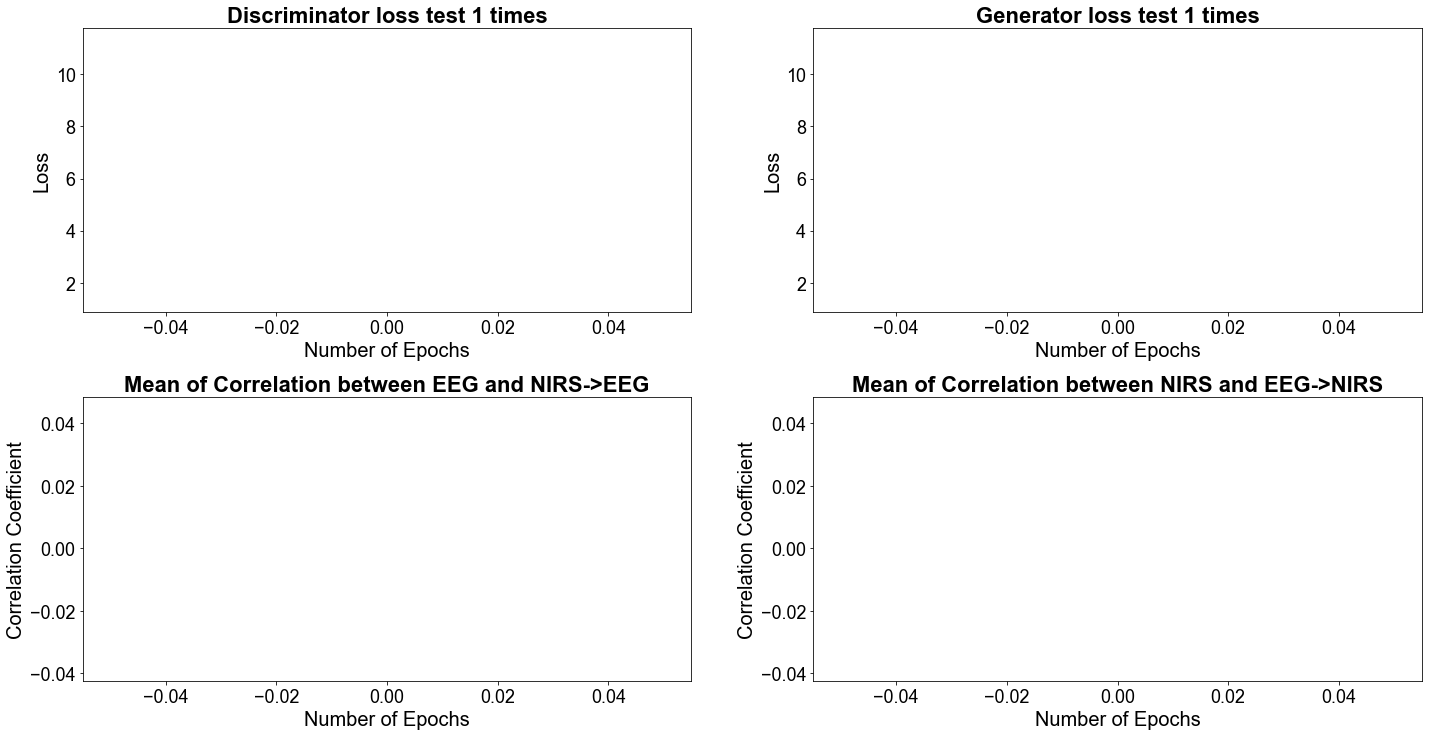

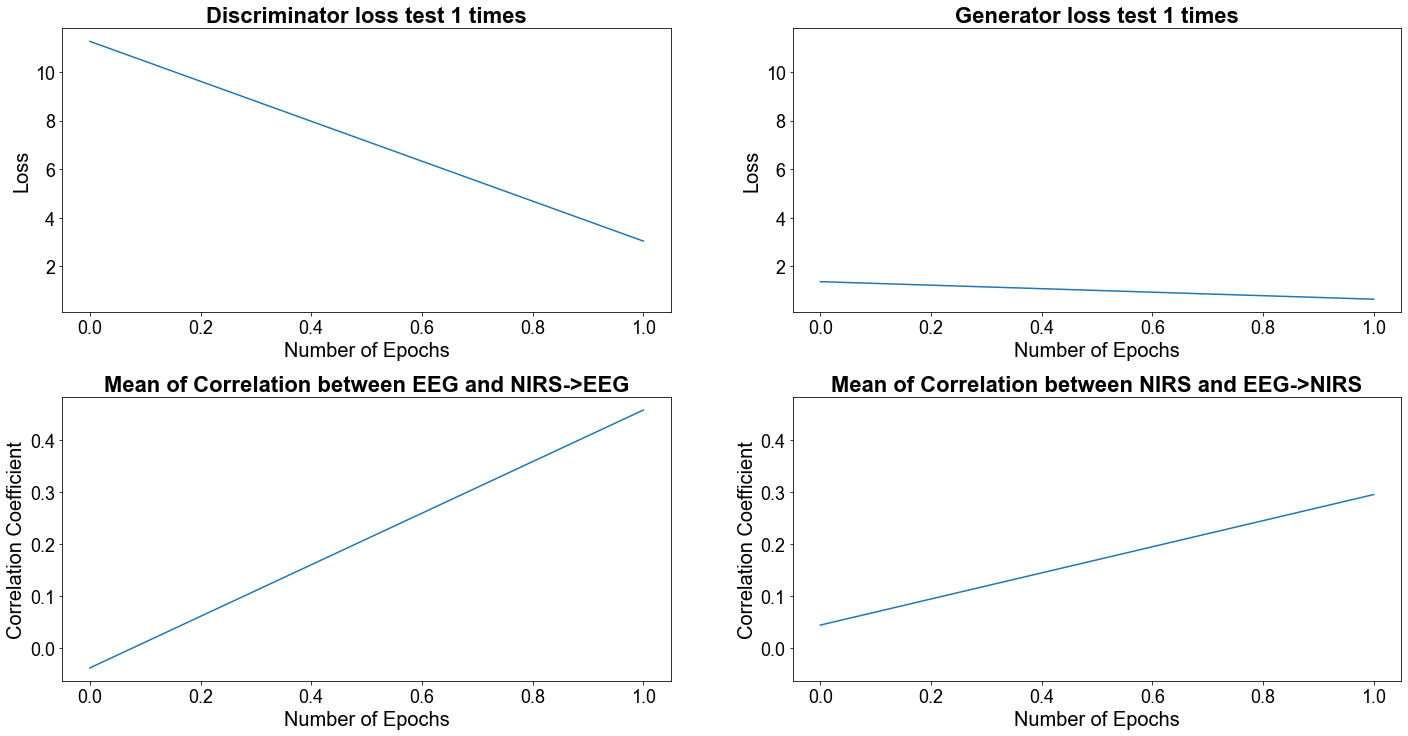

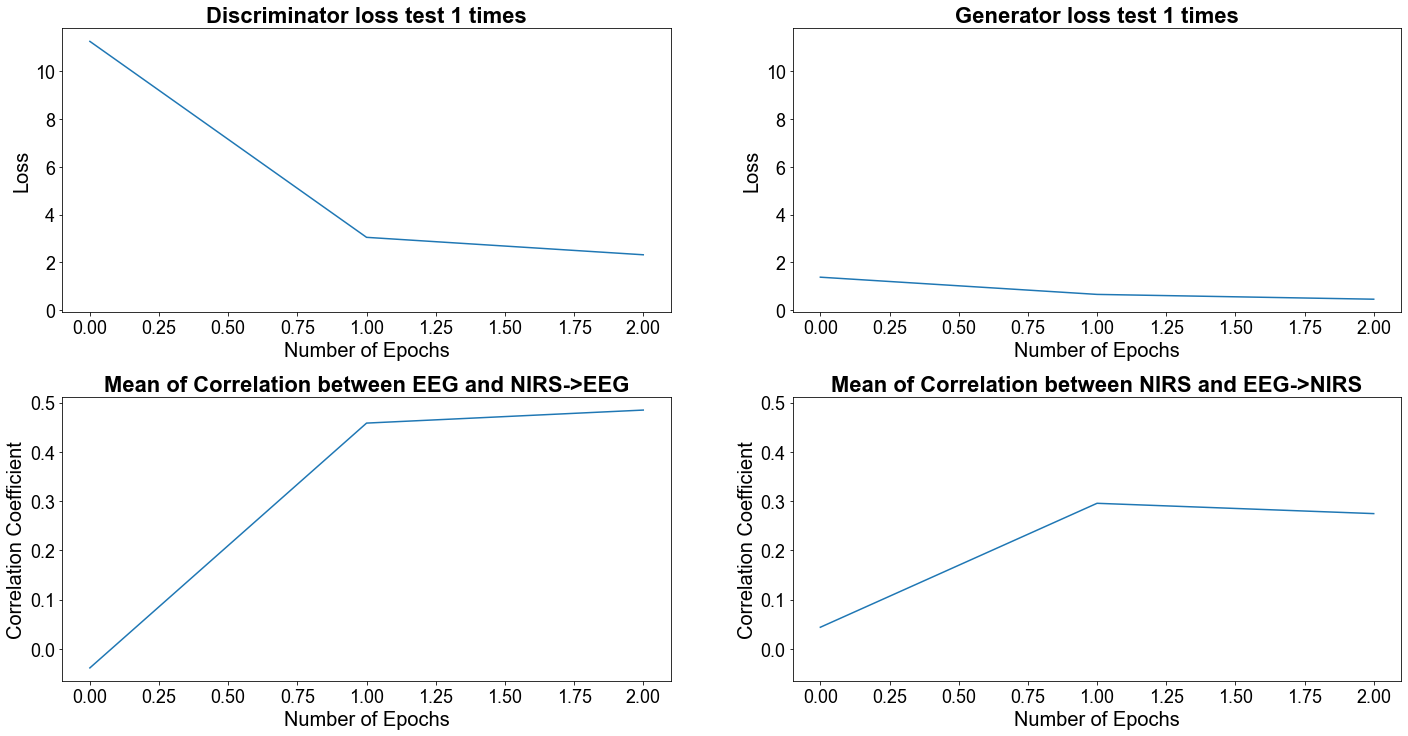

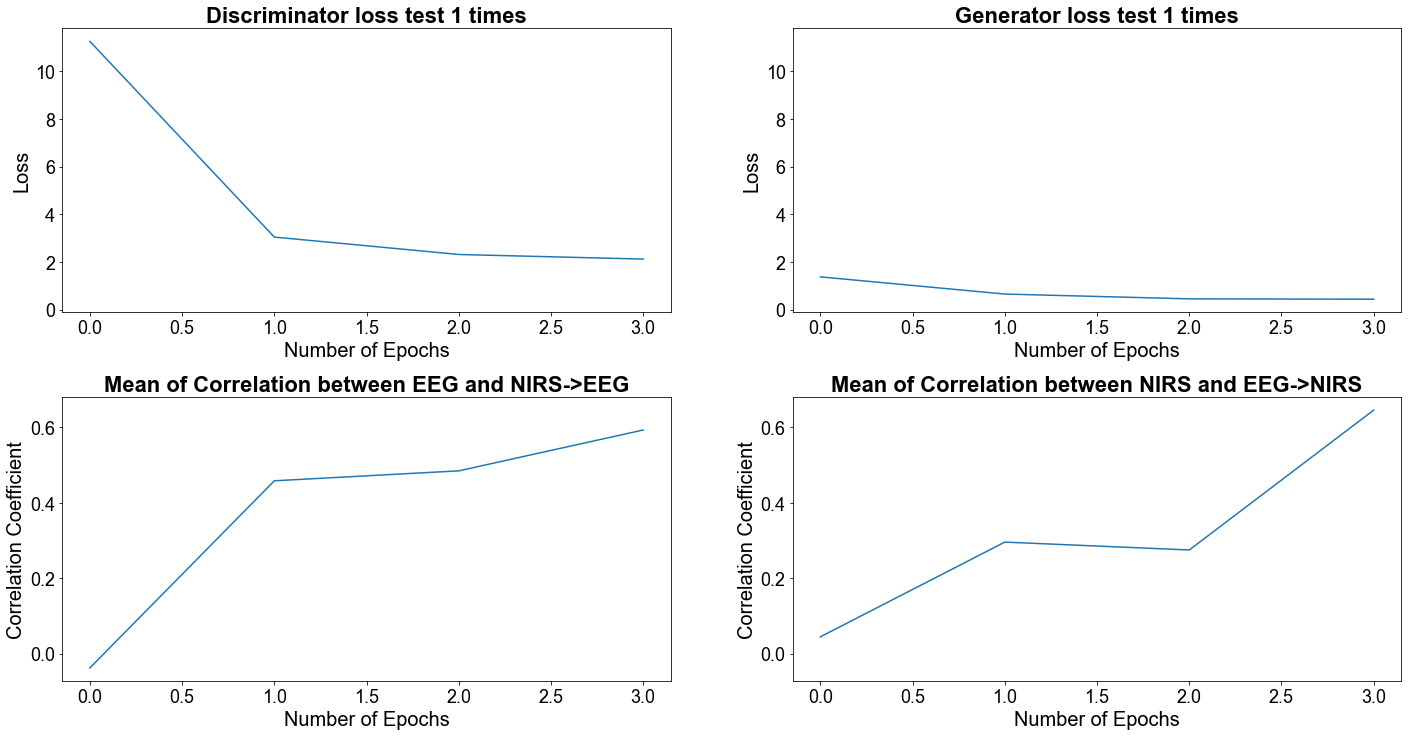

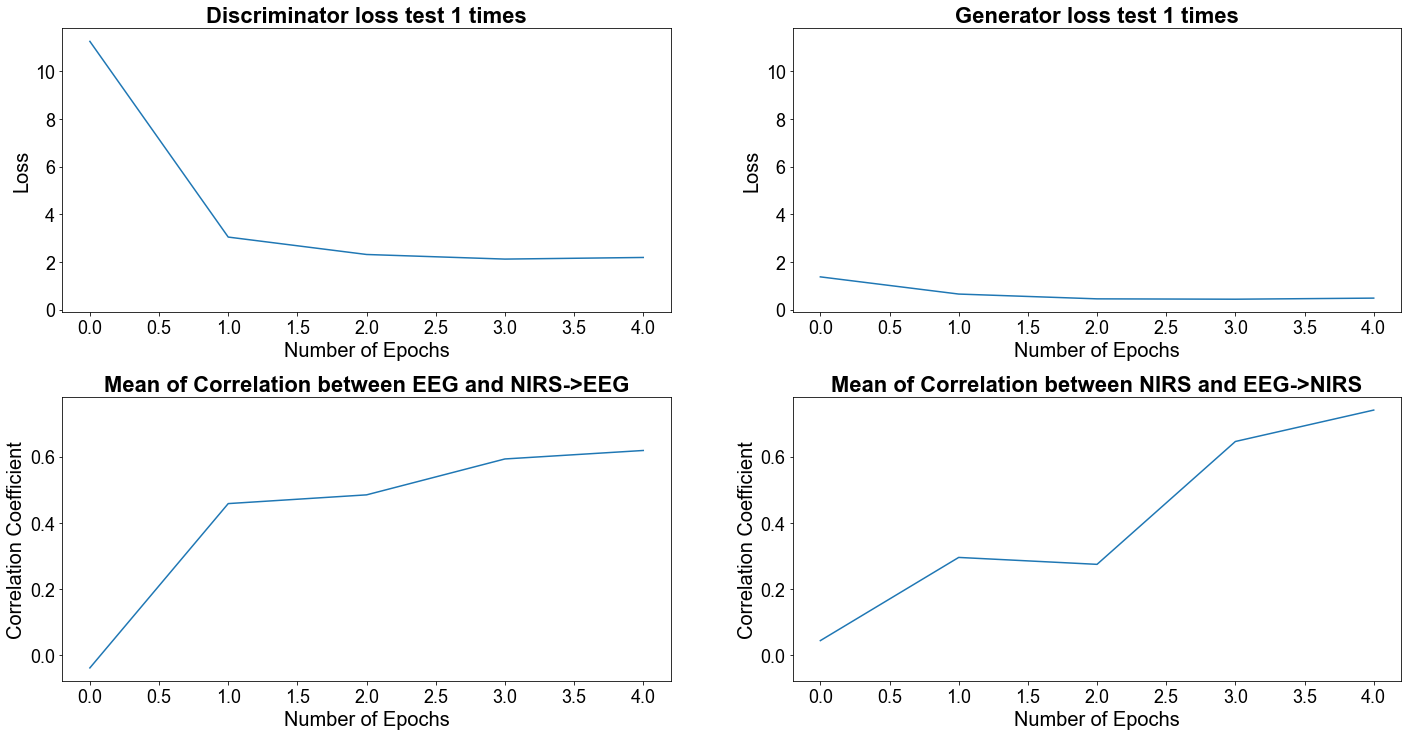

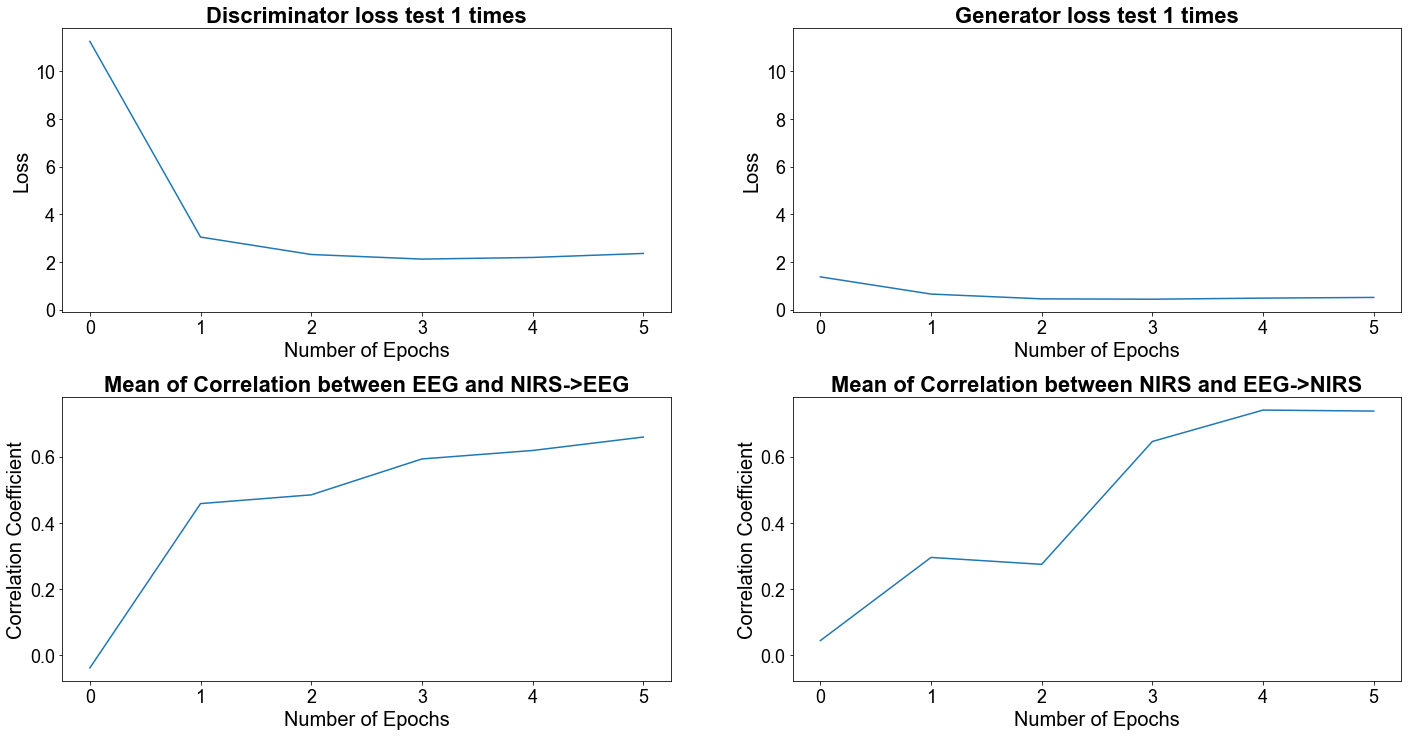

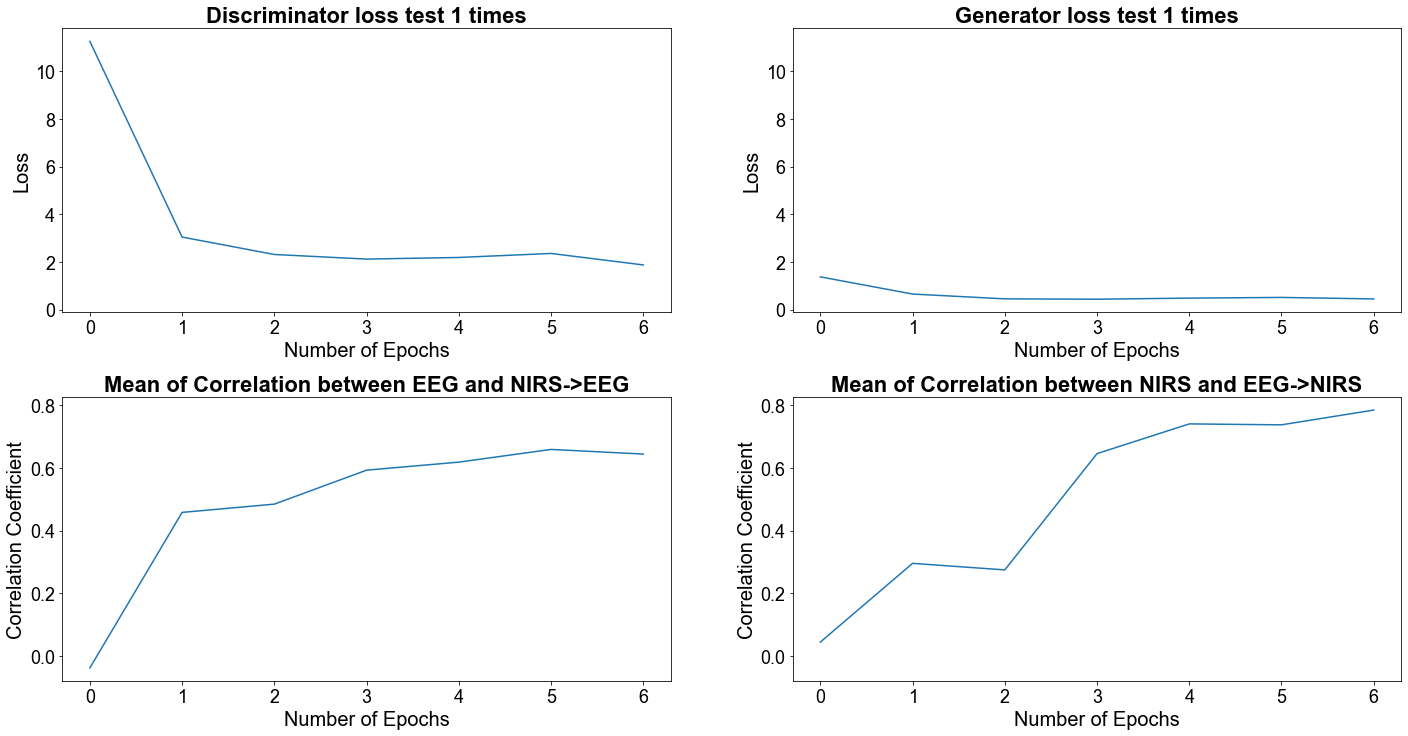

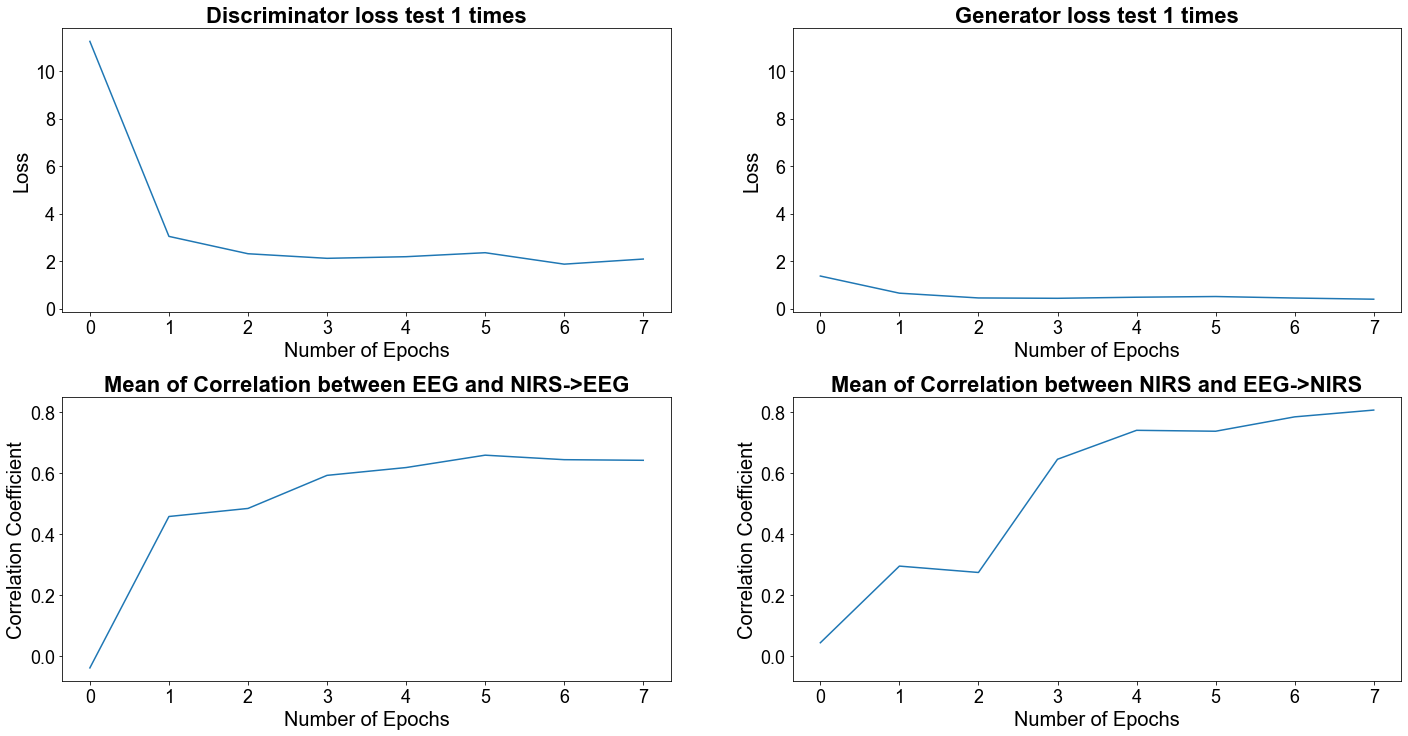

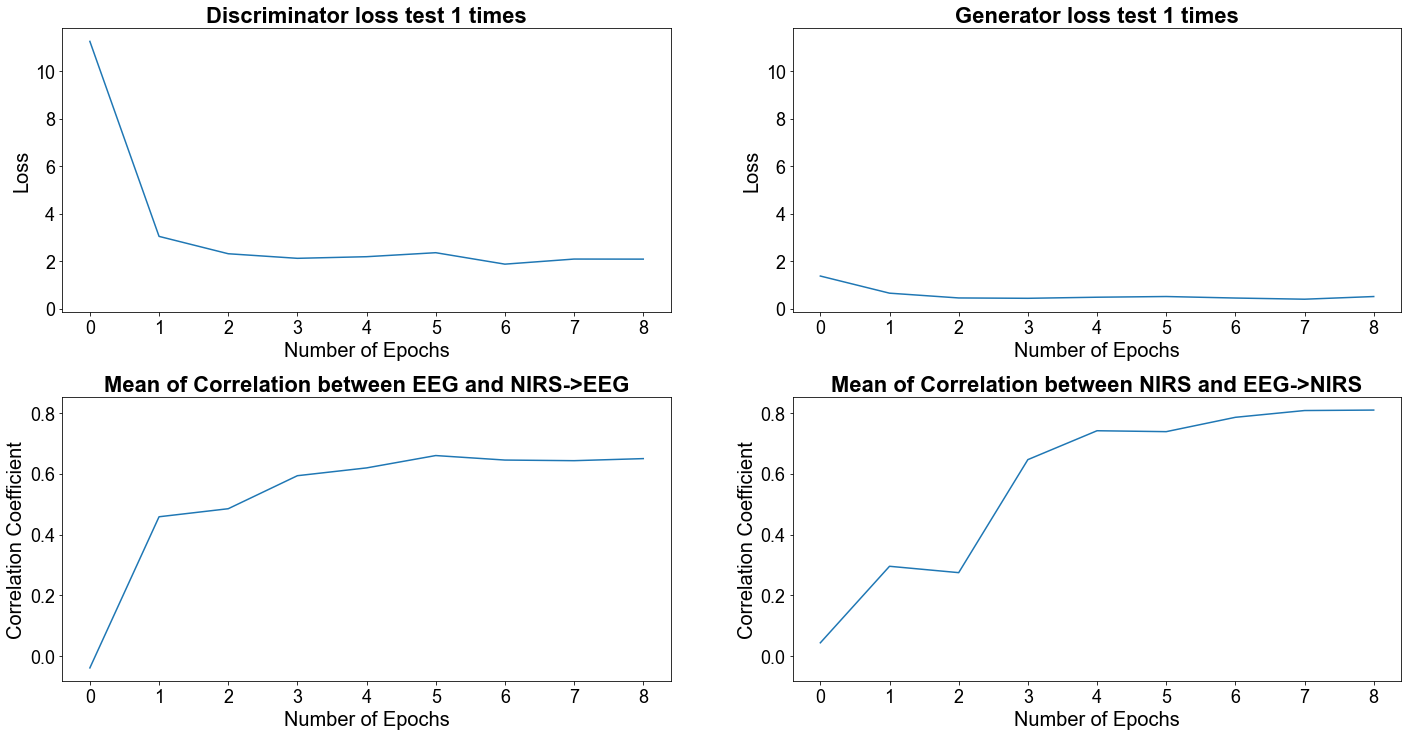

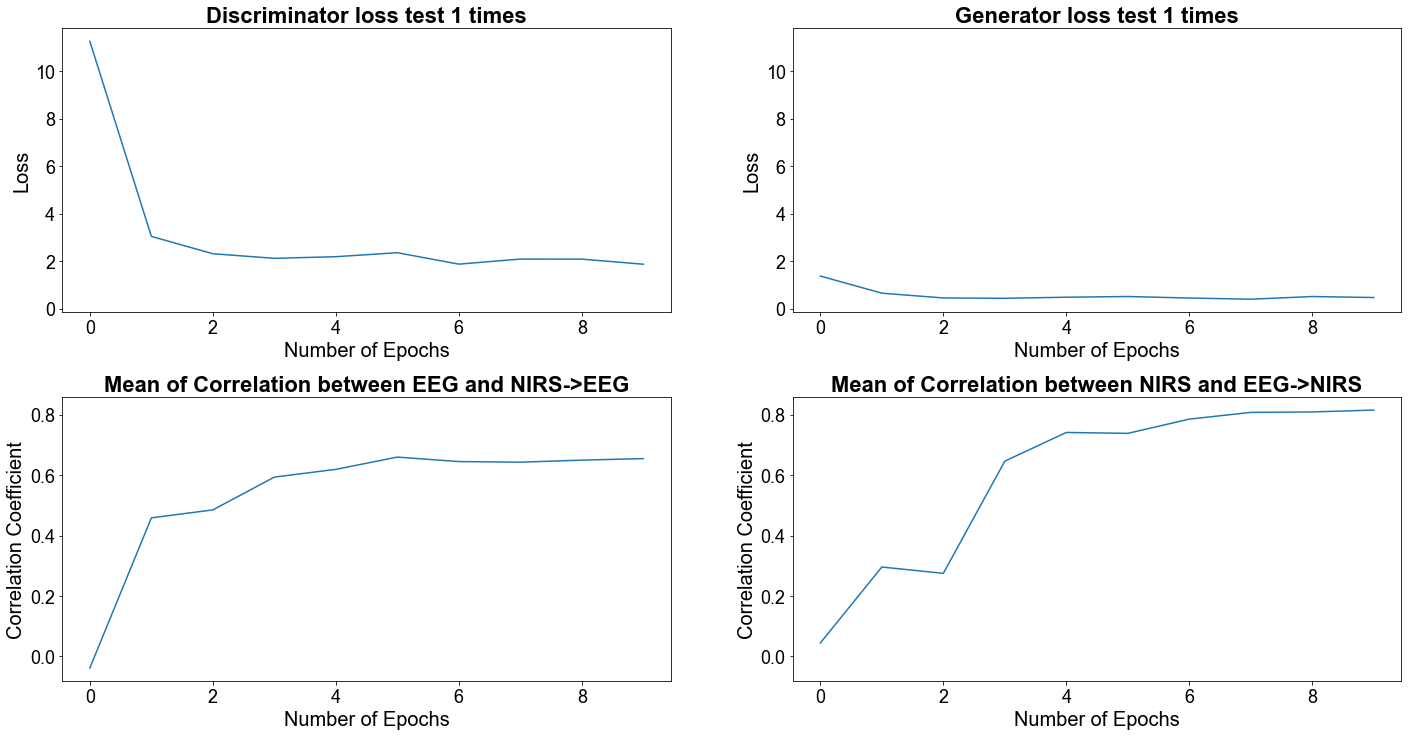

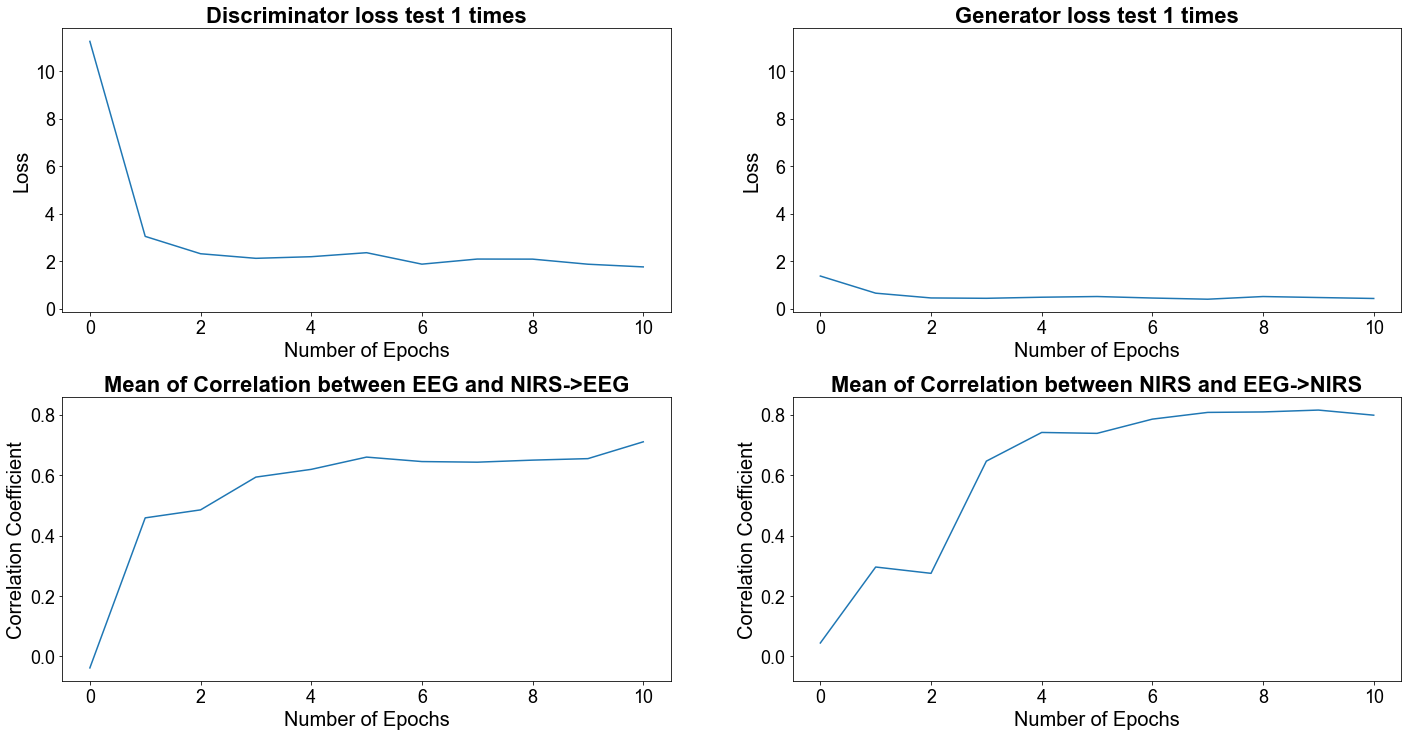

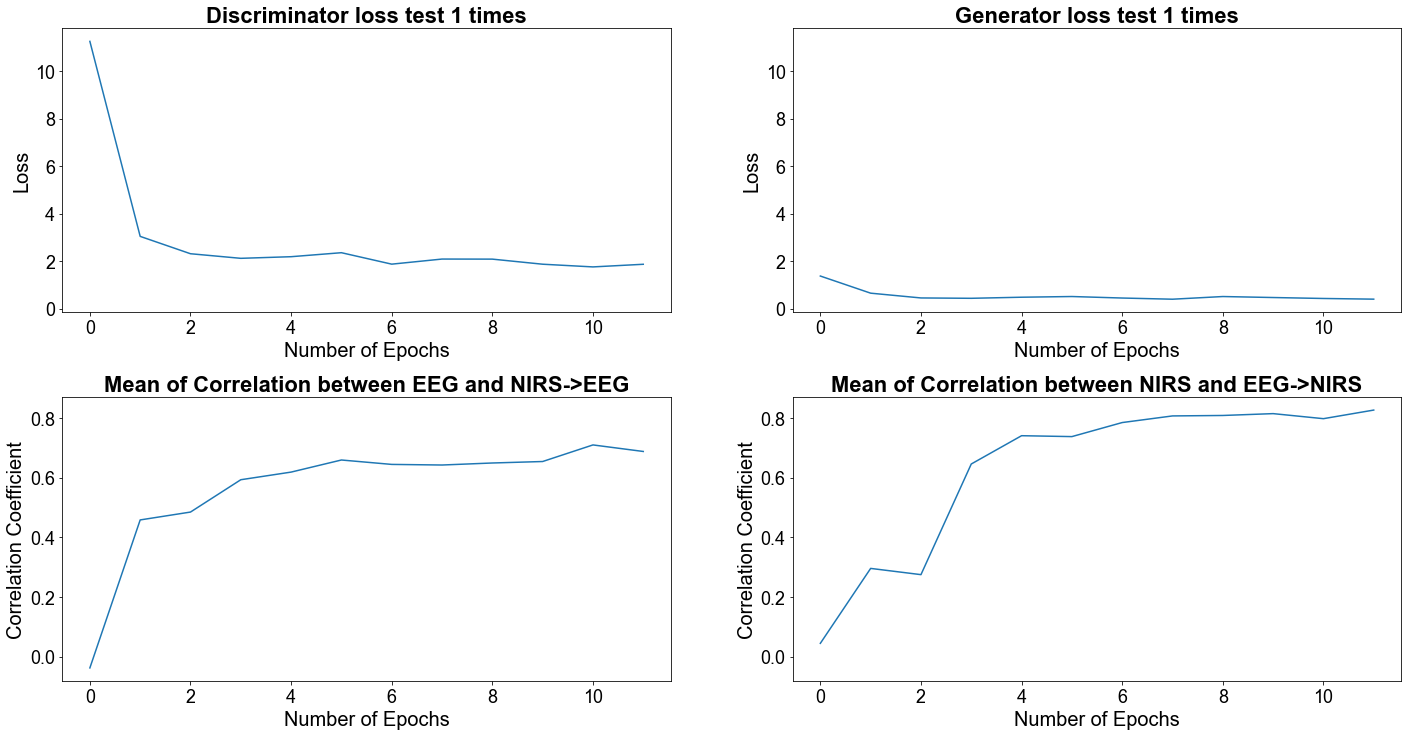

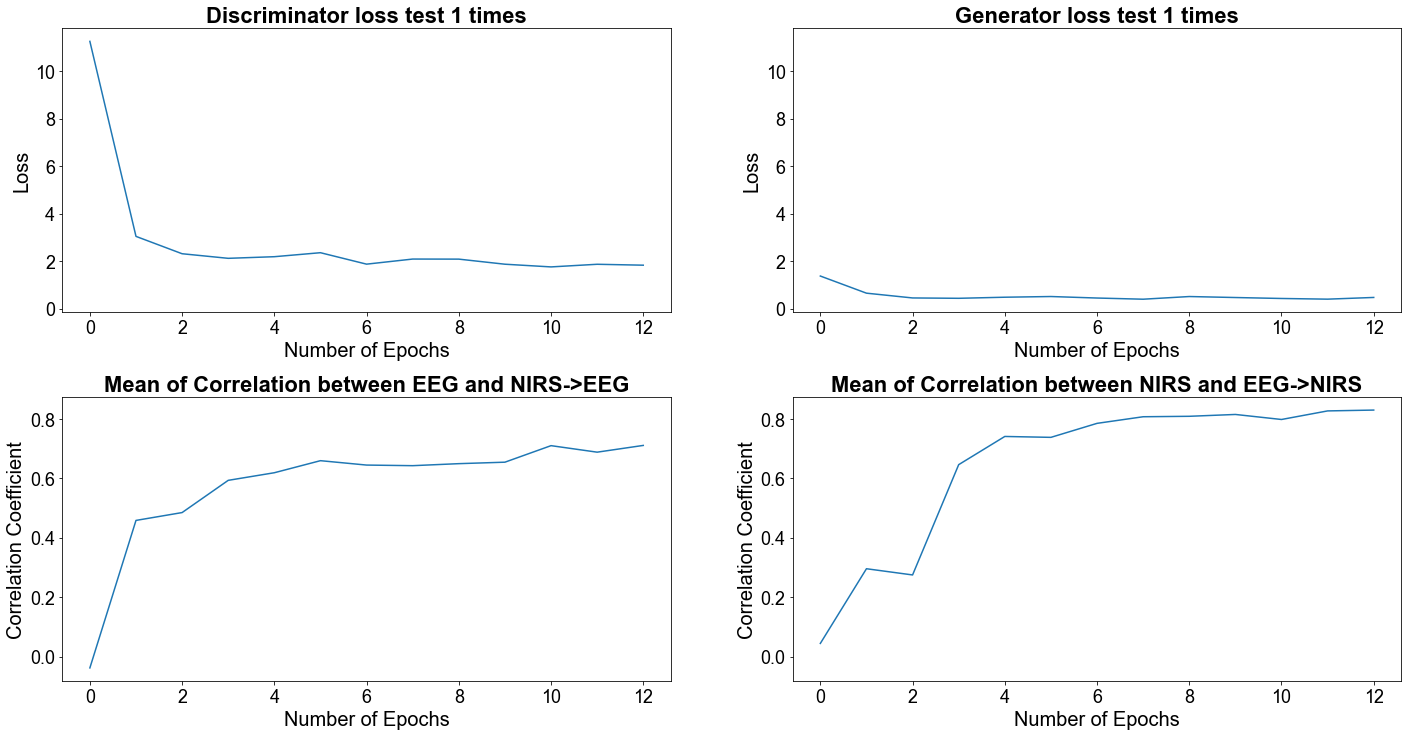

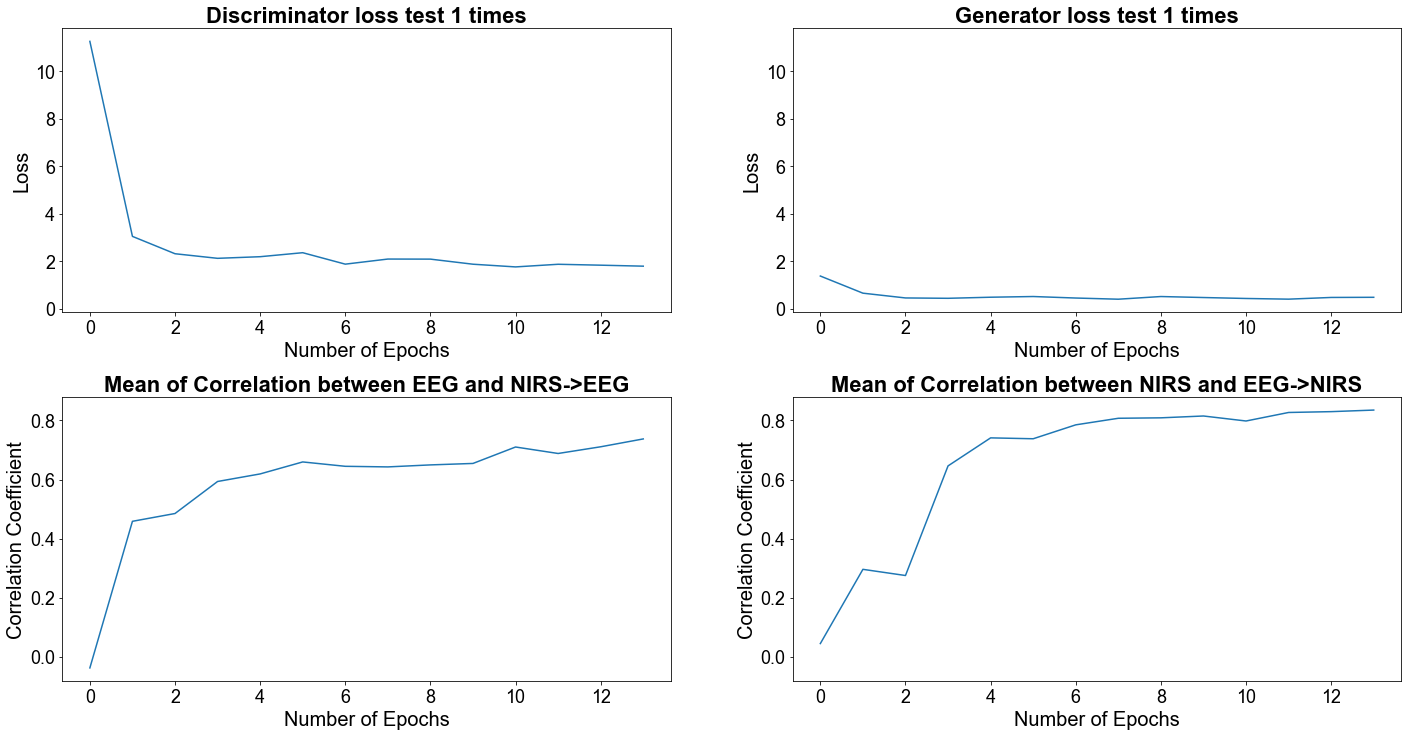

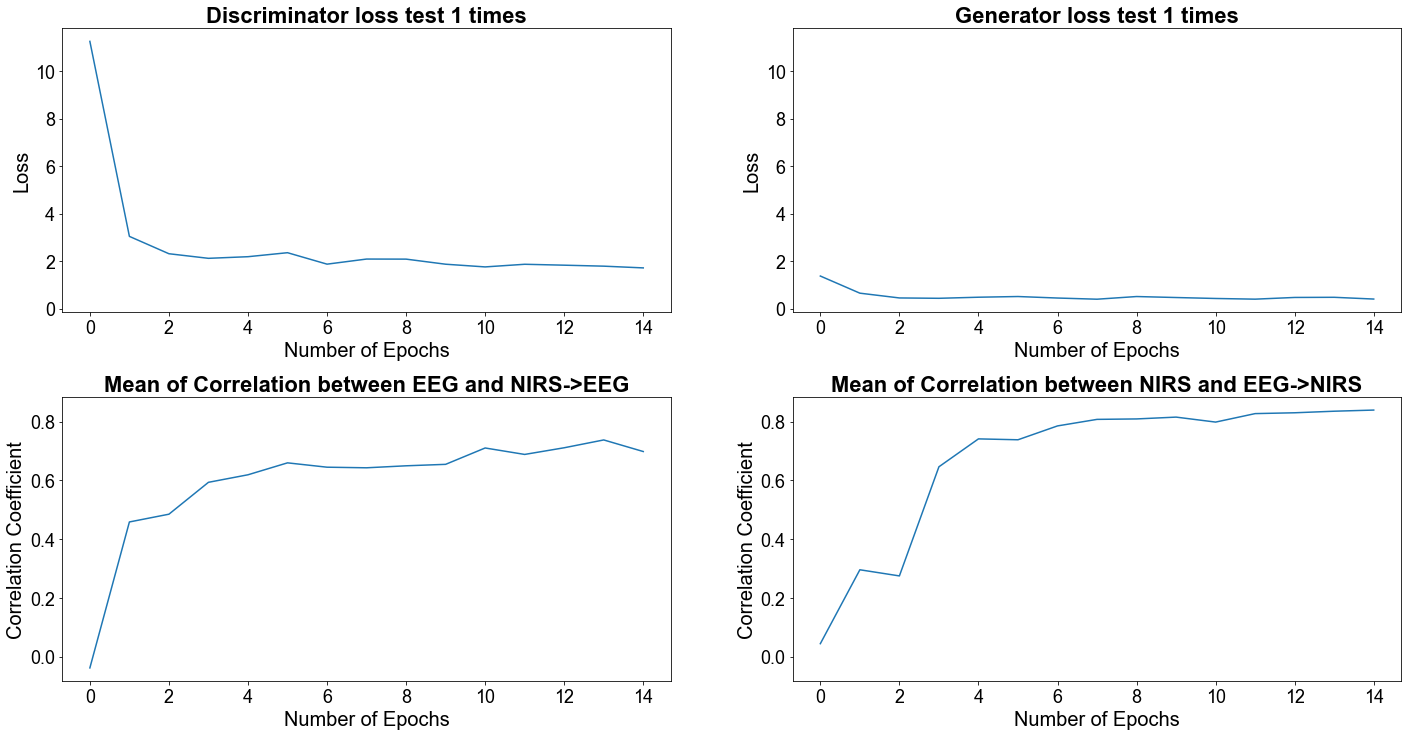

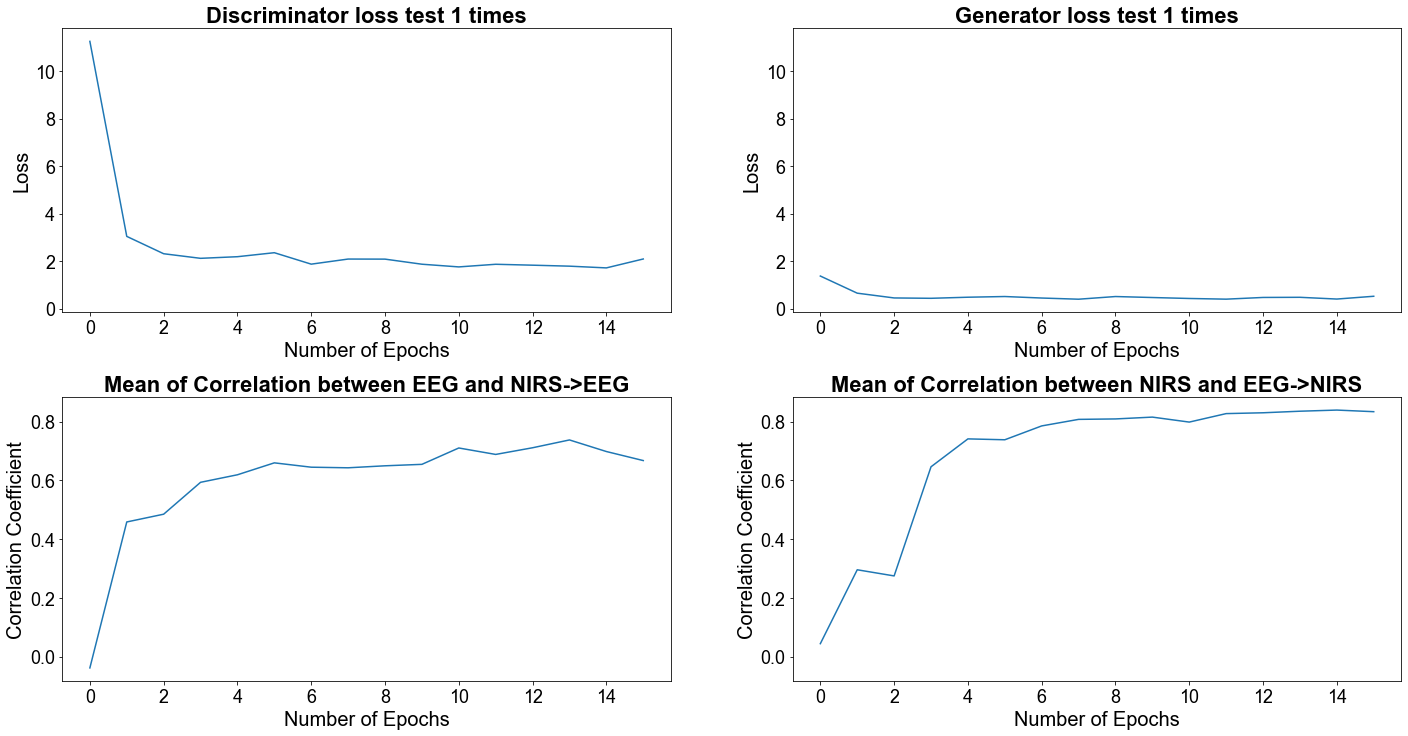

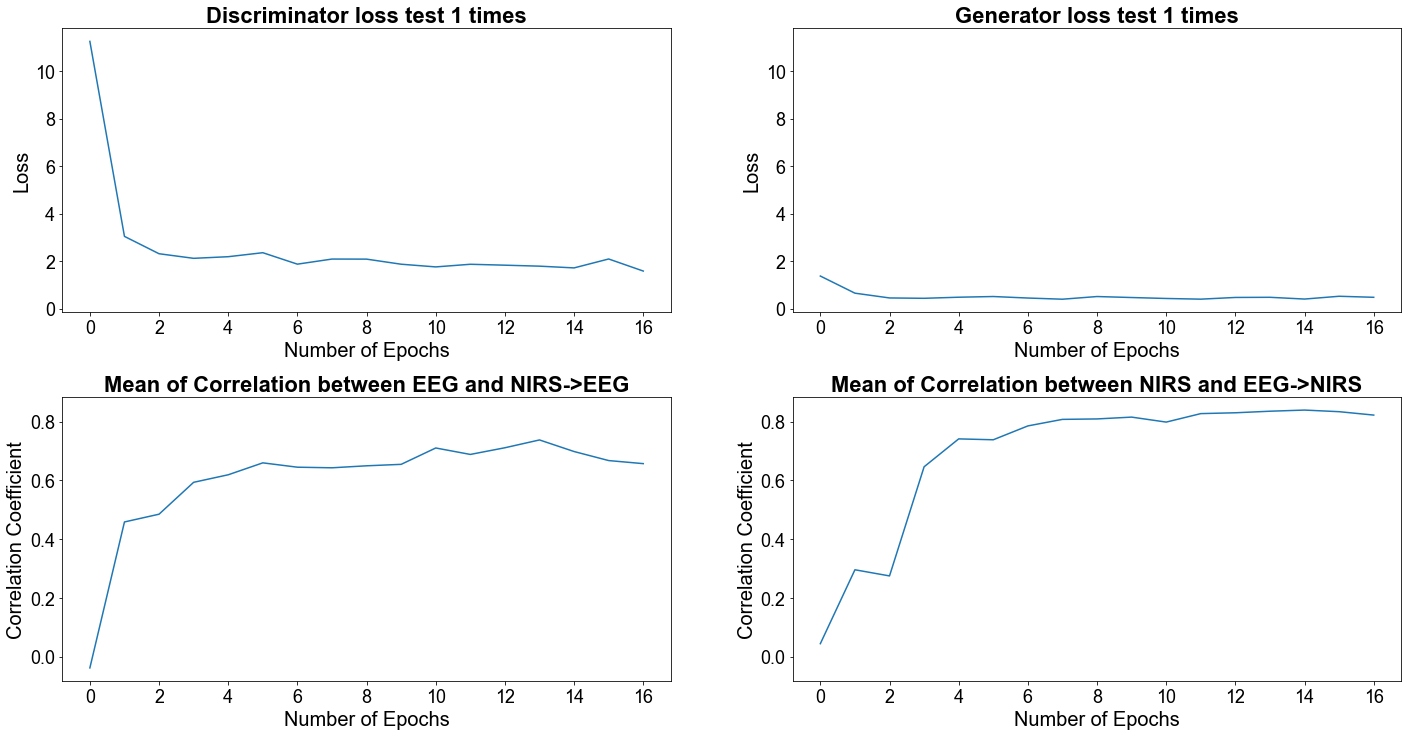

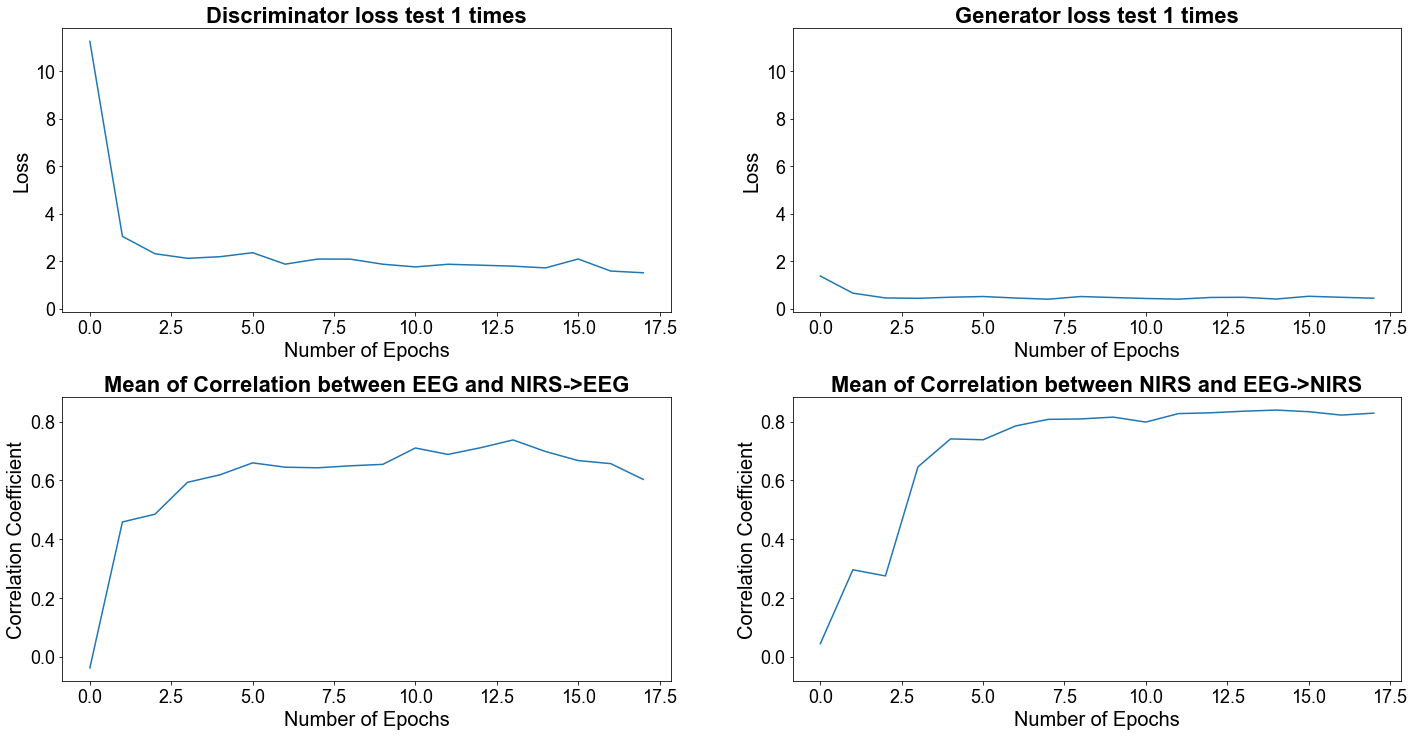

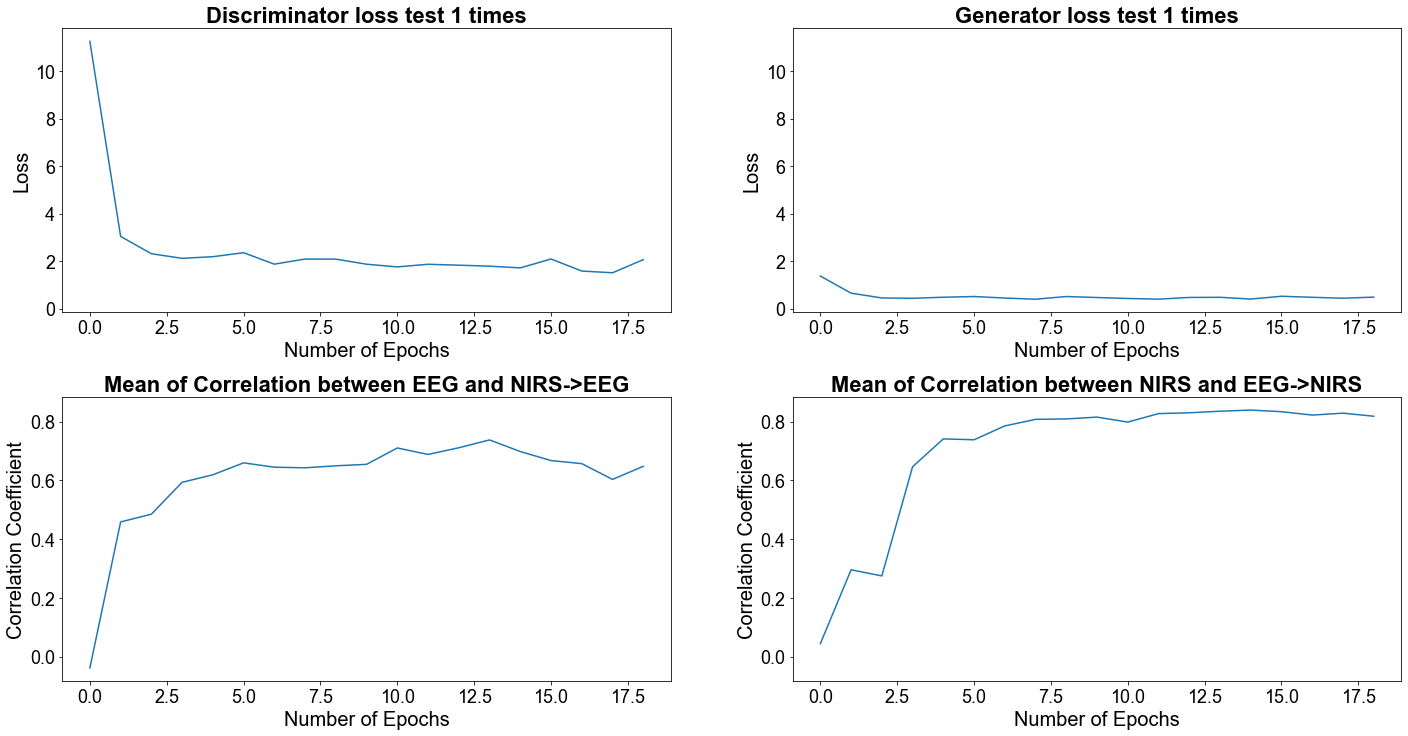

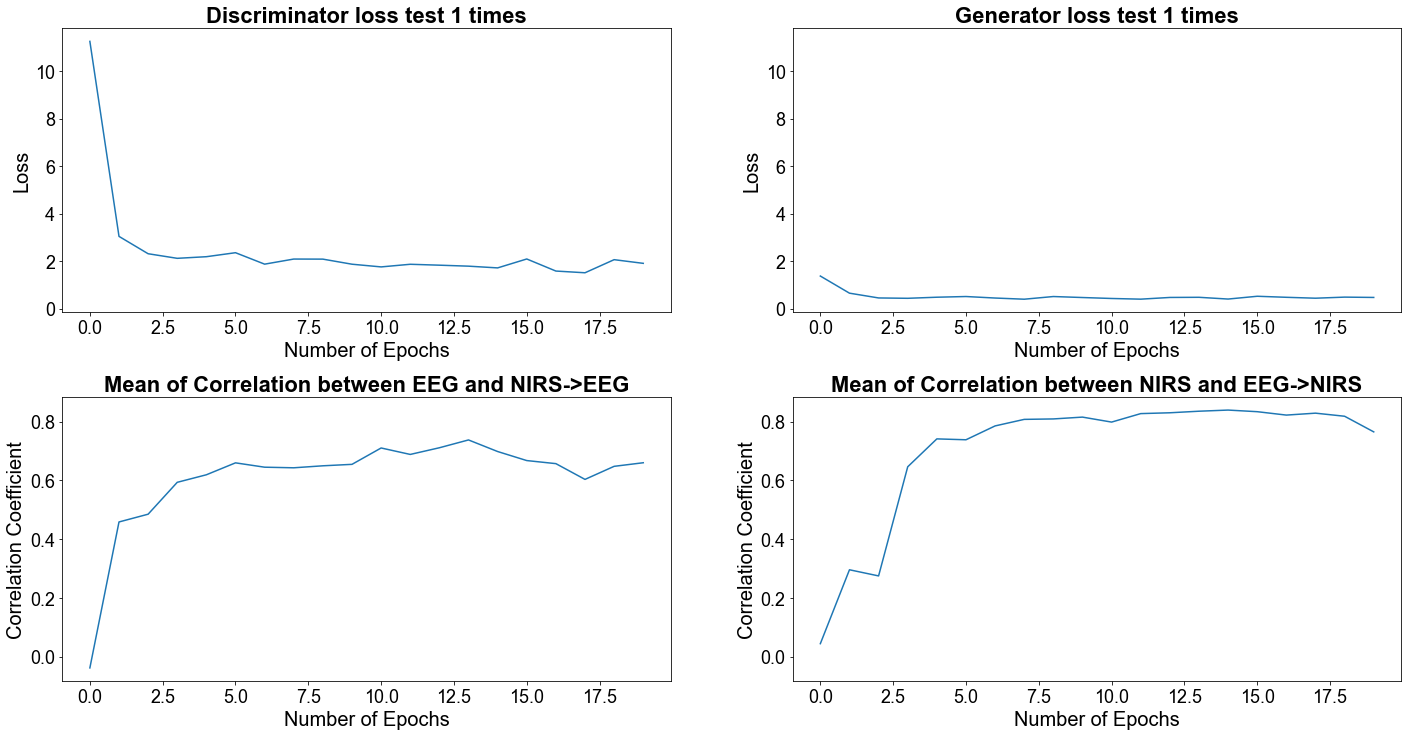

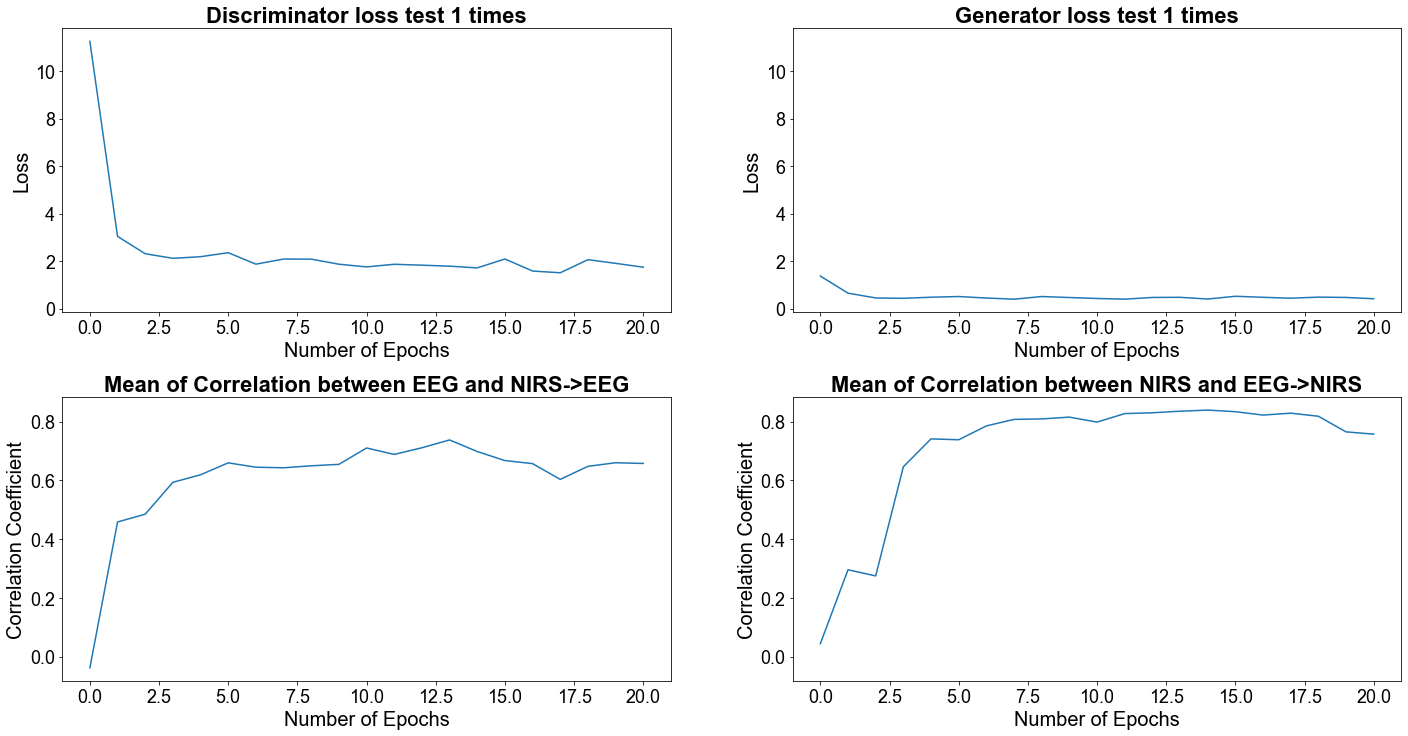

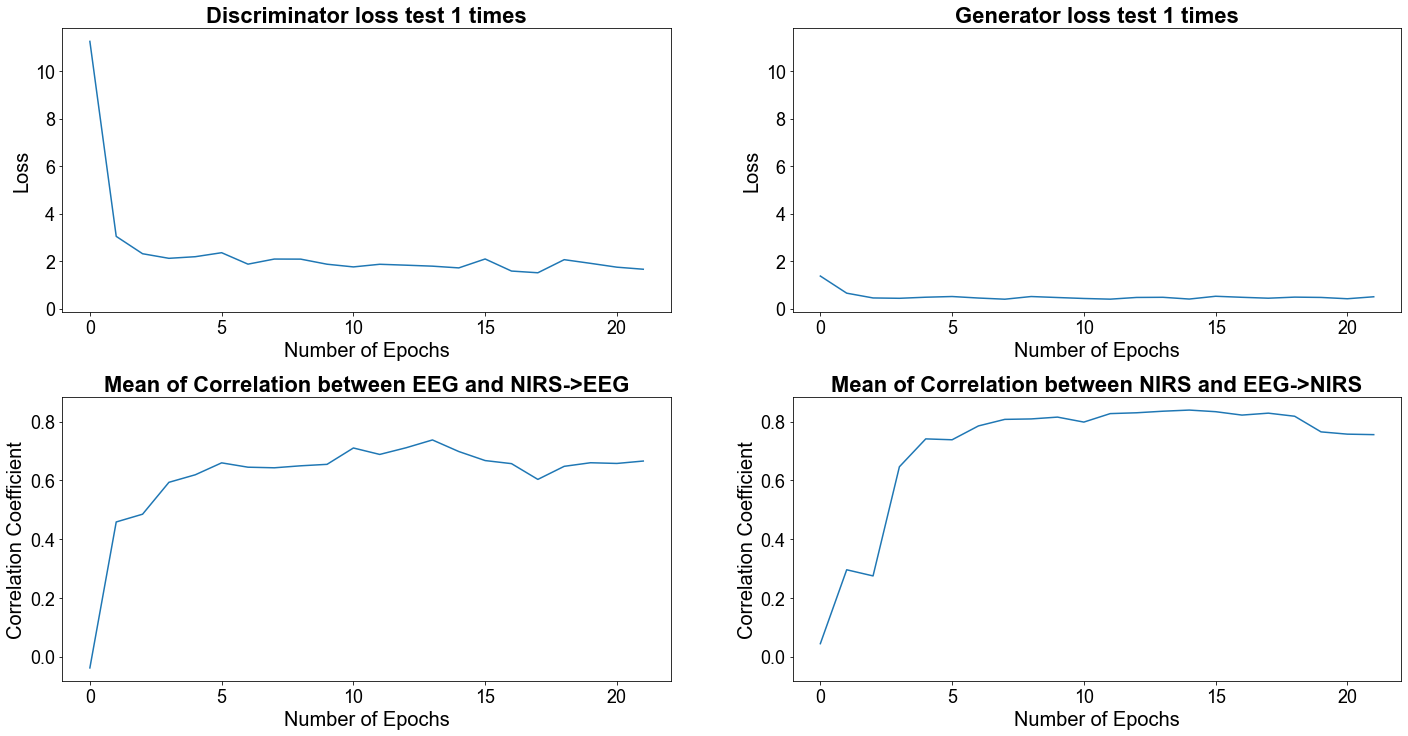

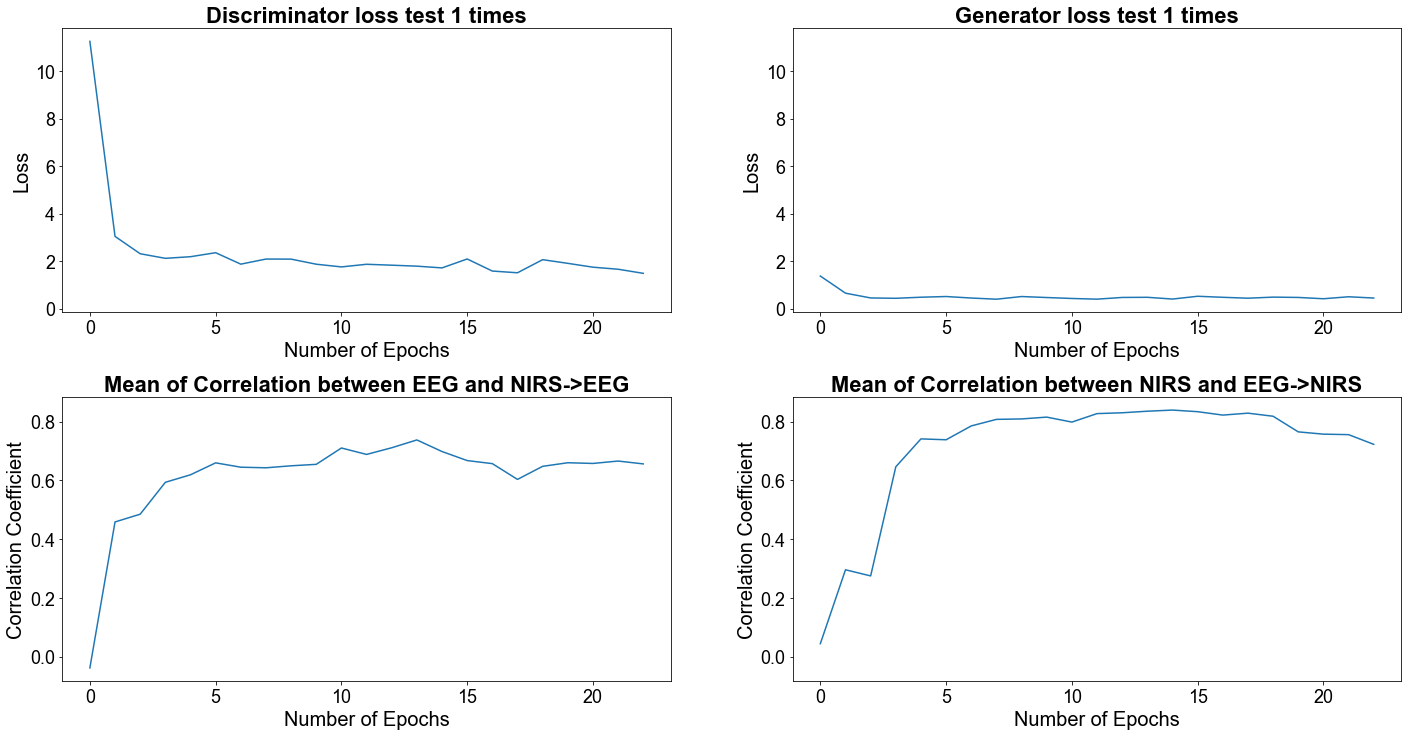

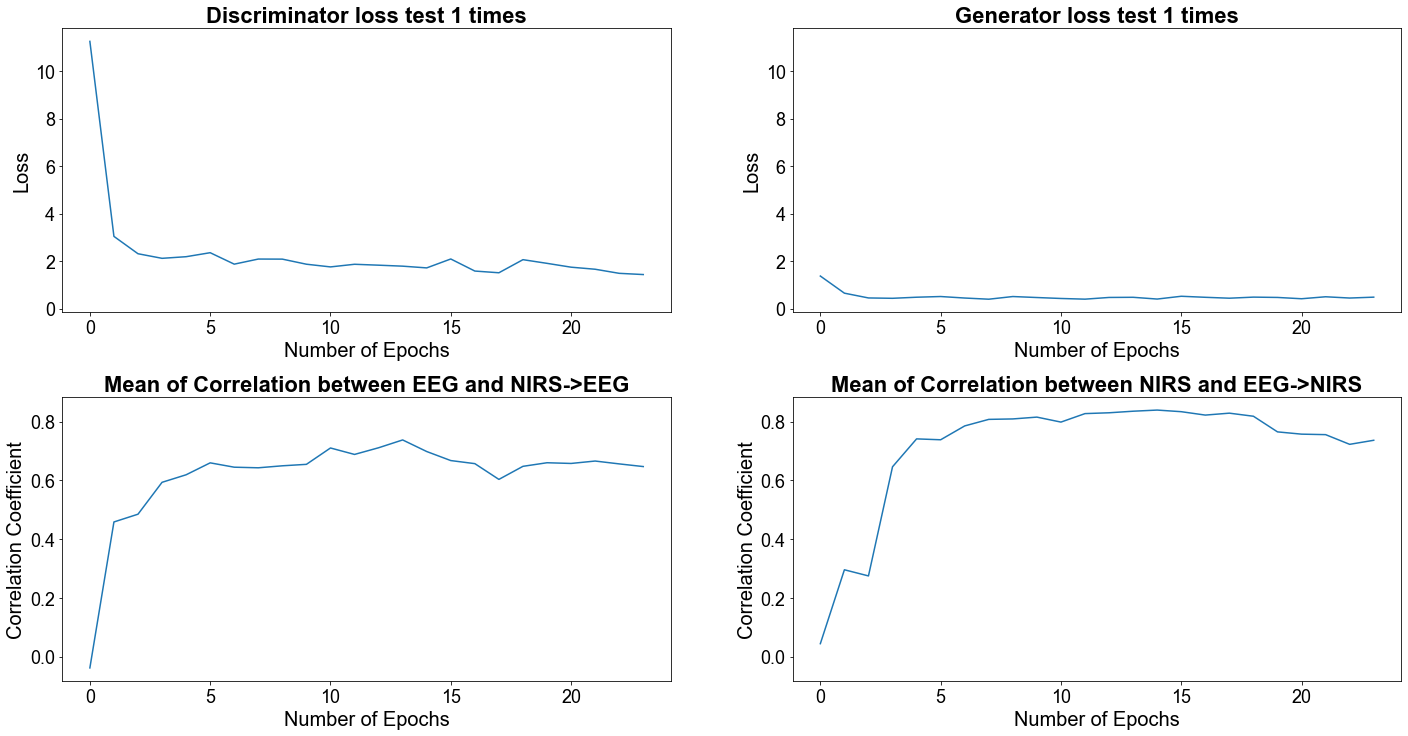

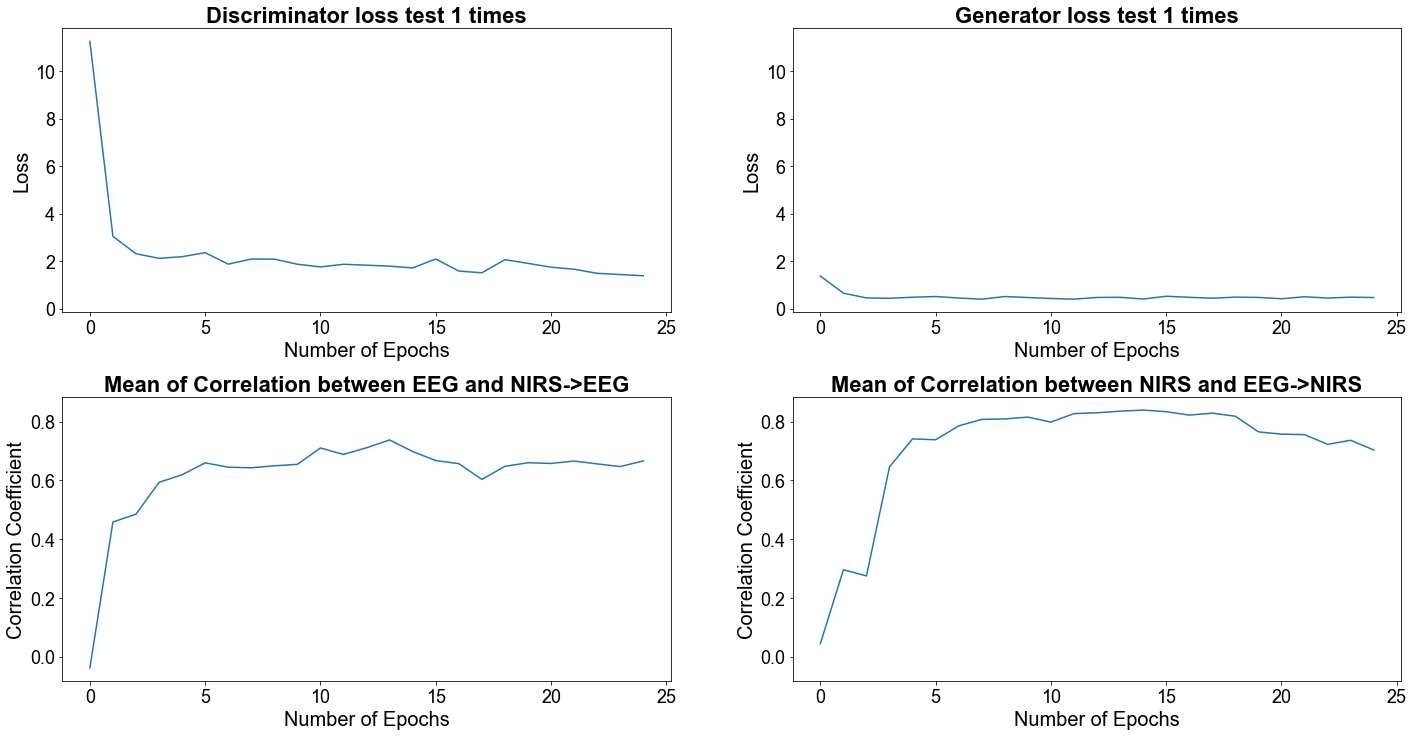

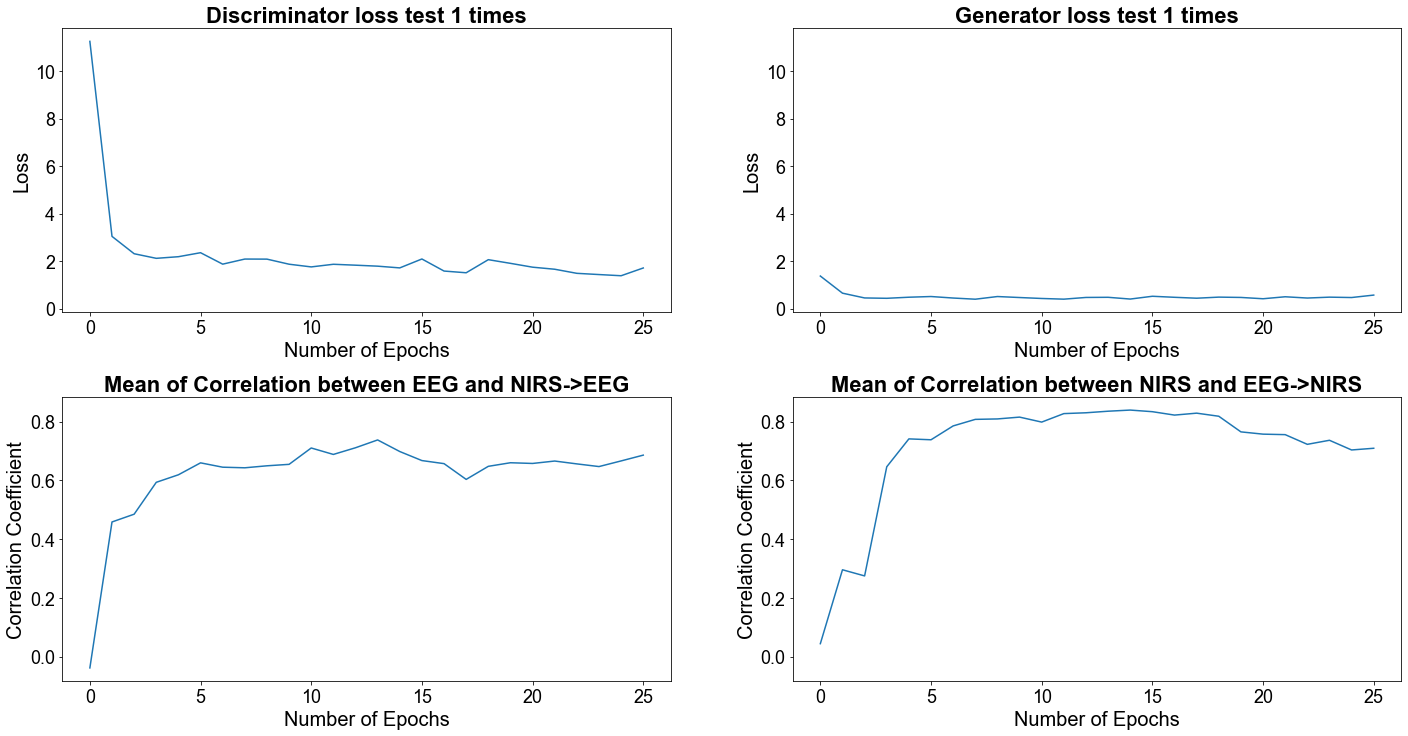

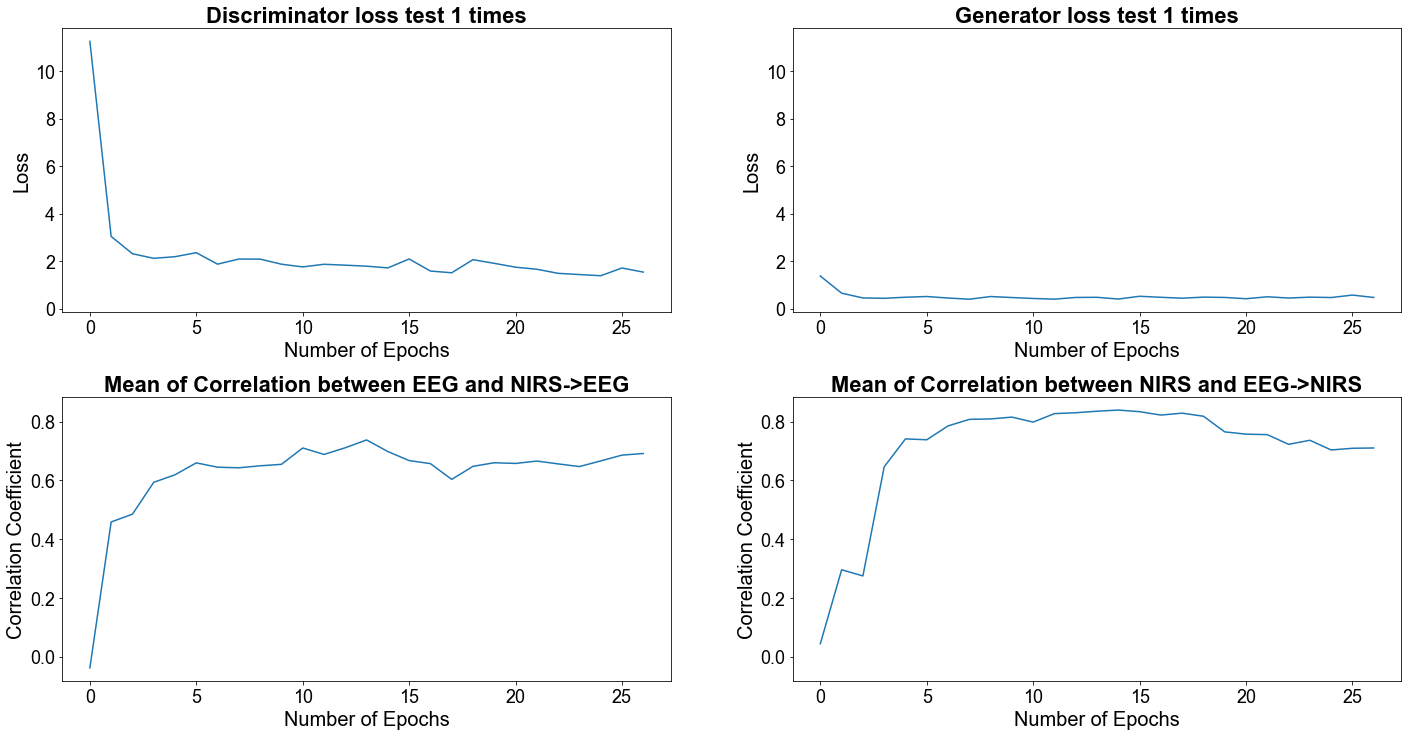

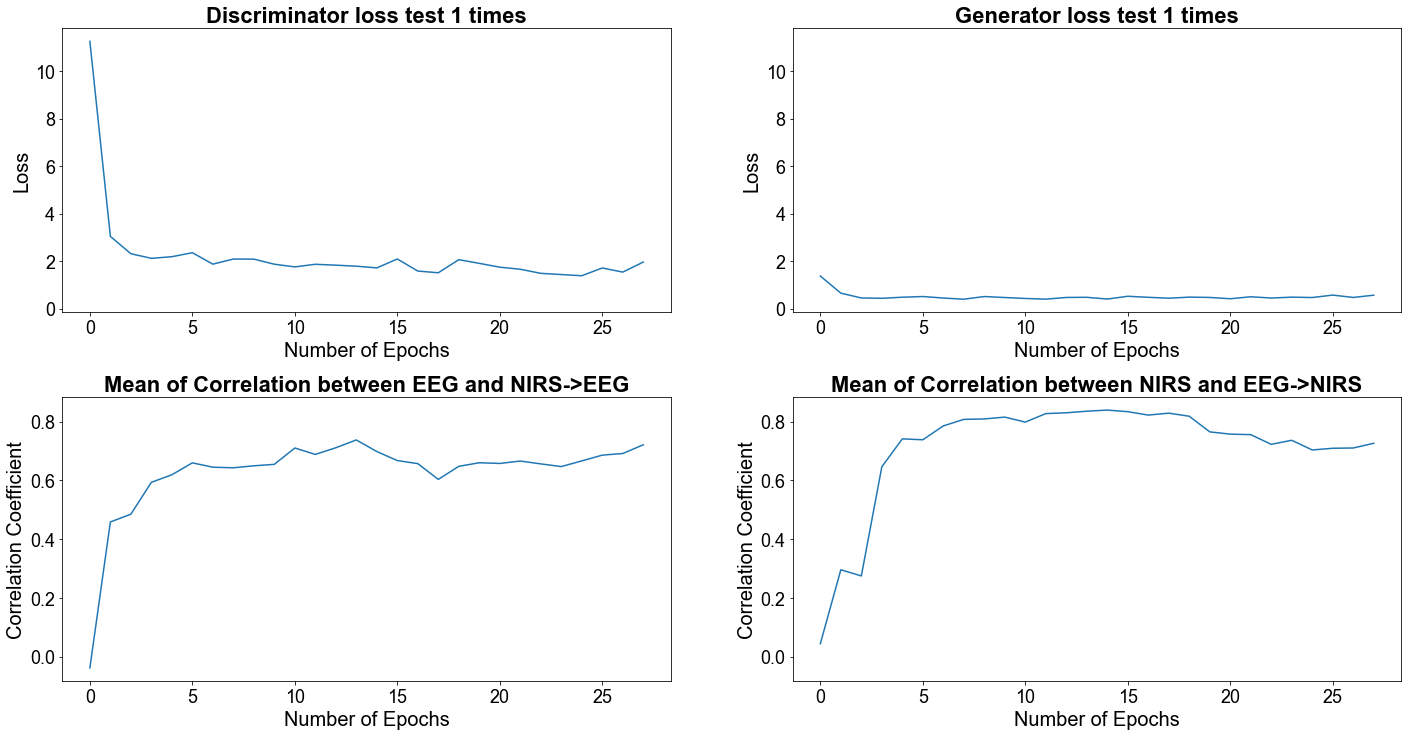

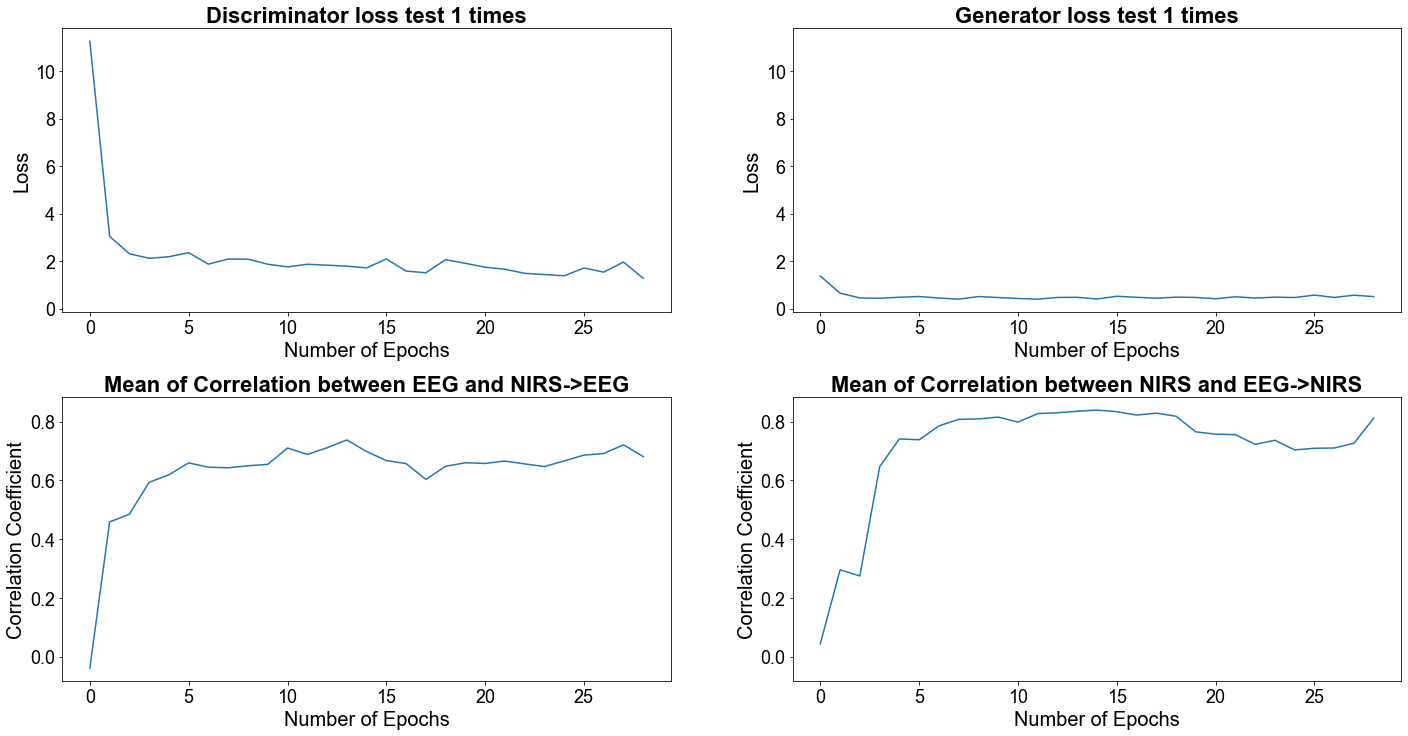

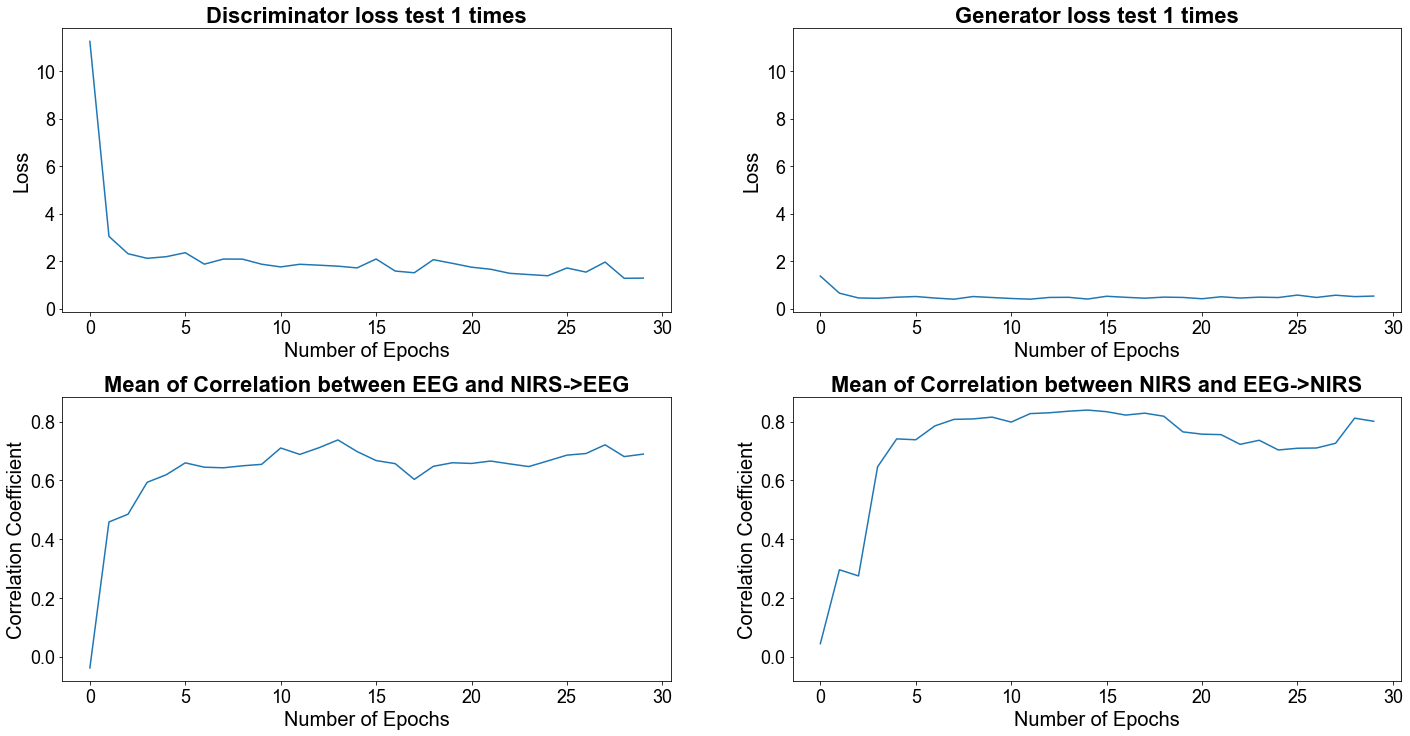

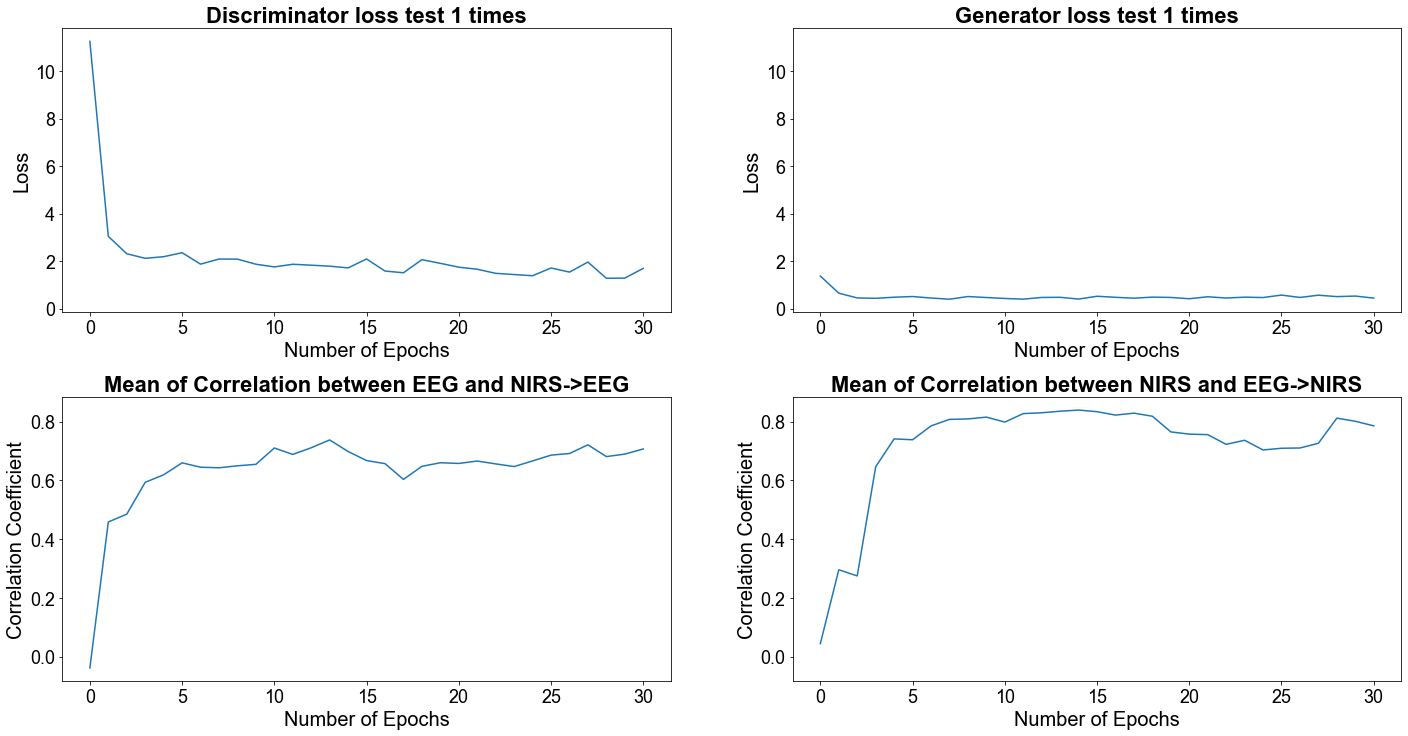

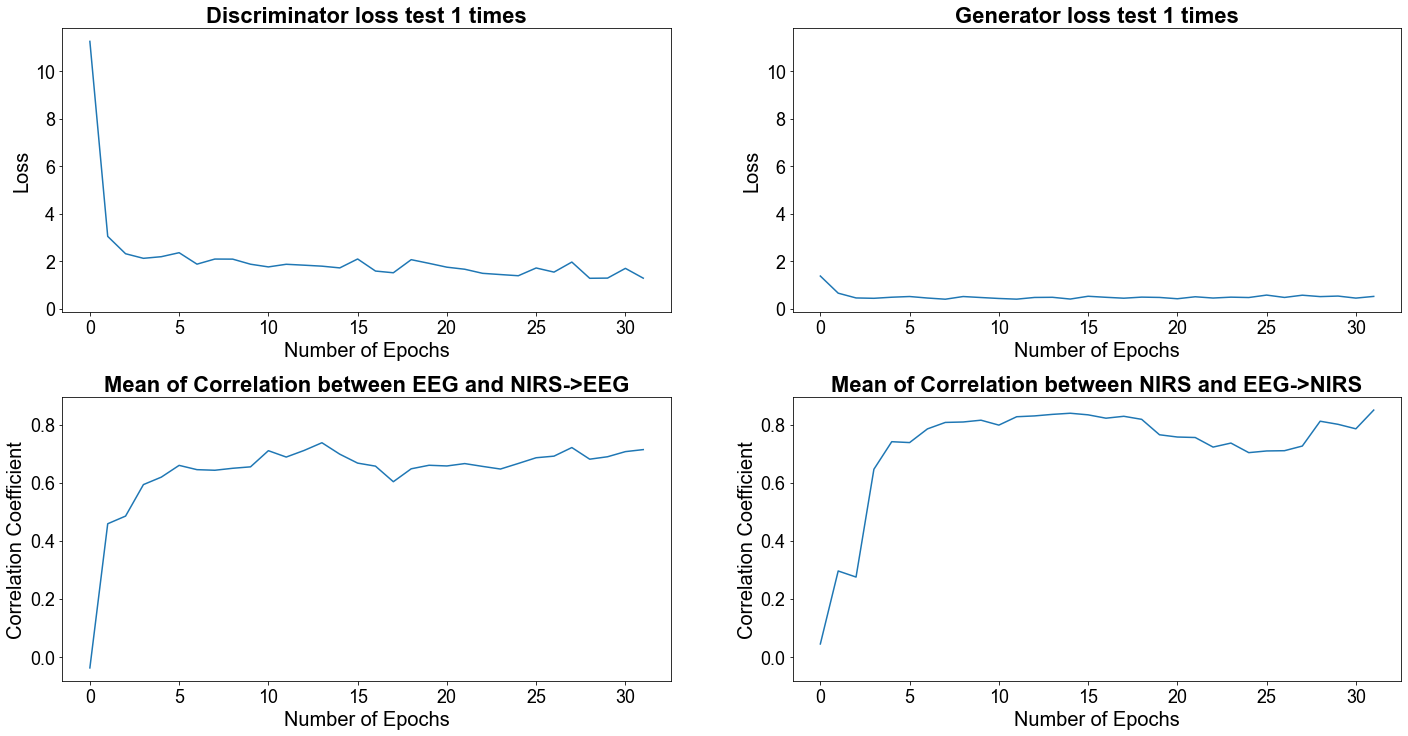

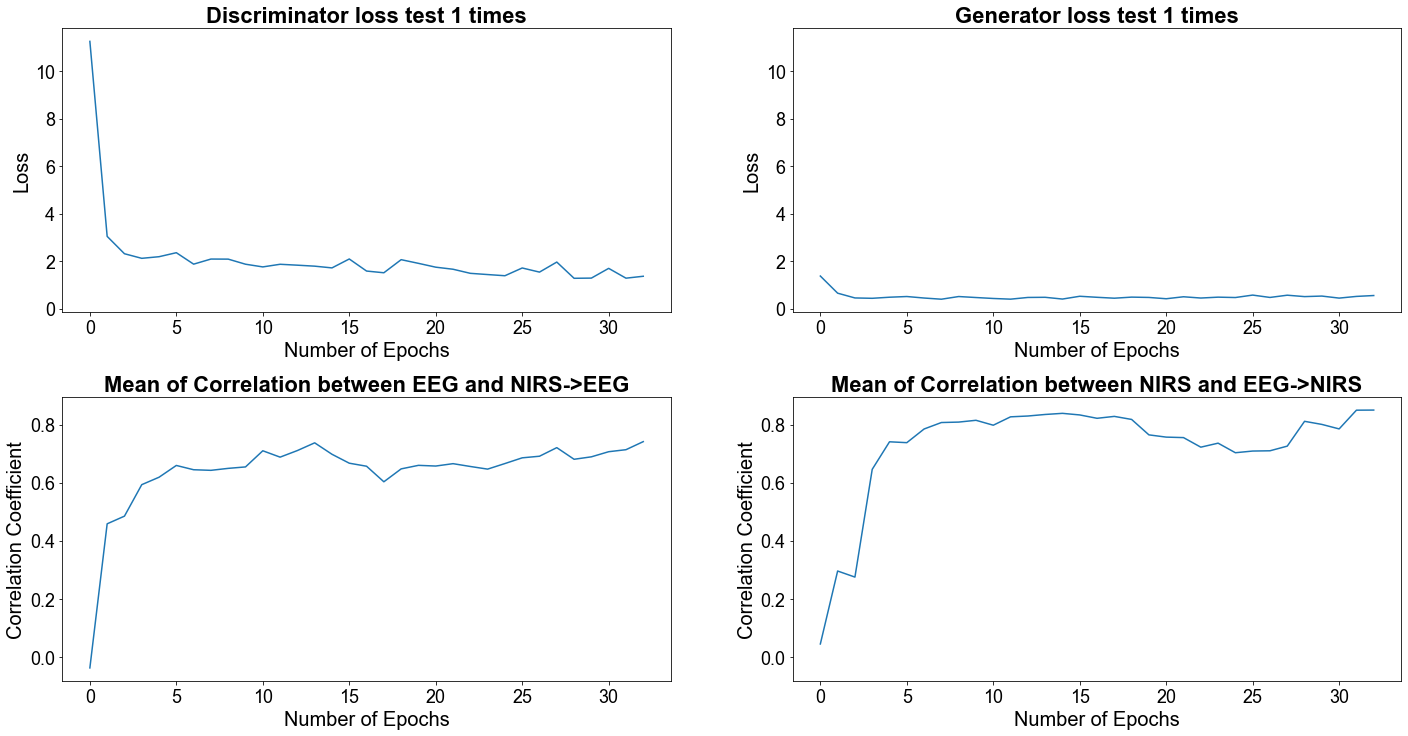

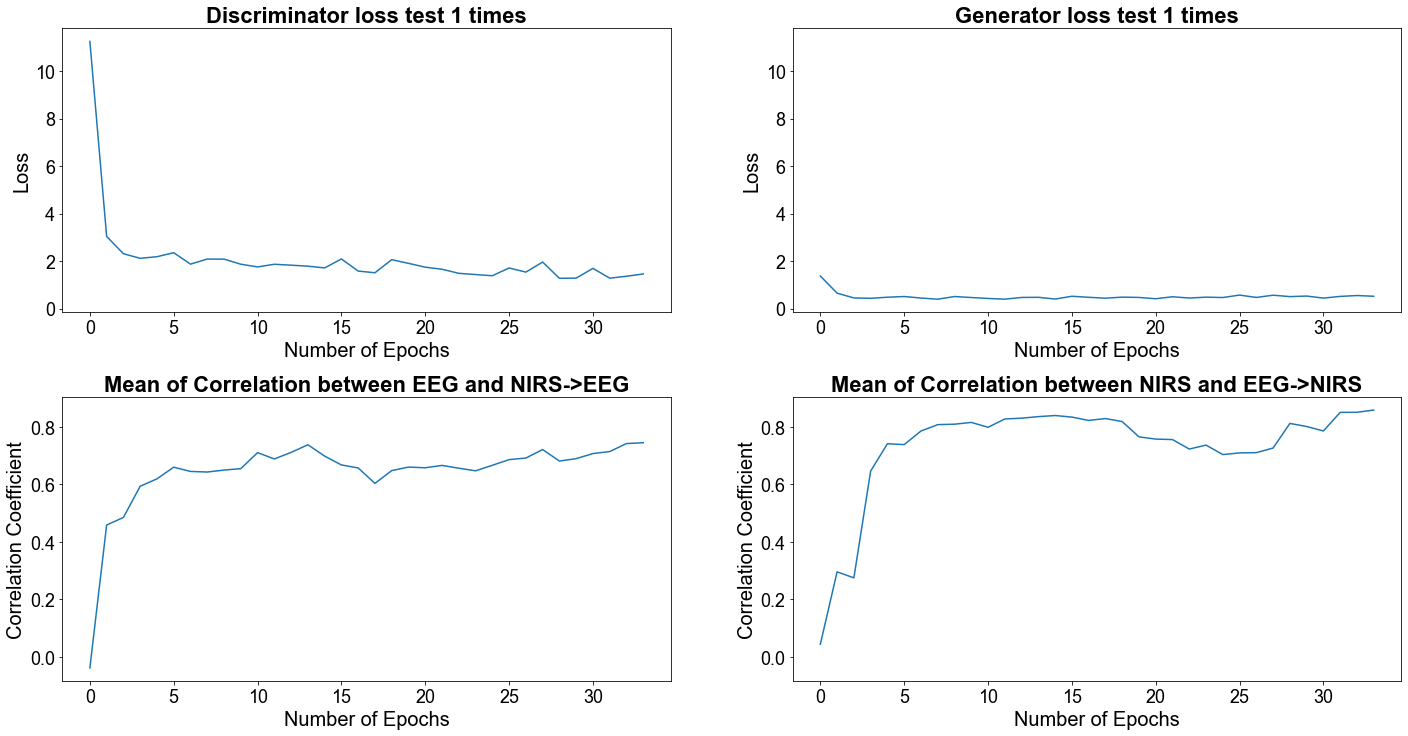

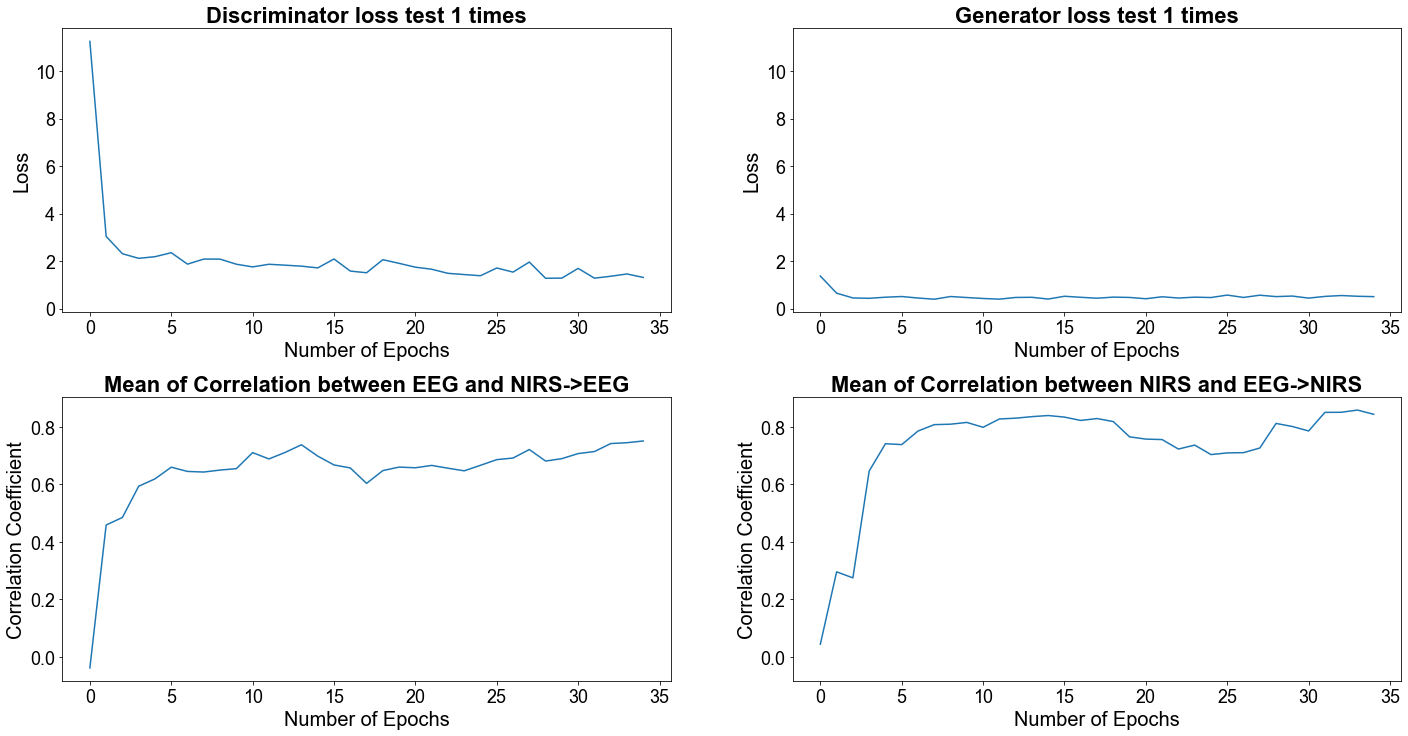

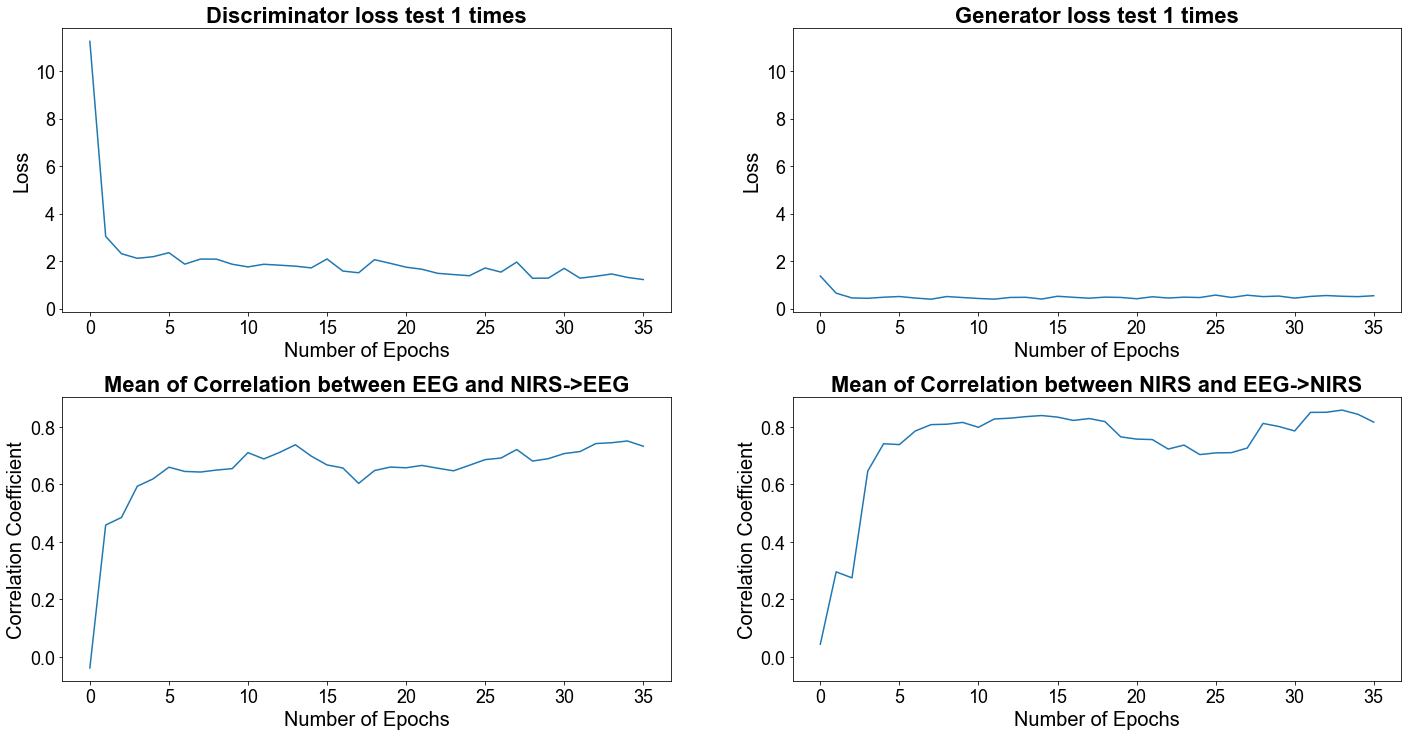

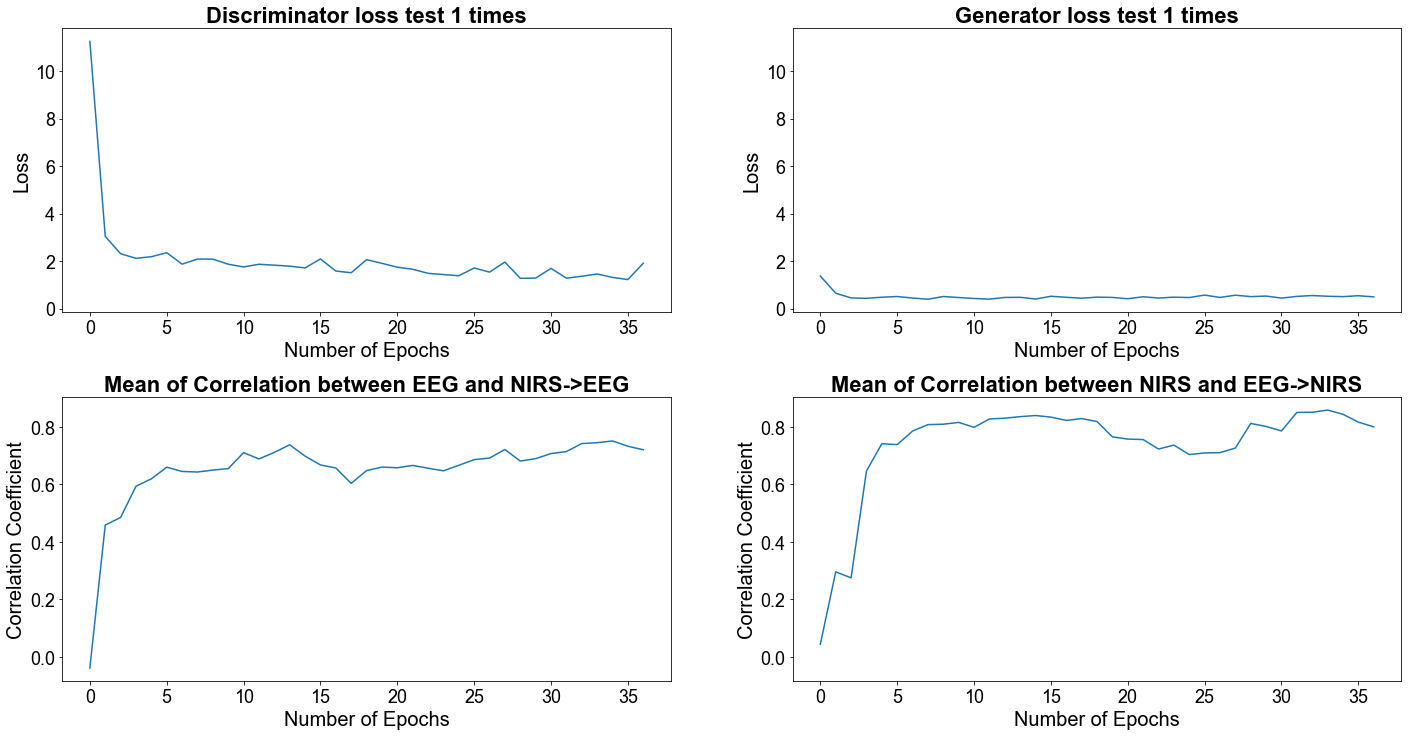

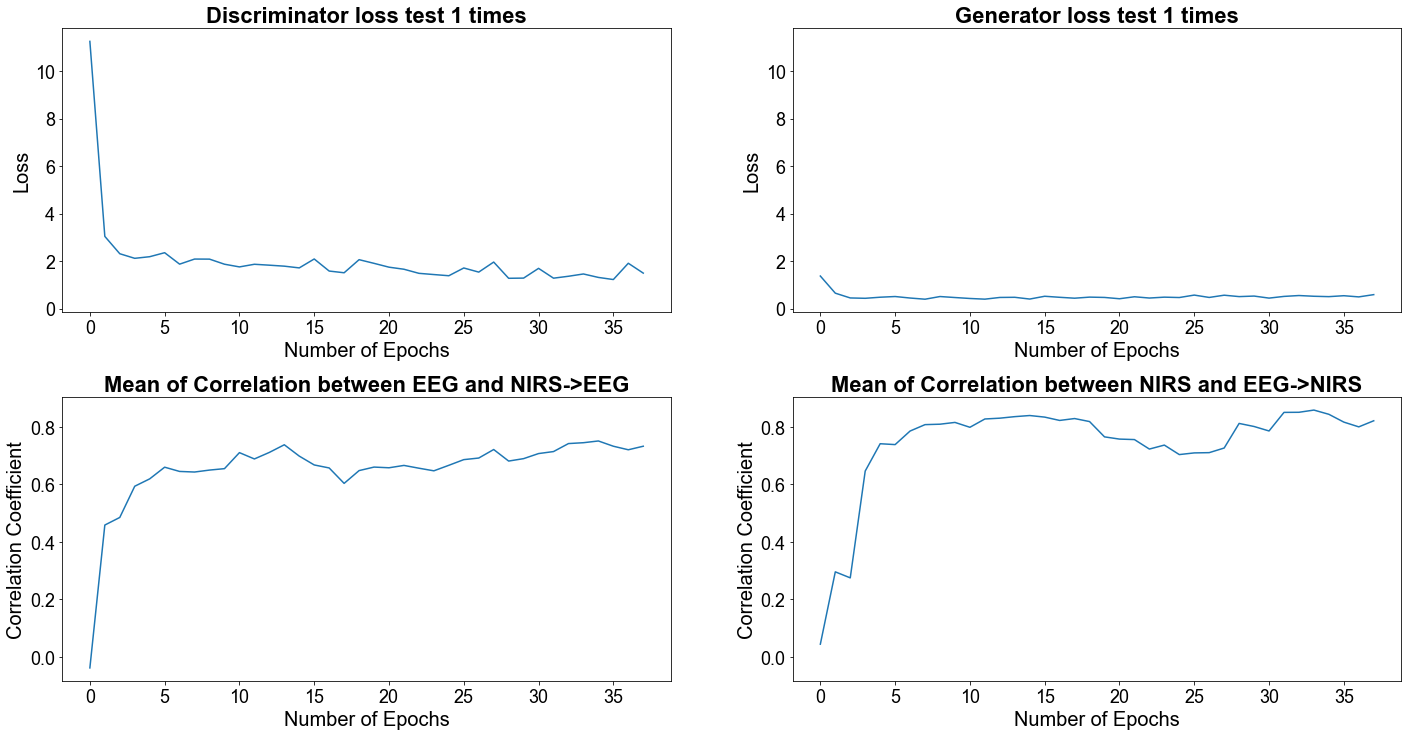

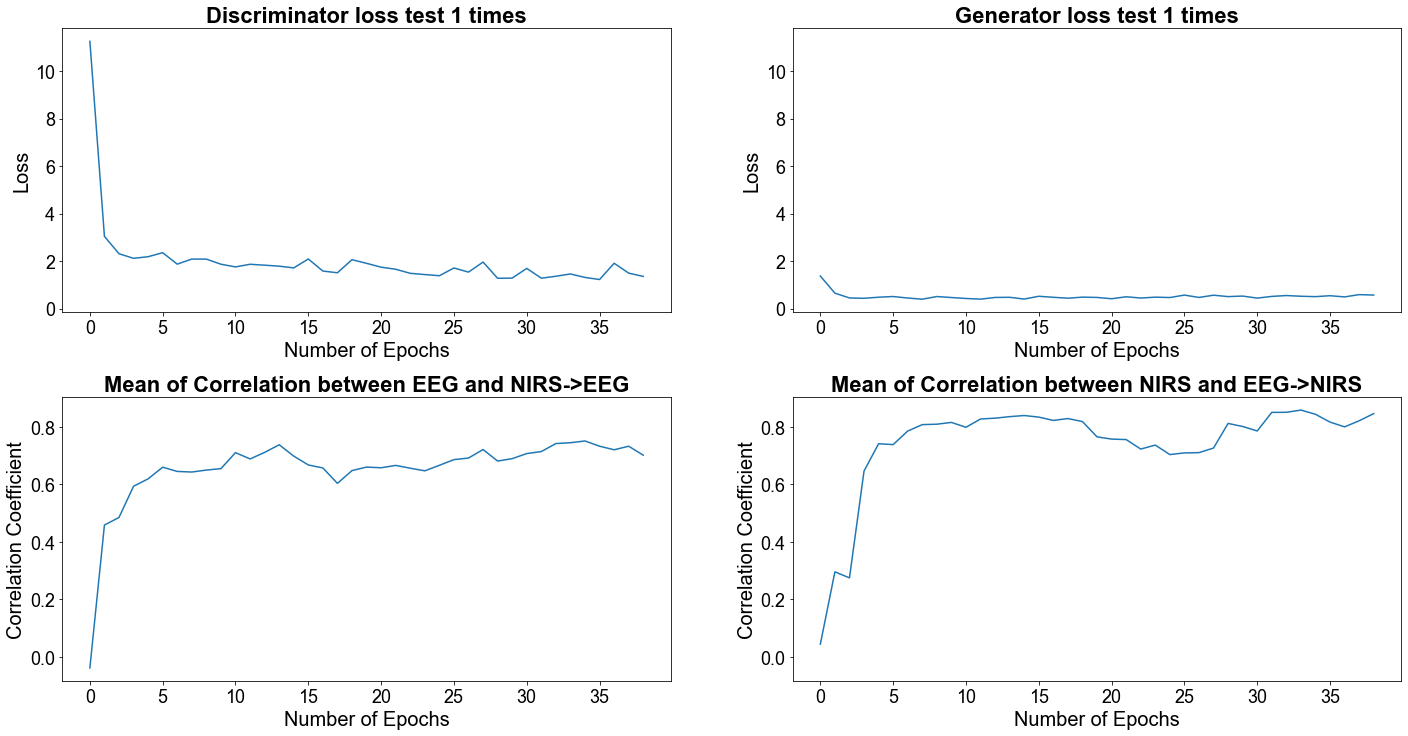

In [16]:




import os

# Function to save lists to txt files with directory specified
def save_to_txt(data, directory, filename):
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    file_path = os.path.join(directory, filename)
    with open(file_path, 'w') as f:
        for item in data:
            f.write("%s\n" % item)

# Compute test loss function
def compute_test_loss(model, xA, xB, iterr):
    loss_G_test = model.train_gen_test(xA, xB, iterr)
    loss_D_test = model.train_discrim(xA, xB, iterr)
    return loss_G_test, loss_D_test

# Main training loop
global_epoch = 400
total_epoch = 201
batch_size = 30
ckpt_dir = os.getcwd() + '/checkpoint/'
vis_num = 4

# Chia dữ liệu thành các nhóm 30 trials
num_trials_per_subject = 30
num_folds = eeg_normalize.shape[0] // num_trials_per_subject

# Tạo thư mục để lưu kết quả nếu chưa tồn tại
results_dir = "C:/Users/VU NGOC TAM/Downloads/gan1/result cross"
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

# Vòng lặp để chia dữ liệu thành các phần như mô tả
for fold in range(16,17):
    test_indices = np.arange(fold * num_trials_per_subject, (fold + 1) * num_trials_per_subject)
    train_indices = np.setdiff1d(np.arange(eeg_normalize.shape[0]), test_indices)

    print(f"Fold {fold + 1} Train Indices: {train_indices}")
    print(f"Fold {fold + 1} Test Indices: {test_indices}")
    train_eeg = eeg_normalize[train_indices]
    train_nirs = nirs_normalized[train_indices]

    test_eeg = eeg_normalize[test_indices]
    test_nirs = nirs_normalized[test_indices]

    database_A = db.DBreader(train_eeg, batch_size=batch_size)
    database_B = db.DBreader(train_nirs, batch_size=batch_size)
    db_for_vis_A = train_eeg
    db_for_vis_B = train_nirs

    database_C = db.DBreader(test_eeg, batch_size=batch_size)
    database_D = db.DBreader(test_nirs, batch_size=batch_size)
    db_for_vis_C = test_eeg
    db_for_vis_D = test_nirs

    result_dir_AtoB = 'result/AtoB'
    result_dir_BtoA = 'result/BtoA'
    result_dir_graph = 'result/graph'
    result_dir_graph_csv = 'result/graph_csv'
    result_dir_csv = 'result/csv'
    ckpt_dir = 'checkpoint/'

    if not os.path.exists(ckpt_dir):
        os.makedirs(ckpt_dir)
    if not os.path.exists(result_dir_AtoB):
        os.makedirs(result_dir_AtoB)
    if not os.path.exists(result_dir_BtoA):
        os.makedirs(result_dir_BtoA)
    if not os.path.exists(result_dir_graph):
        os.makedirs(result_dir_graph)
    if not os.path.exists(result_dir_graph_csv):
        os.makedirs(result_dir_graph_csv)
    if not os.path.exists(result_dir_csv):
        os.makedirs(result_dir_csv)

    global_epoch = tf.Variable(0, trainable=False, name='global_step')
    global_epoch_increase = tf.compat.v1.assign(global_epoch, tf.add(global_epoch, 1))
    config = tf.compat.v1.ConfigProto(device_count={'GPU': 1, 'CPU': 12})
    config.gpu_options.allow_growth = True
    sess = tf.compat.v1.Session(config=config)
    model = Discogan(sess, batch_size, size_=270)

    saver = tf.compat.v1.train.Saver(tf.compat.v1.global_variables())

    ckpt = tf.train.get_checkpoint_state(ckpt_dir)
    if ckpt and tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
        saver.restore(sess, ckpt.model_checkpoint_path)
    else:
        sess.run(tf.compat.v1.global_variables_initializer())
    # Khởi tạo biến toàn cục cho số epoch
    
    total_batch_A = database_A.total_batch
    total_batch_B = database_B.total_batch

    if total_batch_A > total_batch_B:
        total_batch = total_batch_B
    else:
        total_batch = total_batch_A

    discriminator_loss = []
    generator_loss = []
    corr_A_ABA = []
    corr_B_BAB = []
    total_corr_A_ABA = []
    total_corr_B_BAB = []
    corr_A_ABA_train_1_2 = []
    corr_B_BAB_train_1_2 = []
    total_corr_A_ABA_train_1_2 = []
    total_corr_B_BAB_train_1_2 = []
    test_losses_G_per_epoch = []
    test_losses_D_per_epoch = []
    
    corr_A_ABA_1= []
    total_corr_A_ABA_1= []
    corr_B_BAB_1= []
    total_corr_B_BAB_1= []
    corr_A_ABA_train_1= []
    total_corr_A_ABA_train_1= []
    corr_B_BAB_train_1= []
    total_corr_B_BAB_train_1= []

    corr_A_ABA_1_3= []
    total_corr_A_ABA_1_3= []
    corr_B_BAB_1_3= []
    total_corr_B_BAB_1_3= []
    corr_A_ABA_train_1_3= []
    total_corr_A_ABA_train_1_3= []
    corr_B_BAB_train_1_3= []
    total_corr_B_BAB_train_1_3= []


    corr_A_ABA_1_4= []
    total_corr_A_ABA_1_4= []
    corr_B_BAB_1_4= []
    total_corr_B_BAB_1_4= []
    corr_A_ABA_train_1_4= []
    total_corr_A_ABA_train_1_4= []
    corr_B_BAB_train_1_4= []
    total_corr_B_BAB_train_1_4= []


    epoch = sess.run(global_epoch)
    print('HERE>>>>>>>>>>>>>>>>>>>')
    print(epoch)
    output_directory = "C:/Users/VU NGOC TAM/Downloads/gan1/output_txt"
    while True:
        if epoch == total_epoch:
            break
        for step in range(total_batch):
            input_A = database_A.next_batch()
            input_B = database_B.next_batch()

            input_C = database_C.next_batch()
            input_D = database_D.next_batch()

            if step % 2 == 0:
                loss_D = model.train_discrim_test(input_C, input_D, epoch * total_batch + step)  # Train Discriminator and get the loss value
                loss_G_test, loss_D_test = compute_test_loss(model, input_C, input_D, epoch * total_batch + step)
            loss_G = model.train_gen_test(input_C, input_D, epoch * total_batch + step)  # Train Generator and get the loss value

            if step % 100 == 0:
                print('Epoch: [', epoch, '/', total_epoch, '], ', 'Step: [', step, '/', total_batch, '], D_loss: ', loss_D, ', G_loss: ', loss_G)
                discriminator_loss.append(loss_D)
                generator_loss.append(loss_G)
                test_losses_G_per_epoch.append(loss_G_test)
                test_losses_D_per_epoch.append(loss_D_test)

            if step % 500 == 0:
                generated_samples_AB = model.sample_generate(db_for_vis_C, 'AB', batch_size=30)
                generated_samples_ABA = model.sample_generate(db_for_vis_C, 'ABA', batch_size=30)
                generated_samples_BA = model.sample_generate(db_for_vis_D, 'BA', batch_size=30)
                generated_samples_BAB = model.sample_generate(db_for_vis_D, 'BAB', batch_size=30)

                generated_samples_AB_ = np.mean(np.array(generated_samples_AB), axis=0)
                generated_samples_ABA_ = np.mean(np.array(generated_samples_ABA), axis=0)
                generated_samples_BA_ = np.mean(np.array(generated_samples_BA), axis=0)
                generated_samples_BAB_ = np.mean(np.array(generated_samples_BAB), axis=0)

                db_for_vis_C_ = np.mean(np.array(db_for_vis_C), axis=0)
                db_for_vis_D_ = np.mean(np.array(db_for_vis_D), axis=0)

                img_for_vis_AB = np.concatenate([db_for_vis_C, generated_samples_AB, generated_samples_ABA], axis=2)
                img_for_vis_BA = np.concatenate([db_for_vis_D, generated_samples_BA, generated_samples_BAB], axis=2)

                corr_a_test = correlation(db_for_vis_C_, generated_samples_ABA_)
                corr_A_ABA.append(corr_a_test)
                total_corr_A_ABA.append(np.mean(corr_a_test))
                corr_b_test = correlation(db_for_vis_D_, generated_samples_BAB_)
                corr_B_BAB.append(corr_b_test)
                total_corr_B_BAB.append(np.mean(corr_b_test))

                corr_a_train_1_2 = correlation(db_for_vis_C_, generated_samples_BA_)
                corr_A_ABA_train_1_2.append(corr_a_train_1_2)
                total_corr_A_ABA_train_1_2.append(np.mean(corr_a_train_1_2))
                corr_b_train_1_2 = correlation(db_for_vis_D_, generated_samples_AB_)
                corr_B_BAB_train_1_2.append(corr_b_train_1_2)
                total_corr_B_BAB_train_1_2.append(np.mean(corr_b_train_1_2))
####################################################################################### loss MSE
                # corr_a_test_1 = mse_loss(db_for_vis_C_, generated_samples_ABA_)
                # corr_A_ABA_1.append(corr_a_test_1)
                # total_corr_A_ABA_1.append(np.mean(corr_a_test_1))
                # corr_b_test_1 = mse_loss(db_for_vis_D_, generated_samples_BAB_)
                # corr_B_BAB_1.append(corr_b_test_1)
                # total_corr_B_BAB_1.append(np.mean(corr_b_test_1))

                # corr_a_train_1 = mse_loss(db_for_vis_C_, generated_samples_BA_)
                # corr_A_ABA_train_1.append(corr_a_train_1)
                # total_corr_A_ABA_train_1.append(np.mean(corr_a_train_1))
                # corr_b_train_1 = mse_loss(db_for_vis_D_, generated_samples_AB_)
                # corr_B_BAB_train_1.append(corr_b_train_1)
                # total_corr_B_BAB_train_1.append(np.mean(corr_b_train_1))
####################################################################################### loss MAE    
                # corr_a_test_1_3 = mae_loss(db_for_vis_C_, generated_samples_ABA_)
                # corr_A_ABA_1_3.append(corr_a_test_1_3)
                # total_corr_A_ABA_1_3.append(np.mean(corr_a_test_1_3))
                # corr_b_test_1_3 = mae_loss(db_for_vis_D_, generated_samples_BAB_)
                # corr_B_BAB_1_3.append(corr_b_test_1_3)
                # total_corr_B_BAB_1_3.append(np.mean(corr_b_test_1_3))

                # corr_a_train_1_3 = mae_loss(db_for_vis_C_, generated_samples_BA_)
                # corr_A_ABA_train_1_3.append(corr_a_train_1_3)
                # total_corr_A_ABA_train_1_3.append(np.mean(corr_a_train_1_3))
                # corr_b_train_1_3 = mae_loss(db_for_vis_D_, generated_samples_AB_)
                # corr_B_BAB_train_1_3.append(corr_b_train_1_3)
                # total_corr_B_BAB_train_1_3.append(np.mean(corr_b_train_1_3))    
####################################################################################### loss Cosine        
                # corr_a_test_1_4 = cosine_similarity_loss(db_for_vis_C_, generated_samples_ABA_)
                # corr_A_ABA_1_4.append(corr_a_test_1_4)
                # total_corr_A_ABA_1_4.append(np.mean(corr_a_test_1_4))
                # corr_b_test_1_4 = cosine_similarity_loss(db_for_vis_D_, generated_samples_BAB_)
                # corr_B_BAB_1_4.append(corr_b_test_1_4)
                # total_corr_B_BAB_1_4.append(np.mean(corr_b_test_1_4))

                # corr_a_train_1_4 = cosine_similarity_loss(db_for_vis_C_, generated_samples_BA_)
                # corr_A_ABA_train_1_4.append(corr_a_train_1_4)
                # total_corr_A_ABA_train_1_4.append(np.mean(corr_a_train_1_4))
                # corr_b_train_1_4 = cosine_similarity_loss(db_for_vis_D_, generated_samples_AB_)
                # corr_B_BAB_train_1_4.append(corr_b_train_1_4)
                # total_corr_B_BAB_train_1_4.append(np.mean(corr_b_train_1_4))  
                # savepath_AB = 'A.jpg'
                # savepath_BA = 'B.jpg'
                # savepath_4chan = 'tam1/' + str(epoch) + '_1chan-coppy.png'
                # savepath_1chan = 'tam/' + str(epoch) + '_1chan-coppy.png'
                # file_name_4chan_csv = '/output_' + 'EP' + str(epoch).zfill(3) + "_Batch" + str(step).zfill(6) + '_4chan_csv'
                # file_name_1chan_csv = '/output_' + 'EP' + str(epoch).zfill(3) + "_Batch" + str(step).zfill(6) + '_1chan_csv'

        epoch = sess.run(global_epoch_increase)
        save_to_txt(test_losses_G_per_epoch, output_directory, "test_losses_G_per_epoch.txt")
        save_to_txt(test_losses_D_per_epoch, output_directory, "test_losses_D_per_epoch.txt")
        save_to_txt(total_corr_A_ABA_train_1_2, output_directory, "total_corr_A_ABA_train_1_Correlation.txt")
        save_to_txt(total_corr_B_BAB_train_1_2, output_directory, "total_corr_B_BAB_train_1_Correlation.txt")

        # save_to_txt(total_corr_A_ABA_train_1, output_directory, "total_corr_A_ABA_train_1_MSE.txt")
        # save_to_txt(total_corr_B_BAB_train_1, output_directory, "total_corr_B_BAB_train_1_MSE.txt")

        # save_to_txt(total_corr_A_ABA_train_1_3, output_directory, "total_corr_A_ABA_train_1_MAE.txt")
        # save_to_txt(total_corr_B_BAB_train_1_3, output_directory, "total_corr_B_BAB_train_1_MAE.txt")

        # save_to_txt(total_corr_A_ABA_train_1_4, output_directory, "total_corr_A_ABA_train_1_Cosine.txt")
        # save_to_txt(total_corr_B_BAB_train_1_4, output_directory, "total_corr_B_BAB_train_1_Cosine.txt")
        trial_index = 9
        # plot_eeg_2(db_for_vis_C_, generated_samples_ABA_, db_for_vis_D_, generated_samples_BAB_)
        if epoch % 50 == 0:
            plot_eeg_1(db_for_vis_C_, generated_samples_BA_, db_for_vis_D_, generated_samples_AB_)

        # plot_3_fig(db_for_vis_C_, generated_samples_AB_, generated_samples_ABA_, db_for_vis_D_, generated_samples_BA_, generated_samples_BAB_, save_dir='plots')

        plotting_data = [test_losses_D_per_epoch,test_losses_G_per_epoch,total_corr_A_ABA_train_1_2, total_corr_B_BAB_train_1_2]

        graph_titles = ['Discriminator loss test 1 times',
                             'Generator loss test 1 times',
                        'Mean of Correlation between EEG and NIRS->EEG',
                        'Mean of Correlation between NIRS and EEG->NIRS']
        y_axis_titles = list(['Loss'] * 2 +
                             ['Correlation Coefficient'] * 4)
        fig, axs = plt.subplots(int(len(plotting_data) / 2), 2, figsize=(24, 12), sharey='row', facecolor='w', edgecolor='k')
        fig.subplots_adjust(hspace=.30, wspace=.20)
        axs = axs.ravel()
        for i, (title, data) in enumerate(zip(graph_titles, plotting_data)):
            if np.shape(np.shape(data))[0] == 1:
                axs[i].plot(data)
            else:
                for result in data:
                    axs[i].plot(result)
            axs[i].set_title(title, fontweight="bold", size=22)
            axs[i].set_xlabel('Number of Epochs', fontsize=20.0)
            axs[i].set_ylabel(y_axis_titles[i], fontsize=20.0)
            axs[i].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelsize=18)
            axs[i].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labelsize=18)
        fig.savefig('loss_corrcoef' + str(total_epoch) + 'epochs.png', pad_inches=0.015, bbox_inches='tight')

        plotting_data_test = [test_losses_D_per_epoch, test_losses_G_per_epoch, total_corr_A_ABA, total_corr_B_BAB]
        graph_titles_test = ['Discriminator loss test 2 times',
                             'Generator loss test 2 times', 'Mean of Correlation between EEG and EEG->NIRS->EEG',
                             'Mean of Correlation between NIRS and NIRS->EEG->NIRS']
        y_axis_titles = list(['Loss'] * 2 +
                             ['Correlation Coefficient'] * 4)
        fig, axs = plt.subplots(int(len(plotting_data_test) / 2), 2, figsize=(24, 12), sharey='row', facecolor='w', edgecolor='k')
        fig.subplots_adjust(hspace=.30, wspace=.20)
        axs = axs.ravel()
        for i, (title, data) in enumerate(zip(graph_titles_test, plotting_data_test)):
            if np.shape(np.shape(data))[0] == 1:
                axs[i].plot(data)
            else:
                for result in data:
                    axs[i].plot(result)
            axs[i].set_title(title, fontweight="bold", size=22)
            axs[i].set_xlabel('Number of Epochs', fontsize=20.0)
            axs[i].set_ylabel(y_axis_titles[i], fontsize=20.0)
            axs[i].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelsize=18)
            axs[i].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labelsize=18)
        fig.savefig('test_loss' + str(total_epoch) + 'epochs.png', pad_inches=0.015, bbox_inches='tight')
        plt.close(fig)

    

    # Save the required data to txt files in the specified directory


    # Specify the directory where you want to save the files


